# Final Project (Group 35)

## Introduction and Background

According to the Regional Task Force (1), over the past five years unsheltered homeless persons in San Diego has increased steadily while sheltered homeless persons has decreased. With the multitude of programs and services implemented by both the state and the federal government, it is disturbing that homeless populations continue to increase. Although the the homeless crisis in San Diego and many other communities is an extremely complex issue to tackle, communities such as Bergen, New Jersey (in partnership with an organization called Community Solutions) with a population of about one million people has proved that it is not impossible (2). The three main strategies that they used to address homelessness were: coordination between service providers, a commitment to a housing-first solution, and a data driven systems framework. Communities like Bergen that have focused on the US war veteran homeless population have demonstrated that with the right strategy, homelessness can be reduced to “functional zero” (3). One of the key components involved in Bergen’s response to their homeless crisis was changing the housing services provided and specifically advocating for a housing-first strategy rather than shelters. One important element to a housing-first approach is identify what types of housing services are most suitable depending on an individual’s needs and will further prevent them from returning to homelessness. The U.S. Department of Housing and Urban Development (4) recently published a study on different housing services provided to families. They discovered that families who were administered stable housing solutions such as Rapid Re-housing and Long-term Housing Subsidies rather than Transitional Housing or Emergency Shelters demonstrated more benefits (cheaper, better quality of life) over a three year period. In addition, the overall cost for each family was the lowest for Rapid Re-Housing than the other services. This provides evidence that services vary in their efficiency to provide individuals with the resources they need. 
Based on our prior research, we decided to analyze the homeless population and housing services across California by county. Do changes in homeless population over time within California correlate with changes in the proportion of housing services offered across the years 2007-2016?
Looking at the change in housing services and homeless populations over a nine year period, we seek to predict which distribution of housing services would be the best model in decreasing homeless population. We hypothesize that county’s that have a higher distribution of services that focus on providing long-term housing solutions like Permanent Supportive Housing will show a decrease in the overall homeless population over time we also want to see if change in years of service and population influence one another. 

## Data Description

We will be utilizing data provided by the Department of Housing and Urban Development including 1) data from the Homeless Population (PIT) and 2) data from the Housing Inventory (HIC) for the years 2007-2016. 
Url: https://www.hudexchange.info/resource/3031/pit-and-hic-data-since-2007/
 
Since our primary focus is on California counties we will be using all counties beginning with CA in both the PIT and HIC datasets. The PIT dataset will be useful in discovering whether there are changes in the total homeless population over time in each county and furthermore whether those changes correlate with changes in the proportion of services. It shows that at the annual Point in Time Count x number of people were counted as either unsheltered or sheltered homeless individuals. 
 
The HIC dataset includes the total number of beds per service in each county. To analyze services we will be looking at the bed inventory for Emergency Shelters, Transitional Housing, and Permanent Supportive Housing, while ignoring Rapid Re-Housing and the Safe Haven programs. The Regional Task Force on the Homeless describe each service as the following:
Emergency Shelter: A project that offers temporary shelter (lodging) for the homeless in general or for specific populations of the homeless.
Transitional Housing: A project that provides temporary lodging and is designed to facilitate the movement of homeless individuals and families into permanent housing within a specified period of time, but no longer than 24 months.
Permanent supportive housing: A project that offers permanent housing and supportive services to assist homeless persons with a disability (individuals with disabilities or families in which one adult or child has a disability) to live independently.
You will notice that the Rapid Re-Housing for most counties has one hundred percent utilization rate, meaning at that given point in time each bed was being utilized. The Rapid Re-Housing program has proven to be reliable as discussed previously, yet bed inventory is determined based on the number of vouchers given, not on the actual number of beds provided. Since we are interested in the number of beds for each service the Rapid Re-Housing data would be unreliable to include. In addition, the Safe Haven program has not been widely utilized by counties so we also will not be including that data provided. 


## Data Cleaning/Pre-processing


The first step to cleaning the homelessness data was to load it into the excel sheets. We loaded in the excel sheet by year from 2007-2016 into the data frame.
Since our data came from two excel sheets, we had to merge the data into one single data frame for the PIT and HIC. We did this my first renaming the HIC CoC to CoC number. This merging of the data frame allowed us to to more easily extract the data into graphs when we were exploring and graphing it.
Next we extracted the CoC Number from the Total Homeless, Total Year-Round ES beds, Total TH Beds, and Total PSH Beds for each year in order to make each of the feature into a proportion to be placed into a Data Frame. Within our code, the proportions for each were placed into a matrix through the method “append”, so we would not lose the new value we just had calculated and to make it easier to grab when we were doing data visualization. This process allowed us to show a clearer and smaller table for the homelessness data we had originally had from the raw excel sheet.
For the next part, we placed the current data frame we had into a new one, so we could modify the new one without changing the current data. This allows us to explore and test the data without fear of losing the original data.
At this point in the data cleaning, we are ready to start the process of analyzing some of the data, so the next part of our code takes head and tail (first five and last five part of our data set). We took the homelessness population and housing services interval of one year in order to create the data. We created a loop to go into all the CoC number to create a delta for each of the years.
Then we placed all the years into a list and used panda series to get the rows of the data. We grabbed the ES, TH, and PSH proportions from ES, TH, PSH data for each year and each county. The code then explores the one and two year change between the ES, PSH, and TH by looking at the satisfaction rating to look at how the county are doing with their homelessness problem.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
#Read in Point in Time (PIT) of Continuums of Care (CoC) for years 2013- 2007-2016 
#This includes Total Population of Homeless individuals in California counties
#Continuums of Care (CoC) are local planning bodies responsible for coordinating the full range
#of homelessness services in a geographic area,which may cover a city, county, metropolitan area,
#or an entire state.
PIT2016 = pd.read_excel("2007-2016-PIT-Counts-by-CoC.xlsx", sheetname='2016', header=0)
PIT2016 = PIT2016.ix[:,:3]
PIT2016 = PIT2016.dropna()
#County did not exist in 2013-2014
PIT2016 = PIT2016[PIT2016['CoC Number'] != 'CA-527']
PIT2016 = PIT2016[PIT2016['CoC Number'] != 'CA-529']
PIT2016 = PIT2016[PIT2016['CoC Number'] != 'CA-615']
PIT2016 = PIT2016[PIT2016['CoC Number'] != 'CA-524']
PIT2016 = PIT2016[PIT2016['CoC Number'].str.contains("CA-")]
PIT2015 = pd.read_excel("2007-2016-PIT-Counts-by-CoC.xlsx", sheetname='2015', header=0)
PIT2015 = PIT2015.ix[:,:3]
PIT2015 = PIT2015.dropna()
#Counties that did not exist from 2013-2014 
#Removed Counties 527, 529, 615, and 524
PIT2015 = PIT2015[PIT2015['CoC Number'] != 'CA-527']
PIT2015 = PIT2015[PIT2015['CoC Number'] != 'CA-529']
PIT2015 = PIT2015[PIT2015['CoC Number'] != 'CA-615']
PIT2015 = PIT2015[PIT2015['CoC Number'] != 'CA-524']
PIT2015 = PIT2015[PIT2015['CoC Number'].str.contains("CA-")]
#Separating sheet names by year from 2007-2016-PIT-Counts-by-CoC.xlsx", sheetname='2014'
PIT2014 = pd.read_excel("2007-2016-PIT-Counts-by-CoC.xlsx", sheetname='2014', header=0)
PIT2014 = PIT2014.ix[:,:3]
PIT2014 = PIT2014.dropna()
PIT2014 = PIT2014[PIT2014['CoC Number'] != 'CA-524']
PIT2014 = PIT2014[PIT2014['CoC Number'].str.contains("CA-")]

PIT2013 = pd.read_excel("2007-2016-PIT-Counts-by-CoC.xlsx", sheetname='2013', header=0)
PIT2013 = PIT2013.ix[:,:3]
PIT2013 = PIT2013.dropna()
PIT2013 = PIT2013[PIT2013['CoC Number'] != 'CA-524']
PIT2013 = PIT2013[PIT2013['CoC Number'].str.contains("CA-")]

PIT2012 = pd.read_excel("2007-2016-PIT-Counts-by-CoC.xlsx", sheetname='2012', header=0)
PIT2012 = PIT2012.ix[:,:3]
PIT2012 = PIT2012.dropna()
PIT2012 = PIT2012[PIT2012['CoC Number'] != 'CA-528']
PIT2012 = PIT2012[PIT2012['CoC Number'] != 'CA-524']
PIT2012 = PIT2012[PIT2012['CoC Number'].str.contains("CA-")]

PIT2011 = pd.read_excel("2007-2016-PIT-Counts-by-CoC.xlsx", sheetname='2011', header=0)
PIT2011 = PIT2011.ix[:,:3]
PIT2011 = PIT2011.dropna()
PIT2011 = PIT2011[PIT2011['CoC Number'] != 'CA-524']
PIT2011 = PIT2011[PIT2011['CoC Number'] != 'CA-528']
PIT2011 = PIT2011[PIT2011['CoC Number'].str.contains("CA-")]


PIT2010 = pd.read_excel("2007-2016-PIT-Counts-by-CoC.xlsx", sheetname='2010', header=0)
PIT2010 = PIT2010.ix[:,:3]
PIT2010 = PIT2010.dropna()
PIT2010 = PIT2010[PIT2010['CoC Number'] != 'CA-524']
PIT2010 = PIT2010[PIT2010['CoC Number'] != 'CA-528']
PIT2010 = PIT2010[PIT2010['CoC Number'].str.contains("CA-")]

PIT2009 = pd.read_excel("2007-2016-PIT-Counts-by-CoC.xlsx", sheetname='2009', header=0)
PIT2009 = PIT2009.ix[:,:3]
PIT2009 = PIT2009.dropna()
PIT2009 = PIT2009[PIT2009['CoC Number'].str.contains("CA-")]

PIT2008 = pd.read_excel("2007-2016-PIT-Counts-by-CoC.xlsx", sheetname='2008', header=0)
PIT2008 = PIT2008.ix[:,:3]
PIT2008 = PIT2008.dropna()
PIT2008 = PIT2008[PIT2008['CoC Number'] != 'CA-524']
PIT2008 = PIT2008[PIT2008['CoC Number'].str.contains("CA-")]

PIT2007 = pd.read_excel("2007-2016-PIT-Counts-by-CoC.xlsx", sheetname='2007', header=0)
PIT2007 = PIT2007.ix[:,:3]
PIT2007 = PIT2007.dropna()
PIT2007 = PIT2007[PIT2007['CoC Number'] != 'CA-524']
PIT2007 = PIT2007[PIT2007['CoC Number'].str.contains("CA-")]

PITNAMES = pd.read_excel("2007-2016-PIT-Counts-by-CoC.xlsx", sheetname='2016', header=0)
PITNAMES = PITNAMES.ix[:,:2]
PITNAMES = PITNAMES.dropna()
PITNAMES = PITNAMES[PITNAMES['CoC Number'].str.contains("CA-")]

In [3]:
#Read in Housing Inventory for each service (or feature) for years 2007-2016
#'Continuums of Care (CoC Number)
# Services include: 
# Total Year-Round Beds for Emergency Shelter (ES)
# A facility with the primary purpose of providing temporary shelter for homeless people.
# Total Year-Round Beds for Transitional Housing Programs (TH)
# Provide people experiencing homelessness a place to stay combined with supportive services for up to 24 months. 
# Total Year-Round Beds for Permanent Supportive Housing (PSH)']] 
# A program designed to provide housing (project and tenant-based) and #supportive services on a long-term basis to formerly homeless people. #HUD McKinney-Vento-funded programs require that the client have a #disability for program eligibility, so the majority of people in PSH have #disabilities.

HIC2016 = pd.read_excel("2007-2016-HIC-Counts-by-CoC.xlsx", sheetname='2016', header=1)
HIC2016 = HIC2016[['CoC Number', 'Total Year-Round Beds (ES)', 'Total Year-Round Beds (TH)', 'Total Year-Round Beds (PSH)']]
HIC2016 = HIC2016.dropna()
HIC2016 = HIC2016[HIC2016['CoC Number'].str.contains("CA-")]

HIC2015 = pd.read_excel("2007-2016-HIC-Counts-by-CoC.xlsx", sheetname='2015', header=1)
HIC2015 = HIC2015[['CoC Number', 'Total Year-Round Beds (ES)', 'Total Year-Round Beds (TH)', 'Total Year-Round Beds (PSH)']]
HIC2015 = HIC2015.dropna()
HIC2015 = HIC2015[HIC2015['CoC Number'].str.contains("CA-")]

HIC2014 = pd.read_excel("2007-2016-HIC-Counts-by-CoC.xlsx", sheetname='2014', header=1)
HIC2014 = HIC2014[['CoC Number', 'Total Year-Round Beds (ES)', 'Total Year-Round Beds (TH)', 'Total Year-Round Beds (PSH)']]
HIC2014 = HIC2014.dropna()
HIC2014 = HIC2014[HIC2014['CoC Number'].str.contains("CA-")]

HIC2013 = pd.read_excel("2007-2016-HIC-Counts-by-CoC.xlsx", sheetname='2013', header=1)
HIC2013 = HIC2013[['CoC Number', 'Total Year-Round ES Beds', 'Total TH Beds', 'Total PSH Beds']]
HIC2013 = HIC2013.dropna()
HIC2013 = HIC2013[HIC2013['CoC Number'].str.contains("CA-")]

#2007-12 list 'CoC Number' as 'CoC
HIC2012 = pd.read_excel("2007-2016-HIC-Counts-by-CoC.xlsx", sheetname='2012', header=1)
HIC2012 = HIC2012[['CoC', 'Total Year-Round ES Beds', 'Total TH Beds', 'Total PSH Beds']]
HIC2012 = HIC2012.dropna()
HIC2012 = HIC2012[HIC2012['CoC'].str.contains("CA-")]

HIC2011 = pd.read_excel("2007-2016-HIC-Counts-by-CoC.xlsx", sheetname='2011', header=1)
HIC2011 = HIC2011[['CoC', 'Total Year-Round ES Beds', 'Total TH Beds', 'Total PSH Beds']]
HIC2011 = HIC2011.dropna()
HIC2011 = HIC2011[HIC2011['CoC'].str.contains("CA-")]

HIC2010 = pd.read_excel("2007-2016-HIC-Counts-by-CoC.xlsx", sheetname='2010', header=1)
HIC2010 = HIC2010[['CoC', 'Total Year-Round ES Beds', 'Total TH Beds', 'Total PSH Beds']]
HIC2010 = HIC2010.dropna()
HIC2010 = HIC2010[HIC2010['CoC'].str.contains("CA-")]

HIC2009 = pd.read_excel("2007-2016-HIC-Counts-by-CoC.xlsx", sheetname='2009', header=1)
HIC2009 = HIC2009[['CoC', 'Total Year-Round ES Beds', 'Total TH Beds', 'Total PSH Beds']]
HIC2009 = HIC2009.dropna()
HIC2009 = HIC2009[HIC2009['CoC'].str.contains("CA-")]

HIC2008 = pd.read_excel("2007-2016-HIC-Counts-by-CoC.xlsx", sheetname='2008', header=1)
HIC2008 = HIC2008[['CoC', 'Total Year-Round ES Beds', 'Total TH Beds', 'Total PSH Beds']]
HIC2008 = HIC2008.dropna()
HIC2008 = HIC2008[HIC2008['CoC'].str.contains("CA-")]

HIC2007 = pd.read_excel("2007-2016-HIC-Counts-by-CoC.xlsx", sheetname='2007', header=1)
HIC2007 = HIC2007[['CoC', 'Total Year-Round ES Beds', 'Total TH Beds', 'Total PSH Beds']]
HIC2007 = HIC2007.dropna()
HIC2007 = HIC2007[HIC2007['CoC'].str.contains("CA-")]

In [4]:
#Rename HIC CoC to CoC Number from years 2007-2012. This way we may merge both data frames.
HIC2012=HIC2012.rename (columns = {'CoC': 'CoC Number'})
HIC2011=HIC2011.rename (columns = {'CoC': 'CoC Number'})
HIC2010=HIC2010.rename (columns = {'CoC': 'CoC Number'})
HIC2009=HIC2009.rename (columns = {'CoC': 'CoC Number'})
HIC2008=HIC2008.rename (columns = {'CoC': 'CoC Number'})
HIC2007=HIC2007.rename (columns = {'CoC': 'CoC Number'})

In [5]:
#Combining Point in Time Count Data (PIC) and Housing Inventory Count (HIC) into variable 'CoC Number' for years 2007-2016.
y2016 = pd.merge(PIT2016, HIC2016, on='CoC Number')
y2015 = pd.merge(PIT2015, HIC2015, on='CoC Number')
y2014 = pd.merge(PIT2014, HIC2014, on='CoC Number')
y2013 = pd.merge(PIT2013, HIC2013, on='CoC Number')
y2012 = pd.merge(PIT2012, HIC2012, on='CoC Number')
y2011 = pd.merge(PIT2011, HIC2011, on='CoC Number')
y2010 = pd.merge(PIT2010, HIC2010, on='CoC Number')
y2009 = pd.merge(PIT2009, HIC2009, on='CoC Number')
y2008 = pd.merge(PIT2008, HIC2008, on='CoC Number')
y2007 = pd.merge(PIT2007, HIC2007, on='CoC Number')    

In [6]:
#Transformed each feature (ES, TH, PSH) into a proportion and entered it into the dataframe for years 2007.
matrix = []
matrix1 = []
matrix2 = []
matrix3 = []
matrix4 = []
matrix5 = []
matrix6 = []
matrix7 = []
for x in range(len(y2007)):
    year = '2007'
    county = y2007['CoC Number'][x]
    totalH = y2007['Total Homeless, 2007'][x]
    ES07 = y2007['Total Year-Round ES Beds'][x]
    TH07 = y2007['Total TH Beds'][x]
    PSH07 = y2007['Total PSH Beds'][x]
    totalP07 = ES07+TH07+PSH07
    ESper07 = (ES07/totalP07)
    THper07 = (TH07/totalP07)
    PSHper07 = (PSH07/totalP07)
    ES_pop07 = (ES07/totalH)
    TH_pop07 = (TH07/totalH)
    PSH_pop07 = (PSH07/totalH)
    
    matrix.append(ESper07)
    matrix1.append(THper07)
    matrix2.append(PSHper07)
    matrix3.append(totalH)
    matrix4.append(ES_pop07)
    matrix5.append(TH_pop07)
    matrix6.append(PSH_pop07)
    matrix7.append(year)
 
temp = pd.DataFrame()
temp1 = pd.DataFrame()
temp['CoC Number'] = y2007['CoC Number']
temp['ESpro'] = matrix
temp['THpro'] = matrix1
temp['PSHpro'] = matrix2
temp['ES/Pop'] = matrix4
temp['TH/Pop'] = matrix5
temp['PSH/Pop'] = matrix6
temp['Year'] = matrix7
temp1['CoC Number'] = y2007['CoC Number']
temp1['Total Homeless, 2007'] = matrix3
pop = temp1
y2007 = pd.merge(y2007, temp, how = 'left')

In [7]:
#Transformed each feature (ES, TH, PSH) into a proportion and entered it into the dataframe for years 2008.
matrix = []
matrix1 = []
matrix2 = []
matrix3 = []
matrix4 = []
matrix5 = []
matrix6 = []
matrix7 = []
for x in range(len(y2008)):
    year = '2008'
    county = y2008['CoC Number'][x]
    totalH = y2008['Total Homeless, 2008'][x]
    ES08 = y2008['Total Year-Round ES Beds'][x]
    TH08 = y2008['Total TH Beds'][x]
    PSH08 = y2008['Total PSH Beds'][x]
    totalP08 = ES08+TH08+PSH08
    ESper08 = (ES08/totalP08)
    THper08 = (TH08/totalP08)
    PSHper08 = (PSH08/totalP08)
    ES_pop08 = (ES08/totalH)
    TH_pop08 = (TH08/totalH)
    PSH_pop08 = (PSH08/totalH)
    
    matrix.append(ESper08)
    matrix1.append(THper08)
    matrix2.append(PSHper08)
    matrix3.append(totalH)
    matrix4.append(ES_pop08)
    matrix5.append(TH_pop08)
    matrix6.append(PSH_pop08)
    matrix7.append(year)

temp = pd.DataFrame()
temp['CoC Number'] = y2008['CoC Number']
temp['ESpro'] = matrix
temp['THpro'] = matrix1
temp['PSHpro'] = matrix2
temp['ES/Pop'] = matrix4
temp['TH/Pop'] = matrix5
temp['PSH/Pop'] = matrix6
temp['Year'] = matrix7
temp1['CoC Number'] = y2008['CoC Number']
temp1['Total Homeless, 2008'] = matrix3
pop = pd.merge(pop, temp1, how = 'left')
y2008 = pd.merge(y2008, temp, how = 'left')

In [8]:
#Transformed each feature (ES, TH, PSH) into a proportion and entered it into the dataframe for years 2009.
matrix = []
matrix1 = []
matrix2 = []
matrix3 = []
matrix4 = []
matrix5 = []
matrix6 = []
matrix7 = []
for x in range(len(y2009)):
    year = '2009'
    county = y2009['CoC Number'][x]
    totalH = y2009['Total Homeless, 2009'][x]
    ES09 = y2009['Total Year-Round ES Beds'][x]
    TH09 = y2009['Total TH Beds'][x]
    PSH09 = y2009['Total PSH Beds'][x]
    totalP09 = ES09+TH09+PSH09
    ESper09 = (ES09/totalP09)
    THper09 = (TH09/totalP09)
    PSHper09 = (PSH09/totalP09)
    ES_pop09 = (ES09/totalH)
    TH_pop09 = (TH09/totalH)
    PSH_pop09 = (PSH09/totalH)
    
    matrix.append(ESper09)
    matrix1.append(THper09)
    matrix2.append(PSHper09)
    matrix3.append(totalH)
    matrix4.append(ES_pop09)
    matrix5.append(TH_pop09)
    matrix6.append(PSH_pop09)
    matrix7.append(year) 

temp = pd.DataFrame()
temp['CoC Number'] = y2009['CoC Number']
temp['ESpro'] = matrix
temp['THpro'] = matrix1
temp['PSHpro'] = matrix2
temp['ES/Pop'] = matrix4
temp['TH/Pop'] = matrix5
temp['PSH/Pop'] = matrix6
temp['Year'] = matrix7
temp1['CoC Number'] = y2009['CoC Number']
temp1['Total Homeless, 2009'] = matrix3
pop = pd.merge(pop, temp1, how = 'left')
y2009 = pd.merge(y2009, temp, how = 'left')

In [9]:
#Transformed each feature (ES, TH, PSH) into a proportion and entered it into the dataframe for years 2010.
matrix = []
matrix1 = []
matrix2 = []
matrix3 = []
matrix4 = []
matrix5 = []
matrix6 = []
matrix7 = []
for x in range(len(y2010)):
    year = '2010'
    county = y2010['CoC Number'][x]
    totalH = y2010['Total Homeless, 2010'][x]
    ES10 = y2010['Total Year-Round ES Beds'][x]
    TH10 = y2010['Total TH Beds'][x]
    PSH10 = y2010['Total PSH Beds'][x]
    totalP10 = ES10+TH10+PSH10
    ESper10 = (ES10/totalP10)
    THper10 = (TH10/totalP10)
    PSHper10 = (PSH10/totalP10)
    ES_pop10 = (ES10/totalH)
    TH_pop10 = (TH10/totalH)
    PSH_pop10 = (PSH10/totalH)
    
    matrix.append(ESper10)
    matrix1.append(THper10)
    matrix2.append(PSHper10)
    matrix3.append(totalH)
    matrix4.append(ES_pop10)
    matrix5.append(TH_pop10)
    matrix6.append(PSH_pop10)
    matrix7.append(year)
 
temp = pd.DataFrame()
temp['CoC Number'] = y2010['CoC Number']
temp['ESpro'] = matrix
temp['THpro'] = matrix1
temp['PSHpro'] = matrix2
temp['ES/Pop'] = matrix4
temp['TH/Pop'] = matrix5
temp['PSH/Pop'] = matrix6
temp['Year'] = matrix7
temp1['CoC Number'] = y2010['CoC Number']
temp1['Total Homeless, 2010'] = matrix3
pop = pd.merge(pop, temp1, how = 'left')
y2010 = pd.merge(y2010, temp, how = 'left')

In [10]:
#Transformed each feature (ES, TH, PSH) into a proportion and entered it into the dataframe for years 2011.
matrix = []
matrix1 = []
matrix2 = []
matrix3 = []
matrix4 = []
matrix5 = []
matrix6 = []
matrix7 = []
for x in range(len(y2011)):
    year = '2011'
    county = y2011['CoC Number'][x]
    totalH = y2011['Total Homeless, 2011'][x]
    ES11 = y2011['Total Year-Round ES Beds'][x]
    TH11 = y2011['Total TH Beds'][x]
    PSH11 = y2011['Total PSH Beds'][x]
    totalP11 = ES11+TH11+PSH11
    ESper11 = (ES11/totalP11)
    THper11 = (TH11/totalP11)
    PSHper11 = (PSH11/totalP11)
    ES_pop11 = (ES11/totalH)
    TH_pop11 = (TH11/totalH)
    PSH_pop11 = (PSH11/totalH)
    
    matrix.append(ESper11)
    matrix1.append(THper11)
    matrix2.append(PSHper11)
    matrix3.append(totalH)
    matrix4.append(ES_pop11)
    matrix5.append(TH_pop11)
    matrix6.append(PSH_pop11)
    matrix7.append(year)
 
temp = pd.DataFrame()
temp['CoC Number'] = y2011['CoC Number']
temp['ESpro'] = matrix
temp['THpro'] = matrix1
temp['PSHpro'] = matrix2
temp['ES/Pop'] = matrix4
temp['TH/Pop'] = matrix5
temp['PSH/Pop'] = matrix6
temp['Year'] = matrix7
temp1['CoC Number'] = y2011['CoC Number']
temp1['Total Homeless, 2011'] = matrix3
pop = pd.merge(pop, temp1, how = 'left')
y2011 = pd.merge(y2011, temp, how = 'left')

In [11]:
#Transformed each feature (ES, TH, PSH) into a proportion and entered it into the dataframe for years 2012.
matrix = []
matrix1 = []
matrix2 = []
matrix3 = []
matrix4 = []
matrix5 = []
matrix6 = []
matrix7 = []
for x in range(len(y2012)):
    year = '2012'
    county = y2012['CoC Number'][x]
    totalH = y2012['Total Homeless, 2012'][x]
    ES12 = y2012['Total Year-Round ES Beds'][x]
    TH12 = y2012['Total TH Beds'][x]
    PSH12 = y2012['Total PSH Beds'][x]
    totalP12 = ES12+TH12+PSH12
    ESper12 = (ES12/totalP12)
    THper12 = (TH12/totalP12)
    PSHper12 = (PSH12/totalP12)
    ES_pop12 = (ES12/totalH)
    TH_pop12 = (TH12/totalH)
    PSH_pop12 = (PSH12/totalH)
    
    matrix.append(ESper12)
    matrix1.append(THper12)
    matrix2.append(PSHper12)
    matrix3.append(totalH)
    matrix4.append(ES_pop12)
    matrix5.append(TH_pop12)
    matrix6.append(PSH_pop12)
    matrix7.append(year)

temp = pd.DataFrame()
temp['CoC Number'] = y2012['CoC Number']
temp['ESpro'] = matrix
temp['THpro'] = matrix1
temp['PSHpro'] = matrix2
temp['ES/Pop'] = matrix4
temp['TH/Pop'] = matrix5
temp['PSH/Pop'] = matrix6
temp['Year'] = matrix7
temp1['CoC Number'] = y2012['CoC Number']
temp1['Total Homeless, 2012'] = matrix3
pop = pd.merge(pop, temp1, how = 'left')
y2012 = pd.merge(y2012, temp, how = 'left')

In [12]:
#Transformed each feature (ES, TH, PSH) into a proportion and entered it into the dataframe for years 2013.
matrix = []
matrix1 = []
matrix2 = []
matrix3 = []
matrix4 = []
matrix5 = []
matrix6 = []
matrix7 = []
for x in range(len(y2013)):
    year = '2013'
    county = y2013['CoC Number'][x]
    totalH = y2013['Total Homeless, 2013'][x]
    ES13 = y2013['Total Year-Round ES Beds'][x]
    TH13 = y2013['Total TH Beds'][x]
    PSH13 = y2013['Total PSH Beds'][x]
    totalP13 = ES13+TH13+PSH13
    ESper13 = (ES13/totalP13)
    THper13 = (TH13/totalP13)
    PSHper13 = (PSH13/totalP13)
    ES_pop13 = (ES13/totalH)
    TH_pop13 = (TH13/totalH)
    PSH_pop13 = (PSH13/totalH)
    
    matrix.append(ESper13)
    matrix1.append(THper13)
    matrix2.append(PSHper13)
    matrix3.append(totalH)
    matrix4.append(ES_pop13)
    matrix5.append(TH_pop13)
    matrix6.append(PSH_pop13)
    matrix7.append(year)
 
temp = pd.DataFrame()
temp['CoC Number'] = y2013['CoC Number']
temp['ESpro'] = matrix
temp['THpro'] = matrix1
temp['PSHpro'] = matrix2
temp['ES/Pop'] = matrix4
temp['TH/Pop'] = matrix5
temp['PSH/Pop'] = matrix6
temp['Year'] = matrix7
temp1['CoC Number'] = y2013['CoC Number']
temp1['Total Homeless, 2013'] = matrix3
pop = pd.merge(pop, temp1, how = 'left')
y2013 = pd.merge(y2013, temp, how = 'left')

In [13]:
#Transformed each feature (ES, TH, PSH) into a proportion and entered it into the dataframe for years 2014.
matrix = []
matrix1 = []
matrix2 = []
matrix3 = []
matrix4 = []
matrix5 = []
matrix6 = []
matrix7 = []
for x in range(len(y2014)):
    year = '2014'
    county = y2014['CoC Number'][x]
    totalH = y2014['Total Homeless, 2014'][x]
    ES14 = y2014['Total Year-Round Beds (ES)'][x]
    TH14 = y2014['Total Year-Round Beds (TH)'][x]
    PSH14 = y2014['Total Year-Round Beds (PSH)'][x]
    totalP14 = ES14+TH14+PSH14
    ESper14 = (ES14/totalP14)
    THper14 = (TH14/totalP14)
    PSHper14 = (PSH14/totalP14)
    ES_pop14 = (ES14/totalH)
    TH_pop14 = (TH14/totalH)
    PSH_pop14 = (PSH14/totalH)
    
    matrix.append(ESper14)
    matrix1.append(THper14)
    matrix2.append(PSHper14)
    matrix3.append(totalH)
    matrix4.append(ES_pop14)
    matrix5.append(TH_pop14)
    matrix6.append(PSH_pop14)
    matrix7.append(year)

temp = pd.DataFrame()
temp['CoC Number'] = y2014['CoC Number']
temp['ESpro'] = matrix
temp['THpro'] = matrix1
temp['PSHpro'] = matrix2
temp['ES/Pop'] = matrix4
temp['TH/Pop'] = matrix5
temp['PSH/Pop'] = matrix6
temp['Year'] = matrix7
temp1['CoC Number'] = y2014['CoC Number']
temp1['Total Homeless, 2014'] = matrix3
pop = pd.merge(pop, temp1, how = 'left')
y2014 = pd.merge(y2014, temp, how = 'left')

In [14]:
#Transformed each feature (ES, TH, PSH) into a proportion and entered it into the dataframe for years 2015.
matrix = []
matrix1 = []
matrix2 = []
matrix3 = []
matrix4 = []
matrix5 = []
matrix6 = []
matrix7 = []
for x in range(len(y2015)):
    year = '2015'
    county = y2015['CoC Number'][x]
    totalH = y2015['Total Homeless, 2015'][x]
    ES15 = y2015['Total Year-Round Beds (ES)'][x]
    TH15 = y2015['Total Year-Round Beds (TH)'][x]
    PSH15 = y2015['Total Year-Round Beds (PSH)'][x]
    totalP15 = ES15+TH15+PSH15
    ESper15 = (ES15/totalP15)
    THper15 = (TH15/totalP15)
    PSHper15 = (PSH15/totalP15)
    ES_pop15 = (ES15/totalH)
    TH_pop15 = (TH15/totalH)
    PSH_pop15 = (PSH15/totalH)
    
    matrix.append(ESper15)
    matrix1.append(THper15)
    matrix2.append(PSHper15)
    matrix3.append(totalH)
    matrix4.append(ES_pop15)
    matrix5.append(TH_pop15)
    matrix6.append(PSH_pop15)
    matrix7.append(year)
 
temp = pd.DataFrame()
temp['CoC Number'] = y2015['CoC Number']
temp['ESpro'] = matrix
temp['THpro'] = matrix1
temp['PSHpro'] = matrix2
temp['ES/Pop'] = matrix4
temp['TH/Pop'] = matrix5
temp['PSH/Pop'] = matrix6
temp['Year'] = matrix7
temp1['CoC Number'] = y2015['CoC Number']
temp1['Total Homeless, 2015'] = matrix3
pop = pd.merge(pop, temp1, how = 'left')
y2015 = pd.merge(y2015, temp, how = 'left')

In [15]:
#Transformed each feature (ES, TH, PSH) into a proportion and entered it into the dataframe for years 2016.
matrix = []
matrix1 = []
matrix2 = []
matrix3 = []
matrix4 = []
matrix5 = []
matrix6 = []
matrix7 = []
for x in range(len(y2016)):
    county = y2016['CoC Number'][x]
    totalH = y2016['Total Homeless, 2016'][x]
    ES16 = y2016['Total Year-Round Beds (ES)'][x]
    TH16 = y2016['Total Year-Round Beds (TH)'][x]
    PSH16 = y2016['Total Year-Round Beds (PSH)'][x]
    year = '2016'
    totalP16 = ES16+TH16+PSH16
    ESper16 = (ES16/totalP16)
    THper16 = (TH16/totalP16)
    PSHper16 = (PSH16/totalP16)
    ES_pop16 = (ES16/totalH)
    TH_pop16 = (TH16/totalH)
    PSH_pop16 = (PSH16/totalH)
    
    matrix.append(ESper16)
    matrix1.append(THper16)
    matrix2.append(PSHper16)
    matrix3.append(totalH)
    matrix4.append(ES_pop16)
    matrix5.append(TH_pop16)
    matrix6.append(PSH_pop16)
    matrix7.append(year)
 
temp = pd.DataFrame()
temp['CoC Number'] = y2016['CoC Number']
temp['ESpro'] = matrix
temp['THpro'] = matrix1
temp['PSHpro'] = matrix2
temp['ES/Pop'] = matrix4
temp['TH/Pop'] = matrix5
temp['PSH/Pop'] = matrix6
temp['Year'] = matrix7
temp1['CoC Number'] = y2016['CoC Number']
temp1['Total Homeless, 2016'] = matrix3
pop = pd.merge(pop, temp1, how = 'left')
y2016 = pd.merge(y2016, temp, how = 'left')

In [16]:
#Copy exploratory dataframe into new workable dataframe
yr2007 = y2007
yr2008 = y2008
yr2009 = y2009
yr2010 = y2010
yr2011 = y2011
yr2012 = y2012
yr2013 = y2013
yr2014 = y2014
yr2015 = y2015
yr2016 = y2016

In [17]:
# Create delta_1 (change in homeless pop and housing services, interval for 1 year)
list_change_1 = []
time = 2007
delta_1 = pd.DataFrame()
delta_1['CoC Number'] = pop['CoC Number']
for i in range(9):
    temp_list =[]
    for x in range(len(pop)):
        yname = 'Total Homeless, '
        num1 = pop[yname + str(time+i)][x]
        num2 = pop[yname+ str(time + i + 1)][x]
        delta = ((num2-num1))
        temp_list.append(delta)
    list_change_1.append(temp_list)
    delta_1['Delta ' + str(time + i) + ' - ' + str(time + i + 1)] = list_change_1[i]

delta_1.head()

CoC Number  Delta 2007 - 2008  Delta 2008 - 2009  Delta 2009 - 2010  \
0     CA-500                0.0             -116.0                0.0   
1     CA-501             -532.0              652.0                0.0   
2     CA-502                0.0             -497.0                0.0   
3     CA-503              163.0              185.0              -66.0   
4     CA-504                0.0             1933.0               98.0   

   Delta 2010 - 2011  Delta 2011 - 2012  Delta 2012 - 2013  Delta 2013 - 2014  \
0              -19.0              -14.0              578.0              -64.0   
1             -154.0              226.0             1113.0             -600.0   
2             -163.0               79.0                7.0                8.0   
3             -358.0              436.0             -274.0              -89.0   
4             1196.0              -58.0             -203.0              -14.0   

   Delta 2014 - 2015  Delta 2015 - 2016  
0            -1011.0              -32.0  
1              367.0              221.0  
2             -232.0              105.0  
3              210.0             -159.0  
4            -1169.0             -191.0

In [18]:
# Create delta_2 (change in homeless pop and housing services, interval for 2 year)
list_change_2 = []
time = 2007
delta_2 = pd.DataFrame()
delta_2['CoC Number'] = pop['CoC Number']
for i in range(8):
    temp_list =[]
    for x in range(len(pop)):
        yname = 'Total Homeless, '
        num1 = pop[yname + str(time+i)][x]
        num2 = pop[yname+ str(time + i + 2)][x]
        delta = ((num2-num1))
        temp_list.append(delta)
    list_change_2.append(temp_list)
    delta_2['Delta ' + str(time + i) + ' - ' + str(time + i + 2)] = list_change_2[i]

delta_2.head()

CoC Number  Delta 2007 - 2009  Delta 2008 - 2010  Delta 2009 - 2011  \
0     CA-500             -116.0             -116.0              -19.0   
1     CA-501              120.0              652.0             -154.0   
2     CA-502             -497.0             -497.0             -163.0   
3     CA-503              348.0              119.0             -424.0   
4     CA-504             1933.0             2031.0             1294.0   

   Delta 2010 - 2012  Delta 2011 - 2013  Delta 2012 - 2014  Delta 2013 - 2015  \
0              -33.0              564.0              514.0            -1075.0   
1               72.0             1339.0              513.0             -233.0   
2              -84.0               86.0               15.0             -224.0   
3               78.0              162.0             -363.0              121.0   
4             1138.0             -261.0             -217.0            -1183.0   

   Delta 2014 - 2016  
0            -1043.0  
1              588.0  
2             -127.0  
3               51.0  
4            -1360.0

## Merge into overall dataframe and make into list

In [19]:
delta2007 = pd.DataFrame()
delta2007['CoC Number'] = pop['CoC Number']
delta2007['Delta(1y)'] =  delta_1['Delta 2007 - 2008']
delta2007['Delta(2y)'] =  delta_2['Delta 2007 - 2009']
yr2007 = pd.merge(yr2007, delta2007, how = 'left')

delta2008 = pd.DataFrame()
delta2008['CoC Number'] = pop['CoC Number']
delta2008['Delta(1y)'] =  delta_1['Delta 2008 - 2009']
delta2008['Delta(2y)'] =  delta_2['Delta 2008 - 2010']
yr2008 = pd.merge(yr2008, delta2008, how = 'left')

delta2009 = pd.DataFrame()
delta2009['CoC Number'] = pop['CoC Number']
delta2009['Delta(1y)'] =  delta_1['Delta 2009 - 2010']
delta2009['Delta(2y)'] =  delta_2['Delta 2009 - 2011']
yr2009 = pd.merge(yr2009, delta2009, how = 'left')

delta2010 = pd.DataFrame()
delta2010['CoC Number'] = pop['CoC Number']
delta2010['Delta(1y)'] =  delta_1['Delta 2010 - 2011']
delta2010['Delta(2y)'] =  delta_2['Delta 2010 - 2012']
yr2010 = pd.merge(yr2010, delta2010, how = 'left')

delta2011 = pd.DataFrame()
delta2011['CoC Number'] = pop['CoC Number']
delta2011['Delta(1y)'] =  delta_1['Delta 2011 - 2012']
delta2011['Delta(2y)'] =  delta_2['Delta 2011 - 2013']
yr2011 = pd.merge(yr2011, delta2011, how = 'left')

delta2012 = pd.DataFrame()
delta2012['CoC Number'] = pop['CoC Number']
delta2012['Delta(1y)'] =  delta_1['Delta 2012 - 2013']
delta2012['Delta(2y)'] =  delta_2['Delta 2012 - 2014']
yr2012 = pd.merge(yr2012, delta2012, how = 'left')

delta2013 = pd.DataFrame()
delta2013['CoC Number'] = pop['CoC Number']
delta2013['Delta(1y)'] =  delta_1['Delta 2013 - 2014']
delta2013['Delta(2y)'] =  delta_2['Delta 2013 - 2015']
yr2013 = pd.merge(yr2013, delta2013, how = 'left')

delta2014 = pd.DataFrame()
delta2014['CoC Number'] = pop['CoC Number']
delta2014['Delta(1y)'] =  delta_1['Delta 2014 - 2015']
delta2014['Delta(2y)'] =  delta_2['Delta 2014 - 2016']
yr2014 = pd.merge(yr2014, delta2014, how = 'left')

delta2015 = pd.DataFrame()
delta2015['CoC Number'] = pop['CoC Number']
delta2015['Delta(1y)'] =  delta_1['Delta 2015 - 2016']
delta2015['Delta(2y)'] = np.nan
yr2015 = pd.merge(yr2015, delta2015, how = 'left')

delta2016 = pd.DataFrame()
delta2016['CoC Number'] = pop['CoC Number']
delta2016['Delta(1y)'] = np.nan
delta2016['Delta(2y)'] = np.nan
yr2016 = pd.merge(yr2016, delta2016, how = 'left')

#rename columns for uniformity
yr2007 = yr2007.rename (columns = {'Total Year-Round ES Beds': 'Total ES Beds'})
yr2008 = yr2008.rename (columns = {'Total Year-Round ES Beds': 'Total ES Beds'})
yr2009 = yr2009.rename (columns = {'Total Year-Round ES Beds': 'Total ES Beds'})
yr2010 = yr2010.rename (columns = {'Total Year-Round ES Beds': 'Total ES Beds'})
yr2011 = yr2011.rename (columns = {'Total Year-Round ES Beds': 'Total ES Beds'})
yr2012 = yr2012.rename (columns = {'Total Year-Round ES Beds': 'Total ES Beds'})
yr2013 = yr2013.rename (columns = {'Total Year-Round ES Beds': 'Total ES Beds'})
yr2014 = yr2014.rename (columns = {'Total Year-Round Beds (ES)': 'Total ES Beds'})
yr2014 = yr2014.rename (columns = {'Total Year-Round Beds (TH)': 'Total TH Beds'})
yr2014 = yr2014.rename (columns = {'Total Year-Round Beds (PSH)': 'Total PSH Beds'})
yr2015 = yr2015.rename (columns = {'Total Year-Round Beds (ES)': 'Total ES Beds'})
yr2015 = yr2015.rename (columns = {'Total Year-Round Beds (TH)': 'Total TH Beds'})
yr2015 = yr2015.rename (columns = {'Total Year-Round Beds (PSH)': 'Total PSH Beds'})
yr2016 = yr2016.rename (columns = {'Total Year-Round Beds (ES)': 'Total ES Beds'})
yr2016 = yr2016.rename (columns = {'Total Year-Round Beds (TH)': 'Total TH Beds'})
yr2016 = yr2016.rename (columns = {'Total Year-Round Beds (PSH)': 'Total PSH Beds'})

In [20]:
yr2007=yr2007.rename (columns = {'Total Homeless, 2007': 'Total Homeless'})
yr2008=yr2008.rename (columns = {'Total Homeless, 2008': 'Total Homeless'})
yr2009=yr2009.rename (columns = {'Total Homeless, 2009': 'Total Homeless'})
yr2010=yr2010.rename (columns = {'Total Homeless, 2010': 'Total Homeless'})
yr2011=yr2011.rename (columns = {'Total Homeless, 2011': 'Total Homeless'})
yr2012=yr2012.rename (columns = {'Total Homeless, 2012': 'Total Homeless'})
yr2013=yr2013.rename (columns = {'Total Homeless, 2013': 'Total Homeless'})
yr2014=yr2014.rename (columns = {'Total Homeless, 2014': 'Total Homeless'})
yr2015=yr2015.rename (columns = {'Total Homeless, 2015': 'Total Homeless'})
yr2016=yr2016.rename (columns = {'Total Homeless, 2016': 'Total Homeless'})



years = pd.concat([yr2007, yr2008])
years = pd.concat([years, yr2009])
years = pd.concat([years, yr2010])
years = pd.concat([years, yr2011])
years = pd.concat([years, yr2012])
years = pd.concat([years, yr2013])
years = pd.concat([years, yr2014])
years = pd.concat([years, yr2015])
years = pd.concat([years, yr2016])


years = years[['CoC Name','CoC Number','Year','Total Homeless','Total ES Beds',
      'Total PSH Beds','Total TH Beds','ES/Pop','PSH/Pop','TH/Pop','ESpro','PSHpro','THpro','Delta(1y)','Delta(2y)']]
years.head()

CoC Name CoC Number  Year Total Homeless  \
0  San Jose/Santa Clara City & County CoC     CA-500  2007           7202   
1                       San Francisco CoC     CA-501  2007           5703   
2              Oakland/Alameda County CoC     CA-502  2007           4838   
3            Sacramento City & County CoC     CA-503  2007           2452   
4   Santa Rosa/Petaluma/Sonoma County CoC     CA-504  2007           1314   

   Total ES Beds  Total PSH Beds  Total TH Beds    ES/Pop   PSH/Pop    TH/Pop  \
0          744.0          1170.0         1445.0  0.103305  0.162455  0.200639   
1         1724.0          4995.0          757.0  0.302297  0.875855  0.132737   
2          940.0          2011.0         1534.0  0.194295  0.415668  0.317073   
3          544.0          1917.0         1097.0  0.221860  0.781811  0.447390   
4          607.0           616.0          578.0  0.461948  0.468798  0.439878   

      ESpro    PSHpro     THpro  Delta(1y)  Delta(2y)  
0  0.221494  0.348318  0.430188        0.0     -116.0  
1  0.230605  0.668138  0.101257     -532.0      120.0  
2  0.209588  0.448384  0.342029        0.0     -497.0  
3  0.152895  0.538786  0.308319      163.0      348.0  
4  0.337035  0.342032  0.320933        0.0     1933.0

In [21]:
matrix = []
for x in range(len(pop)):
    num1 = pop['Total Homeless, 2007'][x]
    num2 = pop['Total Homeless, 2016'][x]
    delta = ((num2-num1)/num1)
    matrix.append(delta)

temp = pd.DataFrame()
temp['CoC Number'] = pop['CoC Number']
temp['Delta'] = matrix
change = temp
change = change.sort_values(by=['Delta','CoC Number'], ascending=[False,True])

inChange = change.head(n=7)
deChange = change.tail(n=7)
inChange
deChange

CoC Number     Delta
33     CA-608 -0.519743
14     CA-514 -0.556628
29     CA-603 -0.573713
5      CA-505 -0.574101
19     CA-519 -0.611637
34     CA-609 -0.729229
20     CA-520 -0.804619

In [22]:
yList = [y2007,y2008,y2009,y2010,y2011,y2012,y2013,y2014,y2015,y2016]

In [23]:
yPop = pd.Series()      
yPop = pd.concat([yPop, pop.ix[0:39, 1:11]], axis=1)
yPop = yPop.dropna(axis=1, how='all')

## Exploratory Data Visualization

In [24]:
# Retrieved and combined Emergency Shelter (ES) proportions from Emergency Shelter (ES) data from each year and each CA county
ES = pd.Series() 
for i in yList:     
    ES = pd.concat([ES,i.ix[:, 'ESpro']], axis=1)  
ES = ES.dropna(axis=1, how='all') 
ES.head()

ESpro     ESpro     ESpro     ESpro     ESpro     ESpro     ESpro  \
0  0.221494  0.218014  0.245943  0.173566  0.152797  0.152205  0.114225   
1  0.230605  0.217305  0.224325  0.193814  0.191101  0.178198  0.173811   
2  0.209588  0.208145  0.186492  0.184346  0.202135  0.192604  0.193184   
3  0.152895  0.185449  0.178168  0.199604  0.179092  0.169187  0.149935   
4  0.337035  0.335499  0.339499  0.339655  0.306461  0.280238  0.280225   

      ESpro     ESpro     ESpro  
0  0.109470  0.129854  0.133376  
1  0.182590  0.213314  0.209898  
2  0.190381  0.194654  0.199180  
3  0.149028  0.152838  0.158910  
4  0.313097  0.279419  0.309375

In [25]:
# Retrieved and combined Transitional Housing Programs (TH) proportions from Transitional Housing Programs (TH) data from each year and each CA county
TH = pd.Series() 
for i in yList:     
    TH = pd.concat([TH,i.ix[:, 'THpro']], axis=1)  
TH = TH.dropna(axis=1, how='all') 
TH.head()

THpro     THpro     THpro     THpro     THpro     THpro     THpro  \
0  0.430188  0.345959  0.348315  0.284906  0.270920  0.206966  0.236233   
1  0.101257  0.089307  0.078352  0.080467  0.086413  0.100646  0.114981   
2  0.342029  0.349095  0.322865  0.326775  0.300704  0.305525  0.272625   
3  0.308319  0.300929  0.301309  0.288663  0.263925  0.263556  0.253178   
4  0.320933  0.317779  0.332339  0.348851  0.388794  0.352052  0.271004   

      THpro     THpro     THpro  
0  0.210633  0.286848  0.262471  
1  0.063361  0.048671  0.046851  
2  0.255098  0.212703  0.211714  
3  0.224622  0.206619  0.166856  
4  0.234963  0.230346  0.213021

In [26]:
# Retrieved and combined Permanent Supportive Housing (PSH) proportions from Permanent Supportive Housing (PSH) data from each year and each CA county
PSH = pd.Series() 
for i in yList:     
    PSH = pd.concat([PSH,i.ix[:, 'PSHpro']], axis=1)  
PSH = PSH.dropna(axis=1, how='all')
PSH.head()

PSHpro    PSHpro    PSHpro    PSHpro    PSHpro    PSHpro    PSHpro  \
0  0.348318  0.436027  0.405743  0.541527  0.576283  0.640829  0.649543   
1  0.668138  0.693388  0.697323  0.725719  0.722486  0.721156  0.711209   
2  0.448384  0.442760  0.490643  0.488879  0.497161  0.501871  0.534191   
3  0.538786  0.513622  0.520523  0.511733  0.556984  0.567258  0.596887   
4  0.342032  0.346722  0.328162  0.311494  0.304746  0.367711  0.448770   

     PSHpro    PSHpro    PSHpro  
0  0.679897  0.583299  0.604153  
1  0.754050  0.738015  0.743251  
2  0.554521  0.592643  0.589107  
3  0.626350  0.640542  0.674234  
4  0.451939  0.490235  0.477604

## Data Visualization

For the initial data visualization, in order to detect if we could see any overall trends, we plotted how the proportion of each housing service increased or decreased over the nine year period (2007-2016) for each individual county. These graphs were separated by housing service type: Emergency Shelter, Transitional Housing, and Permanent Supportive Housing.
 
In the following plot, we compared each county’s change in reported homeless populations over the same time period. From this plot, we can see that Los Angeles (CA 600) county’s homeless population far exceeds any other California county.
 
Because our first four graphs depicted nearly 40 different county’s data, it was a bit overwhelming to look at which prevented us from noticing any interesting trajectories. We decided to break the data into more manageable chunks by instead plotting the ES, TH, and PSH proportions of each county onto their own graph. Underneath each graph, we plotted the corresponding change in homeless population for the respective counties to see if we can visually see any trends.
 
We chose to look at the counties with the largest change in homeless population size, seven in the increasing and seven in the decreasing directions. 

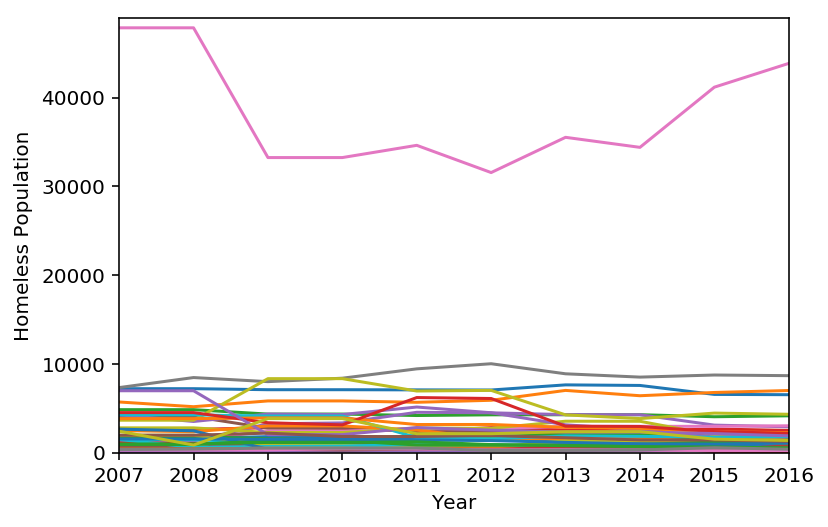

In [27]:
# Placing together the Continuums of Care (CoC) for all 39 CA counties
for i in range(0, 39):
    CoC3 = yPop.loc[i]
    plt.plot([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016], CoC3)
plt.axis([2007, 2016, 0, 49000])
plt.xlabel('Year')
plt.ylabel('Homeless Population')
plt.show()

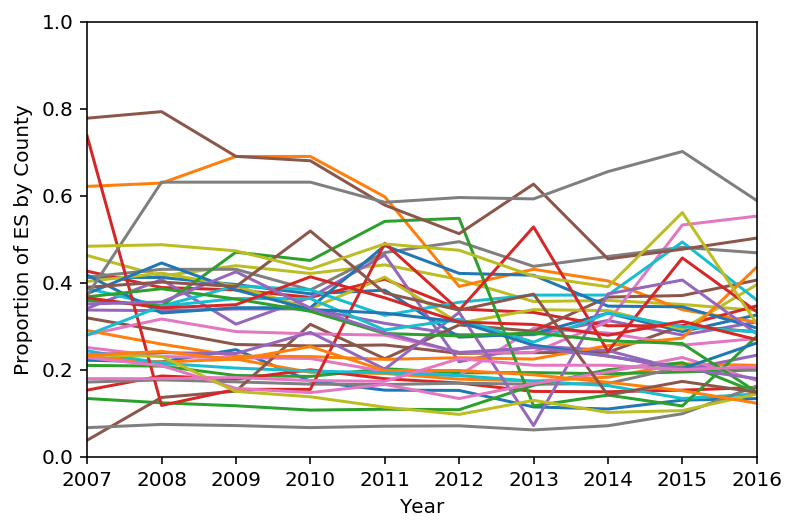

In [28]:
# Using Proportion of Emergency Shelter (ES) by County and years 2007-2016 to find correlation of Homelessness through the years. 
for i in range(0, 39):
    CoC = ES.loc[i]
    plt.plot([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016], CoC)
plt.axis([2007, 2016, 0, 1])
plt.xlabel('Year')
plt.ylabel('Proportion of ES by County')
plt.show()

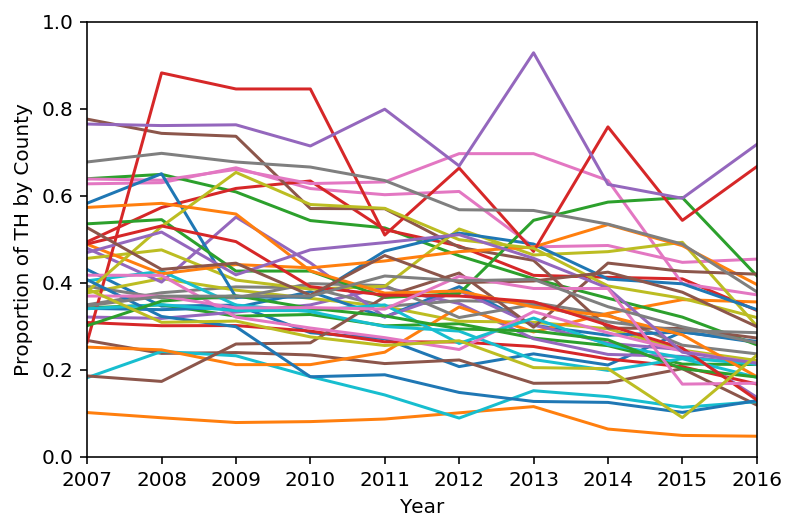

In [29]:
# Using Proportion of Transitional Housing Programs (TH) by County and years 2007-2016 to find correlation of Homelessness through the years.
for i in range(0, 39):
    CoC1 = TH.loc[i]
    plt.plot([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016], CoC1)
plt.axis([2007, 2016, 0, 1])
plt.xlabel('Year')
plt.ylabel('Proportion of TH by County')
plt.show()

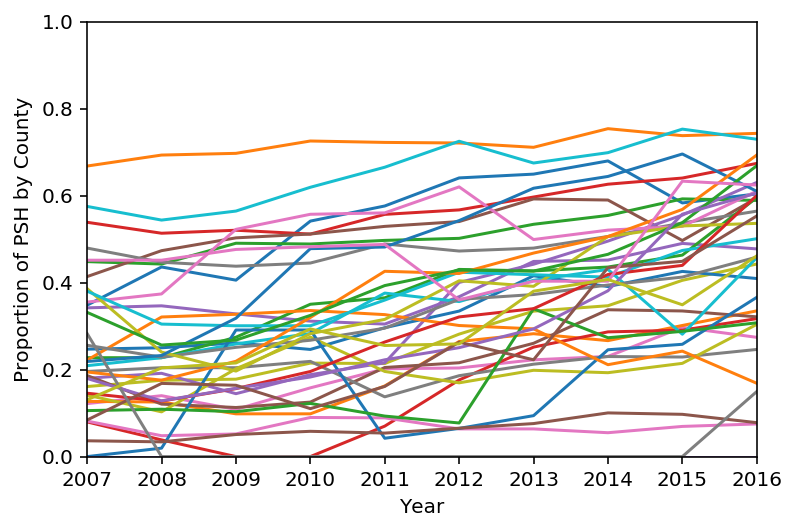

In [30]:
# Using Proportion of Permanent Supportive Housing (PSH) by County and years 2007-2016 to find correlation of Homelessness through the years. 
for i in range(0, 39):
    CoC2 = PSH.loc[i]
    plt.plot([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016], CoC2)
plt.axis([2007, 2016, 0, 1])
plt.xlabel('Year')
plt.ylabel('Proportion of PSH by County')
plt.show()

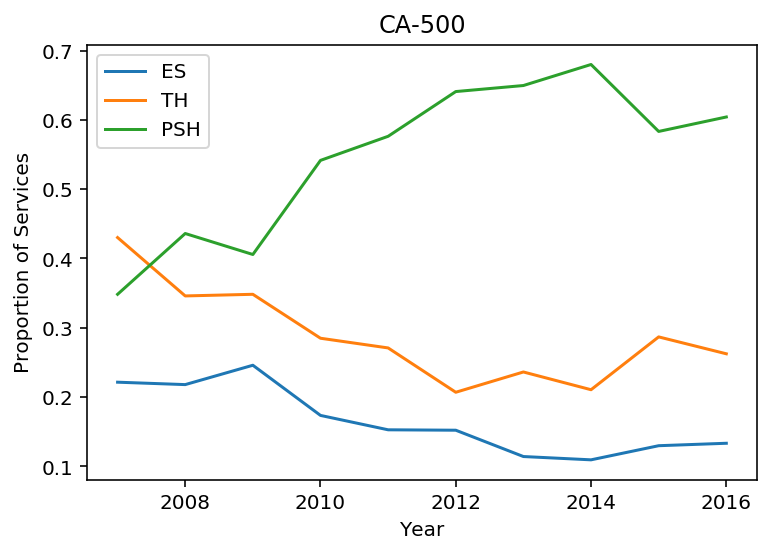

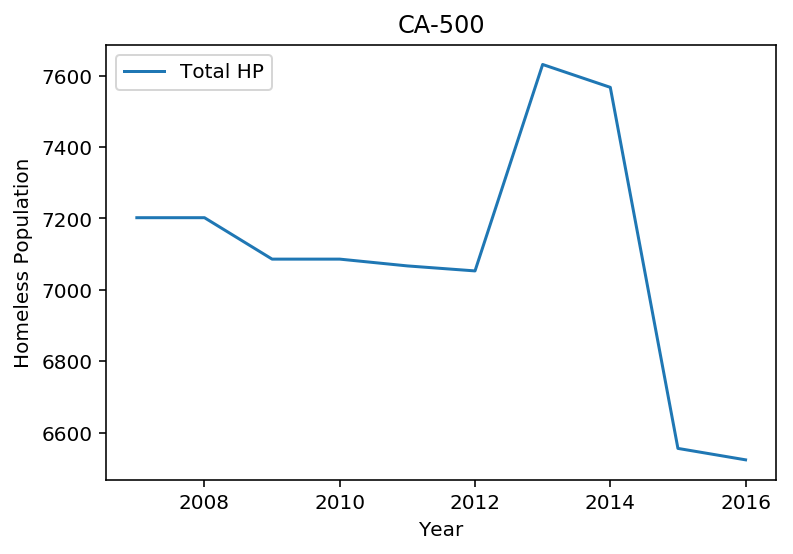

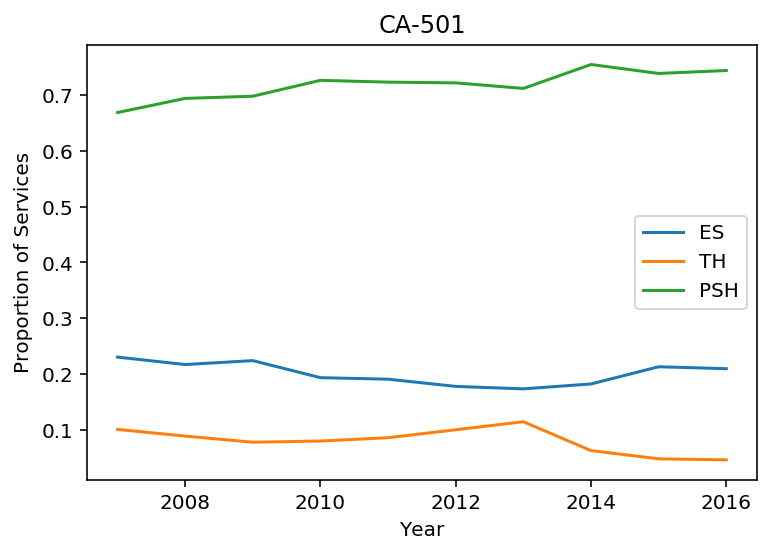

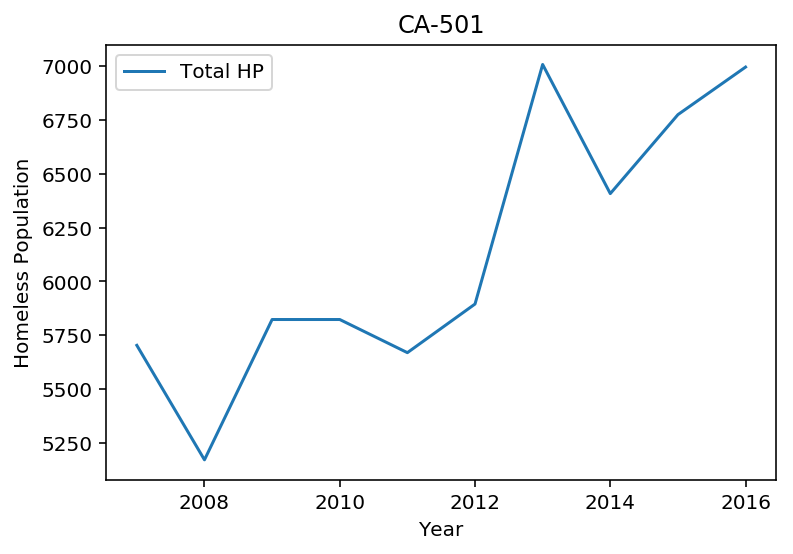

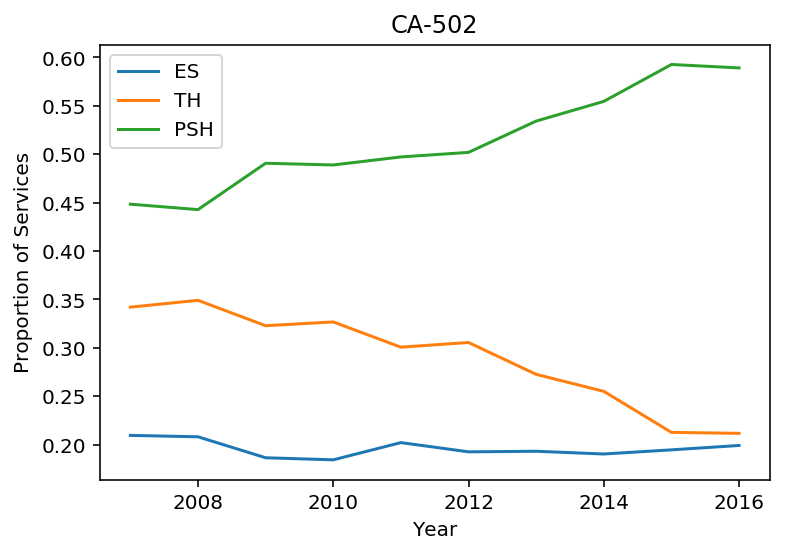

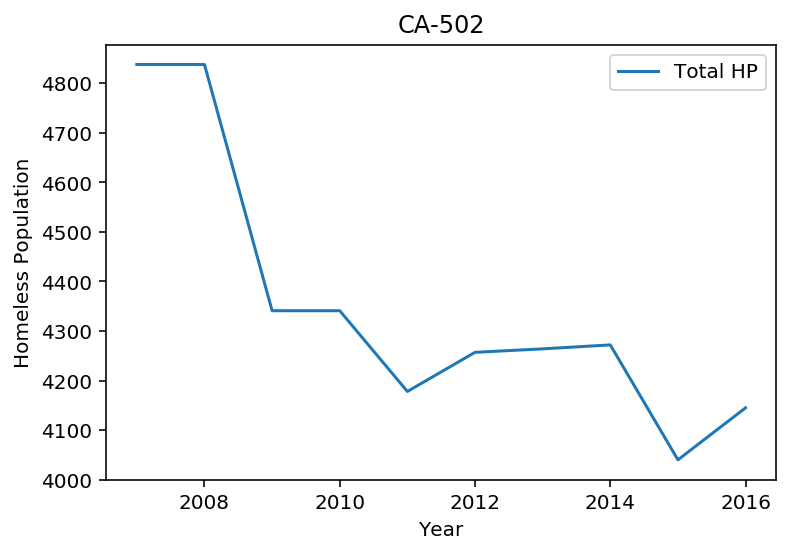

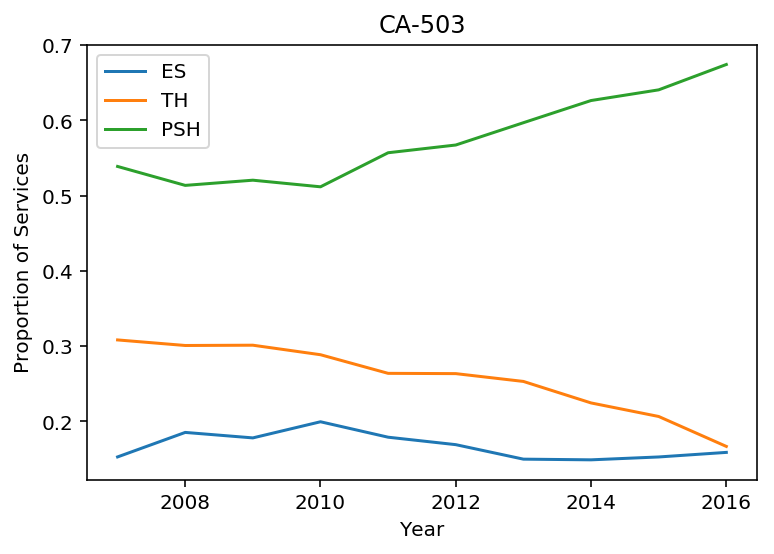

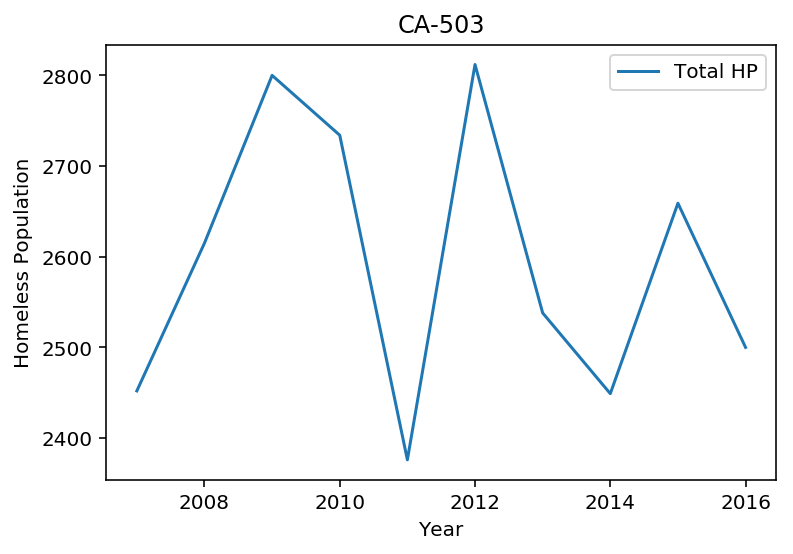

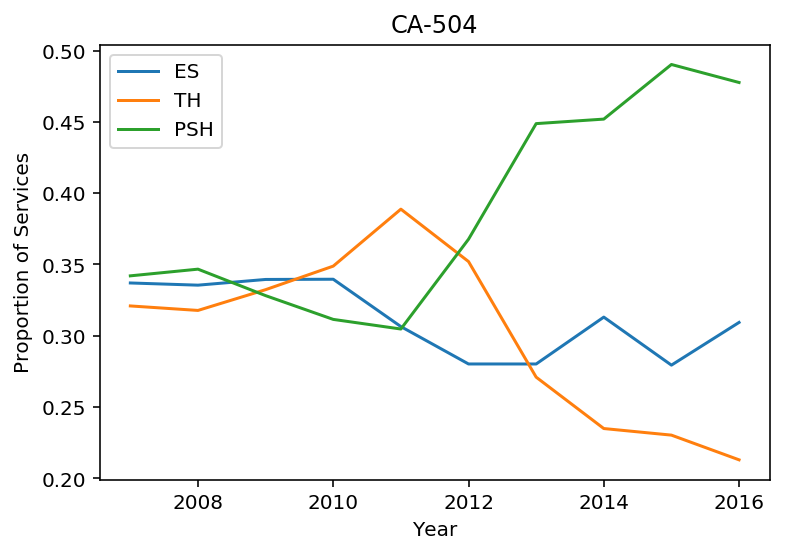

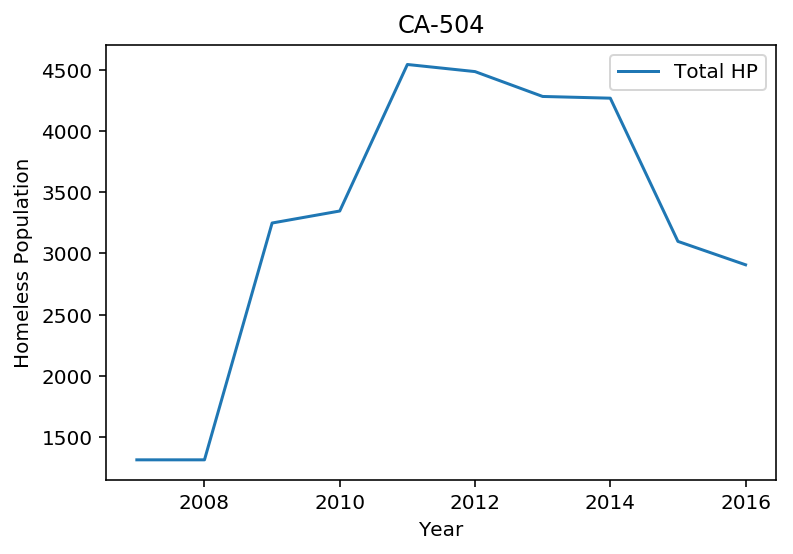

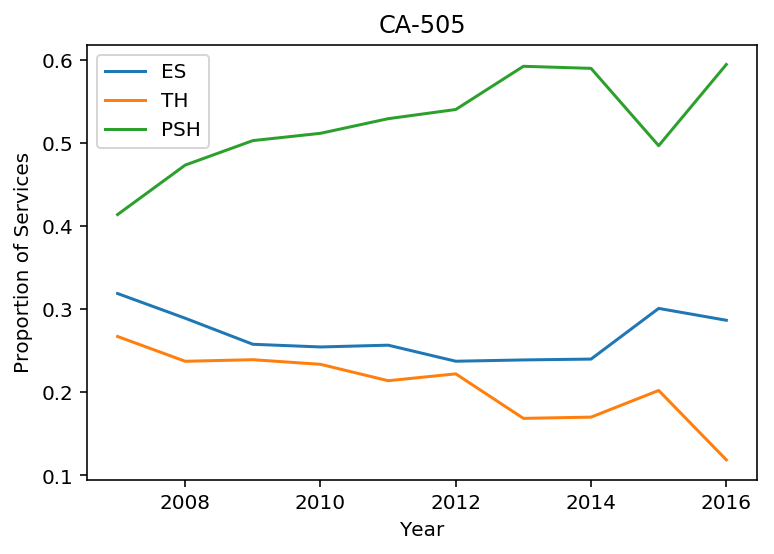

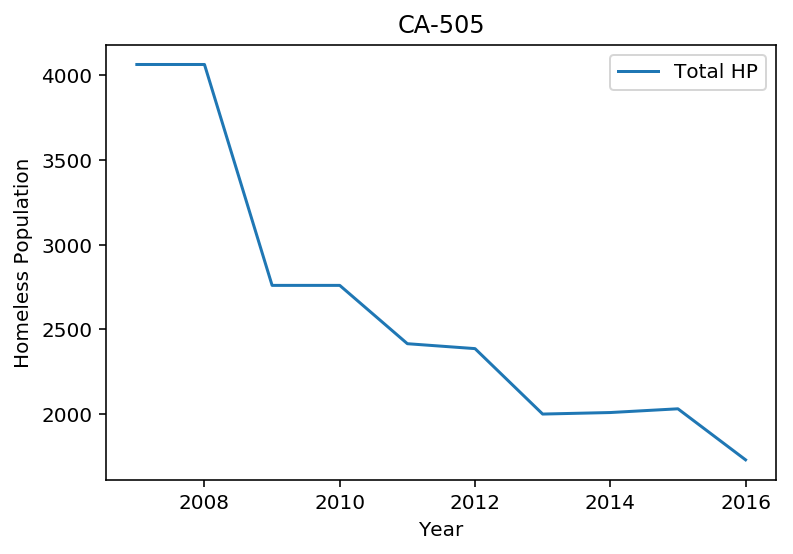

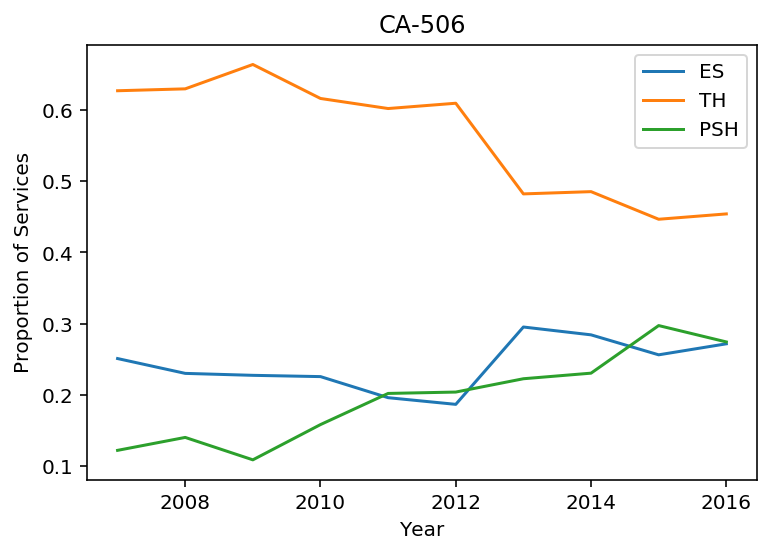

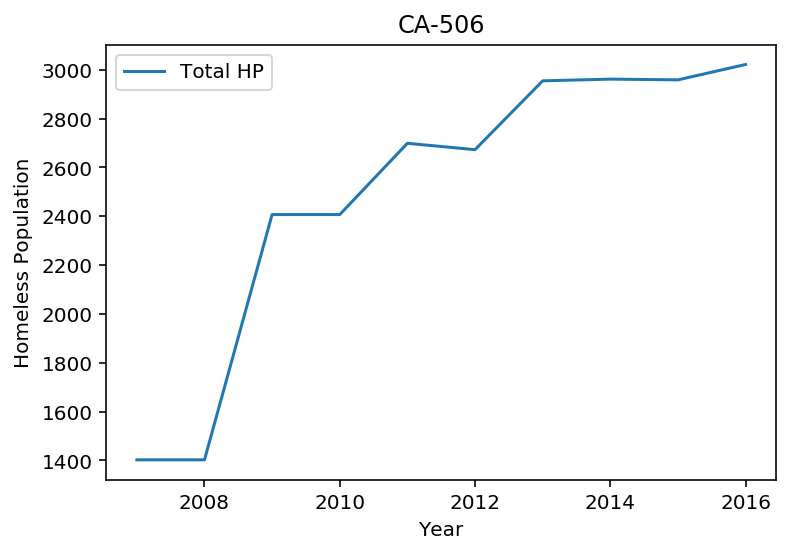

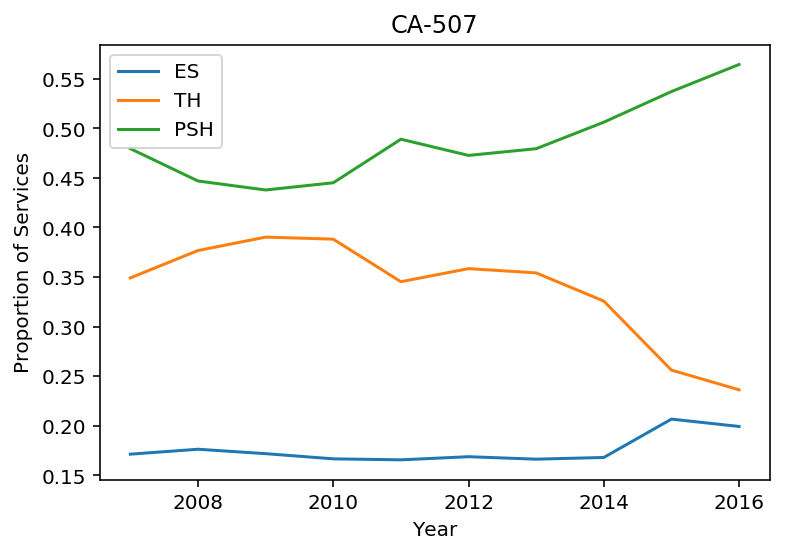

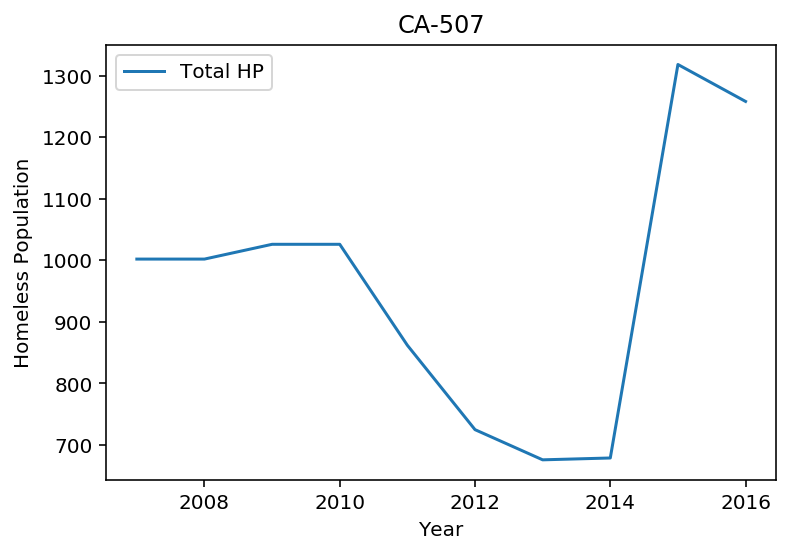

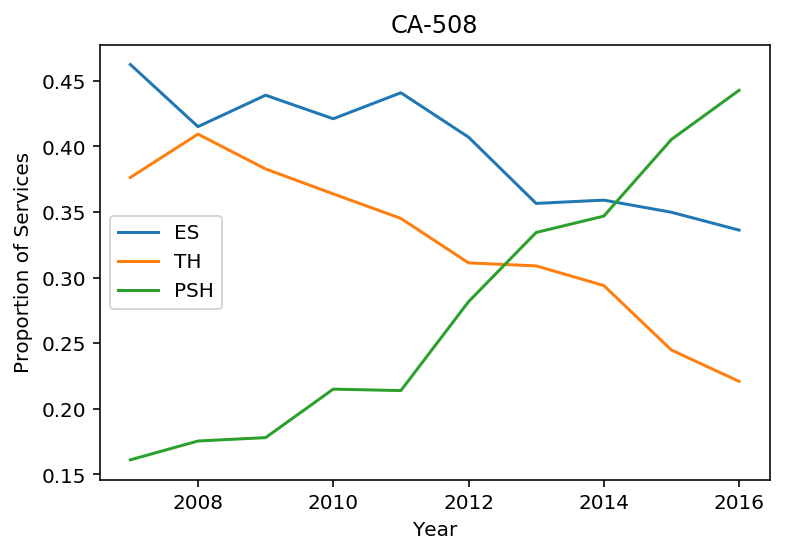

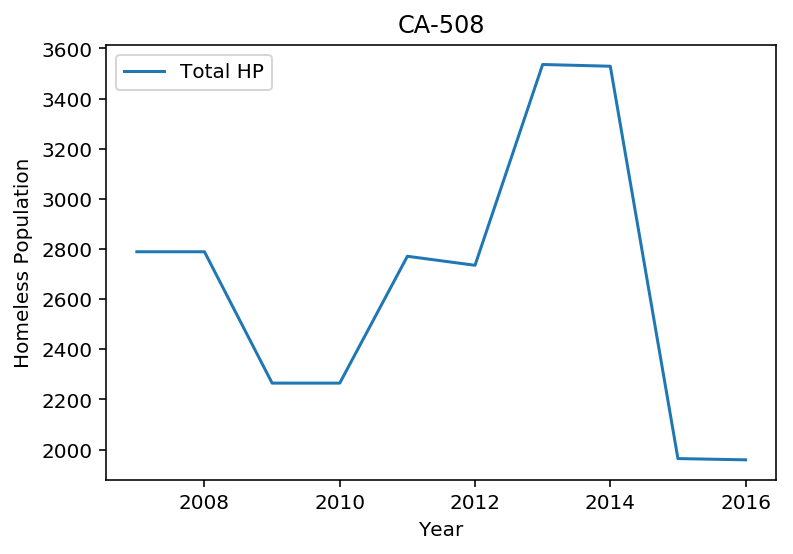

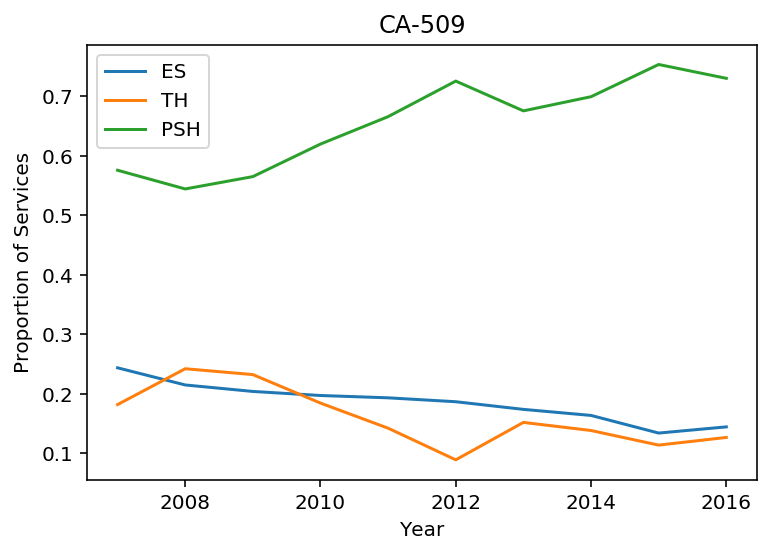

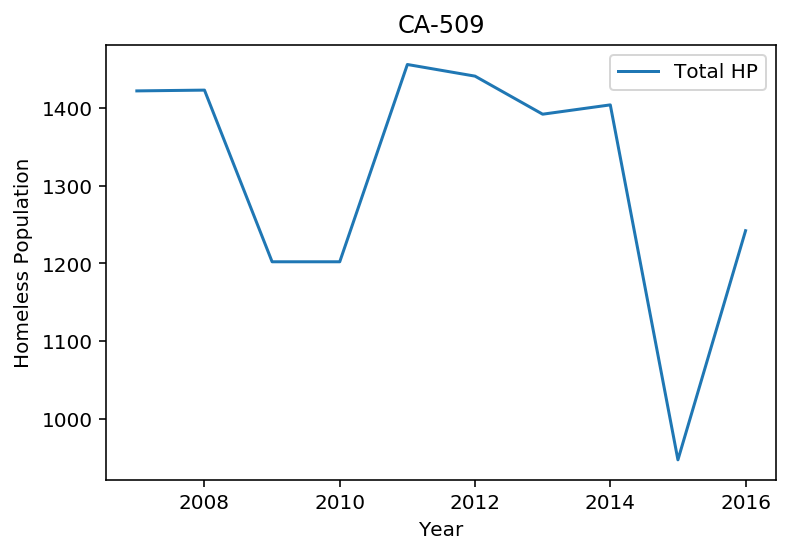

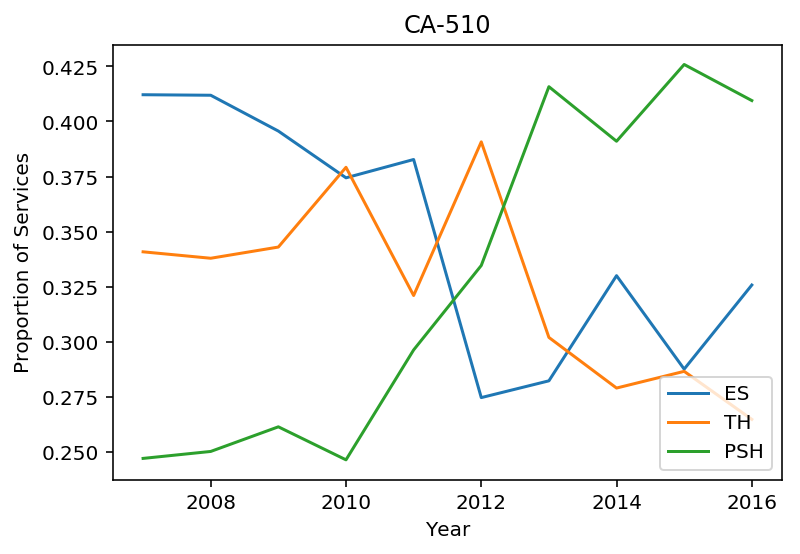

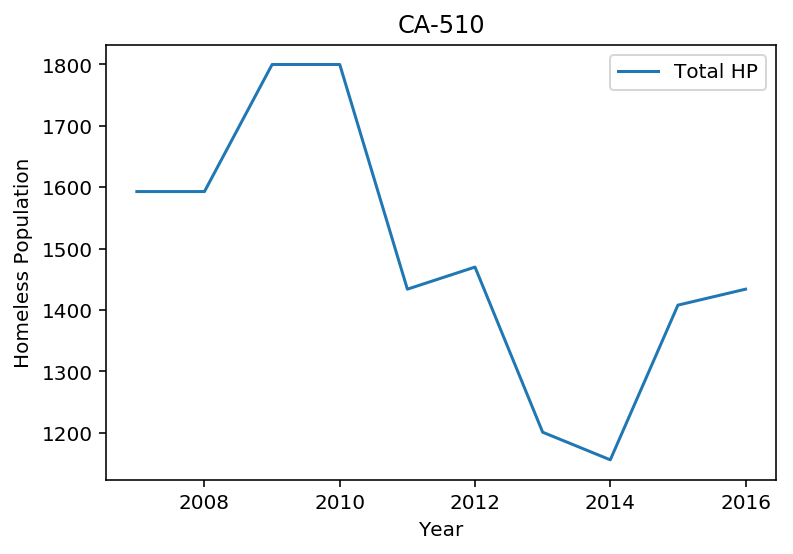

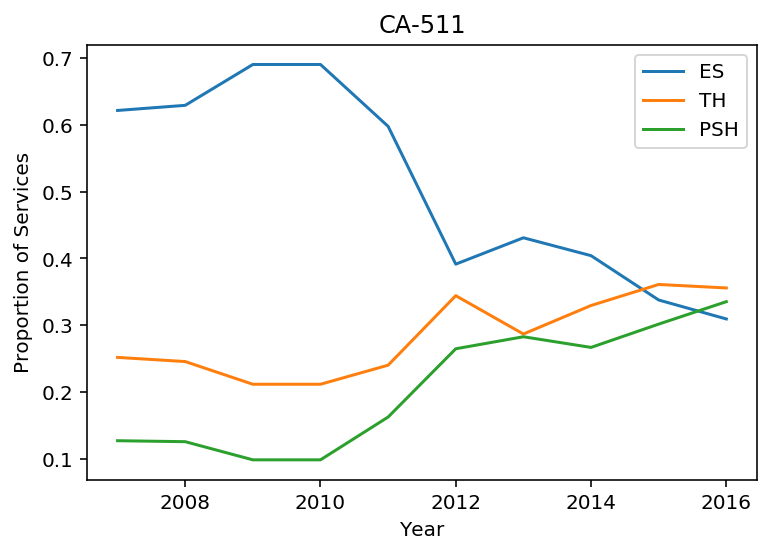

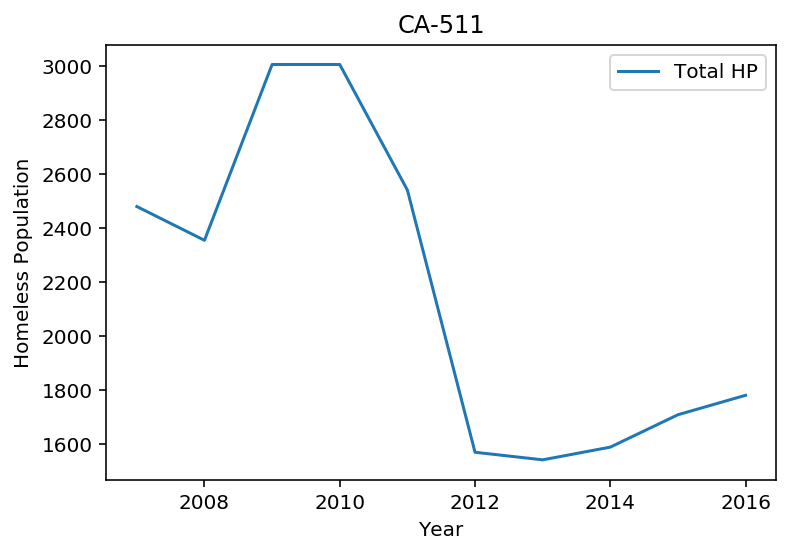

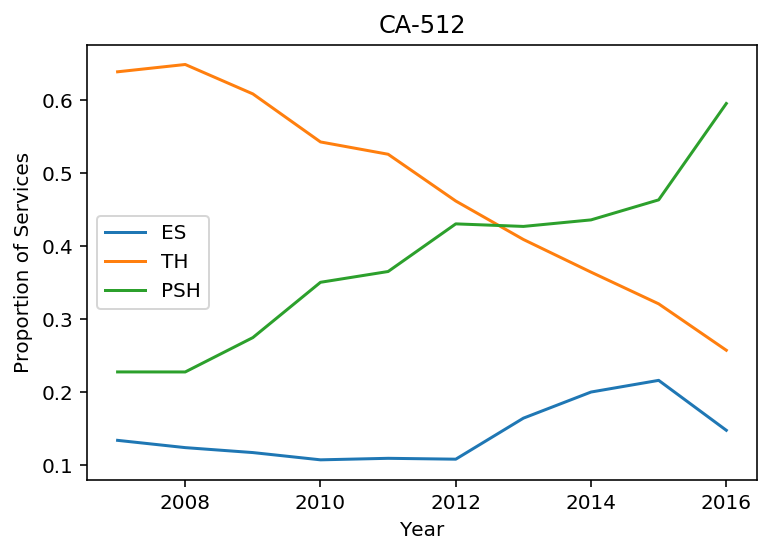

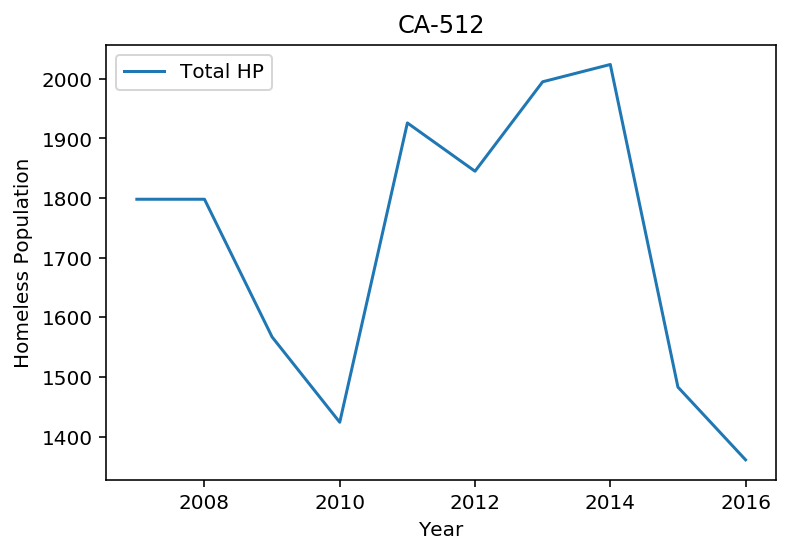

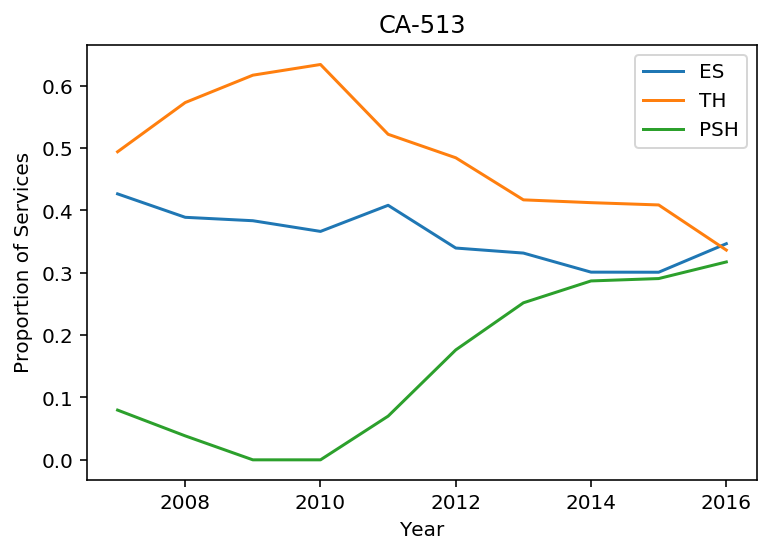

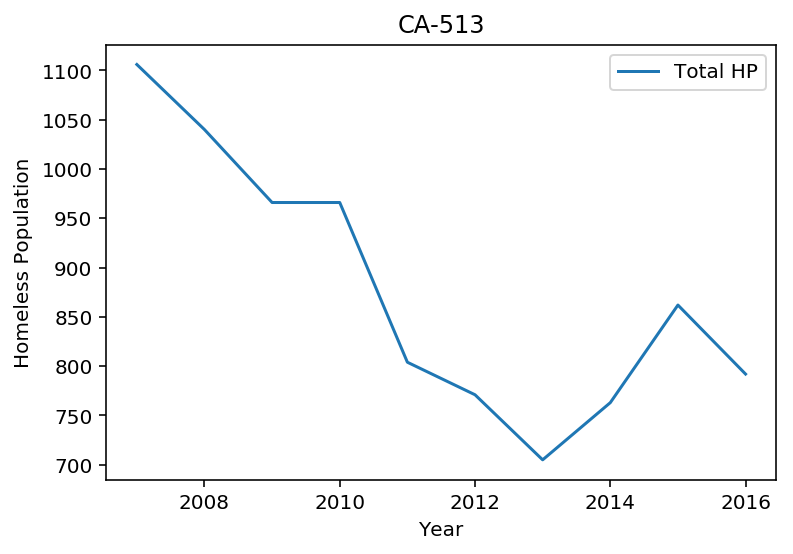

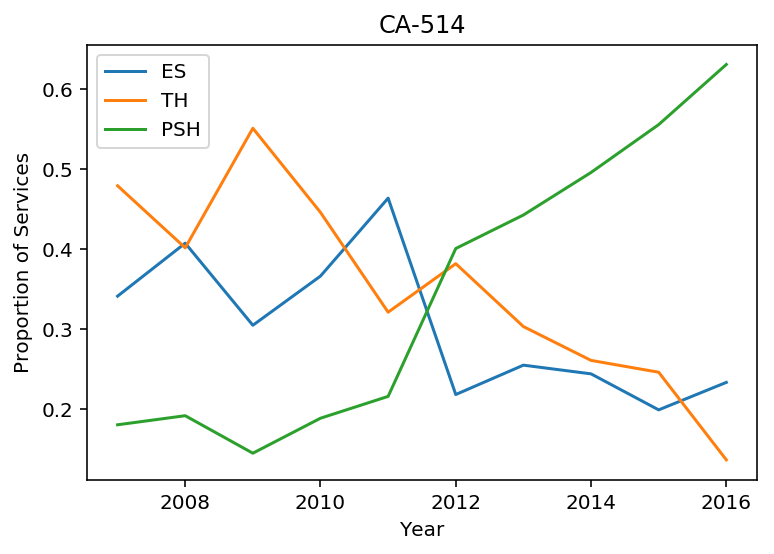

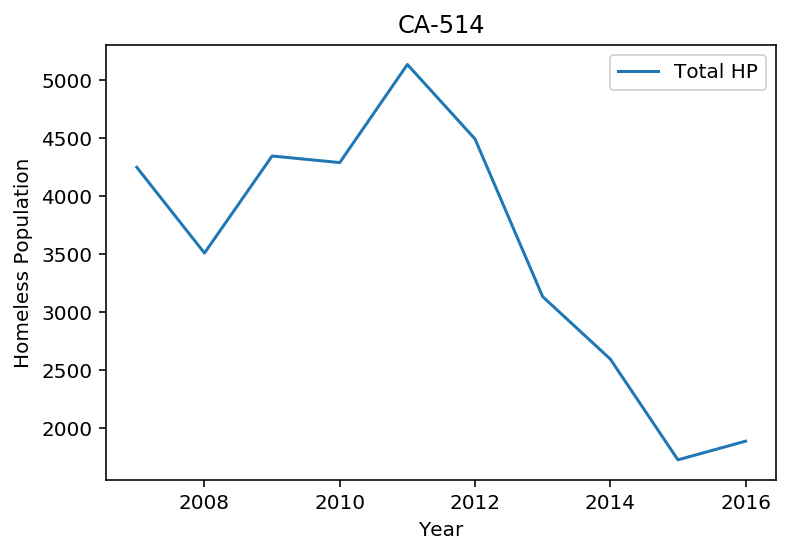

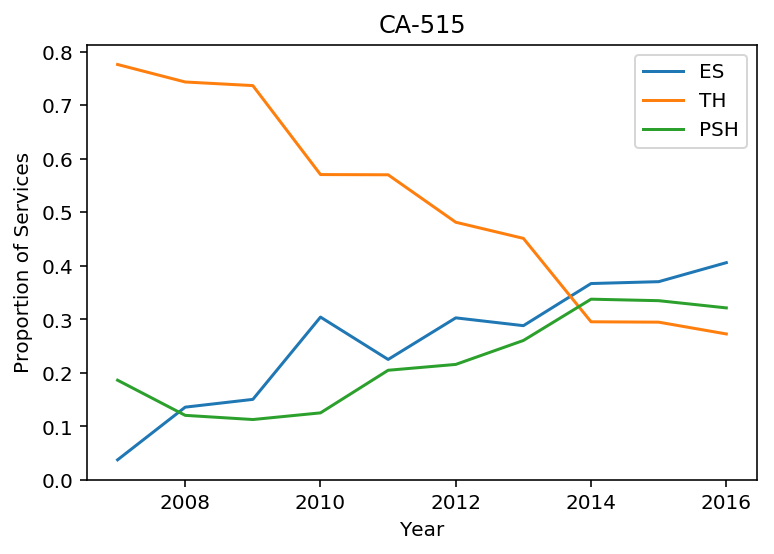

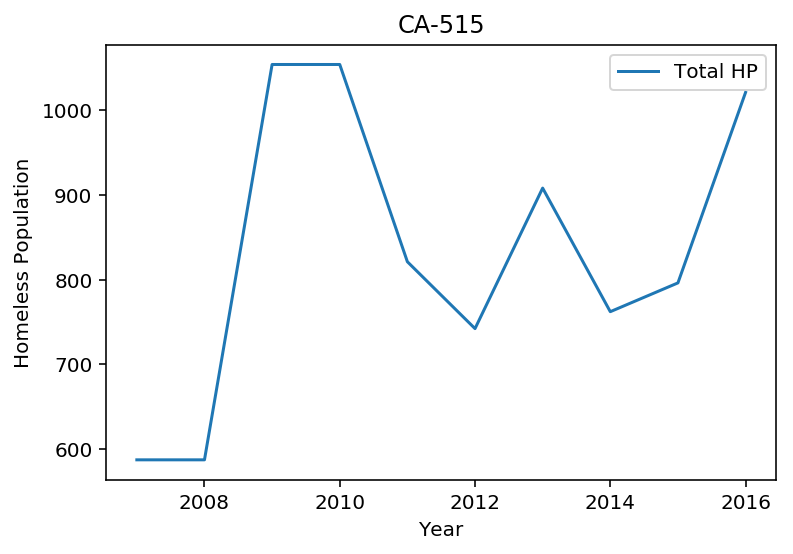

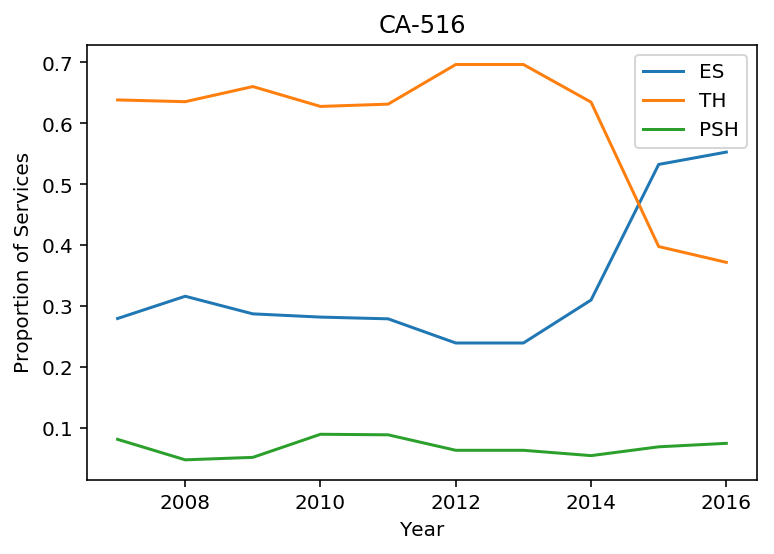

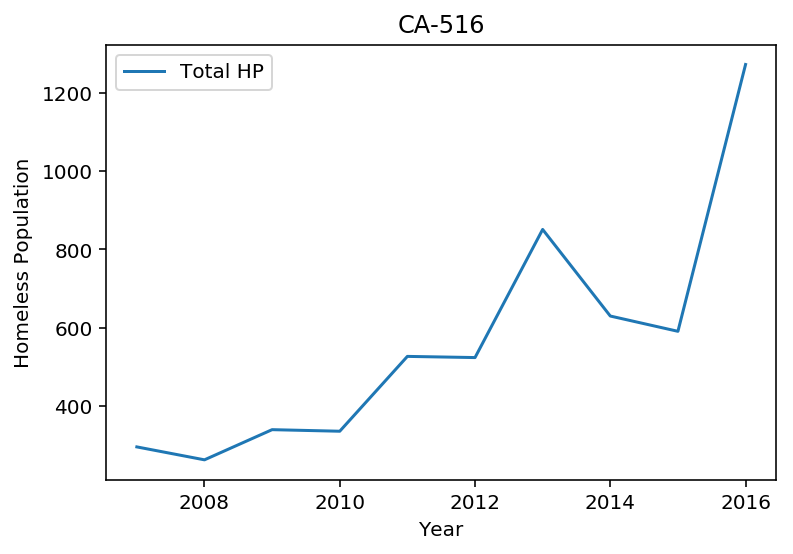

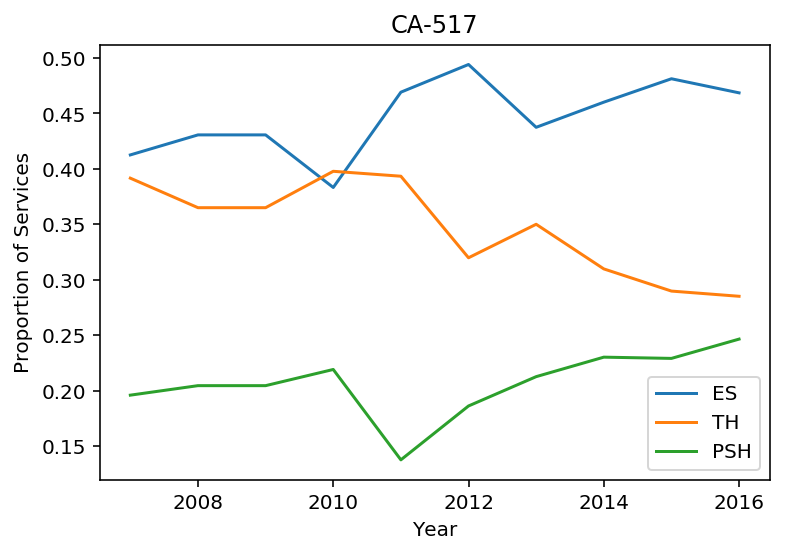

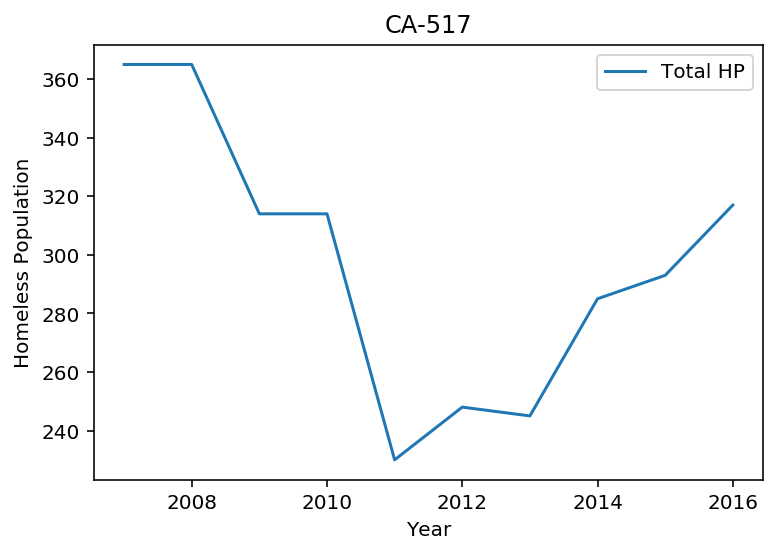

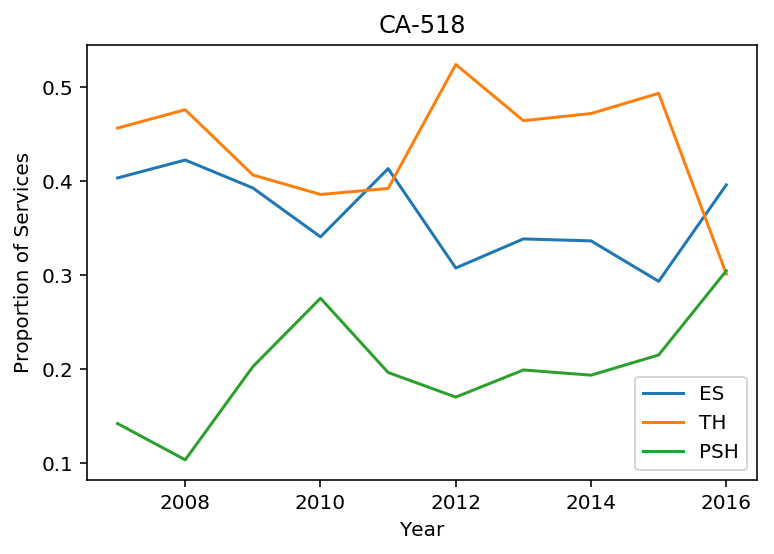

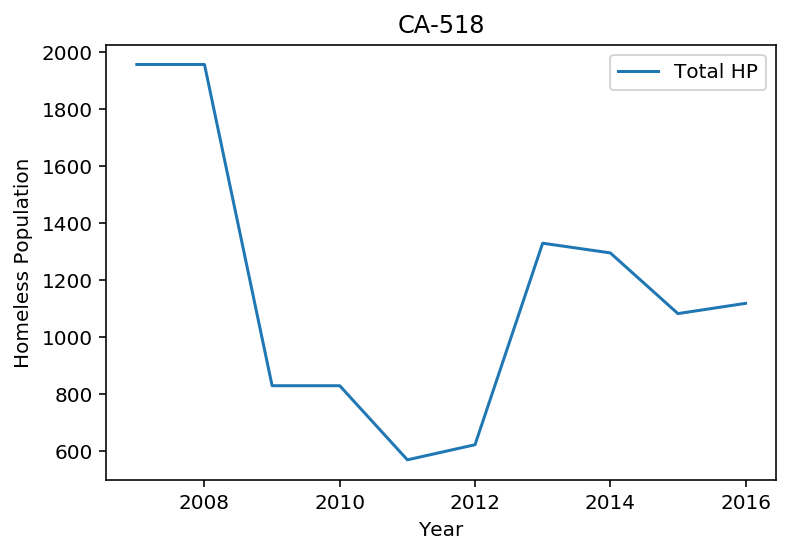

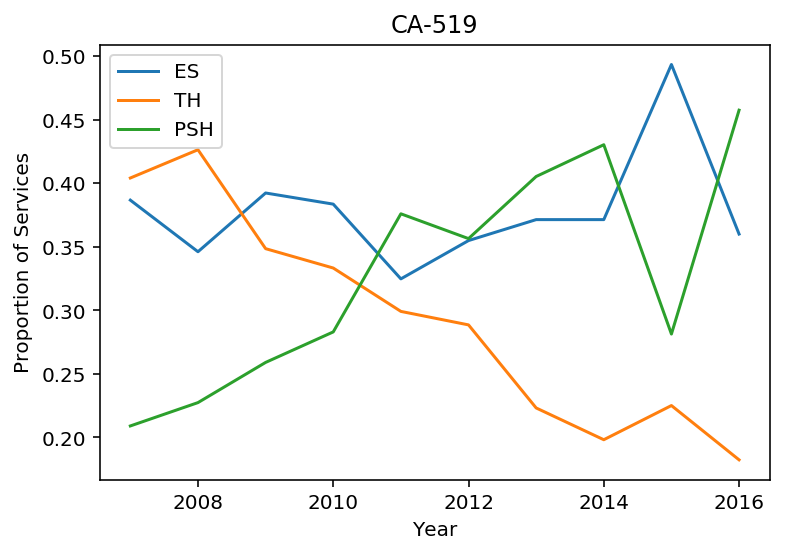

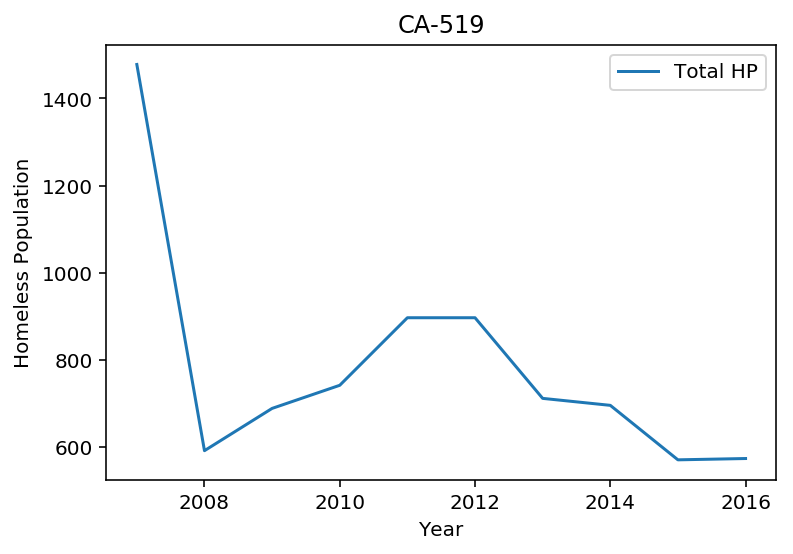

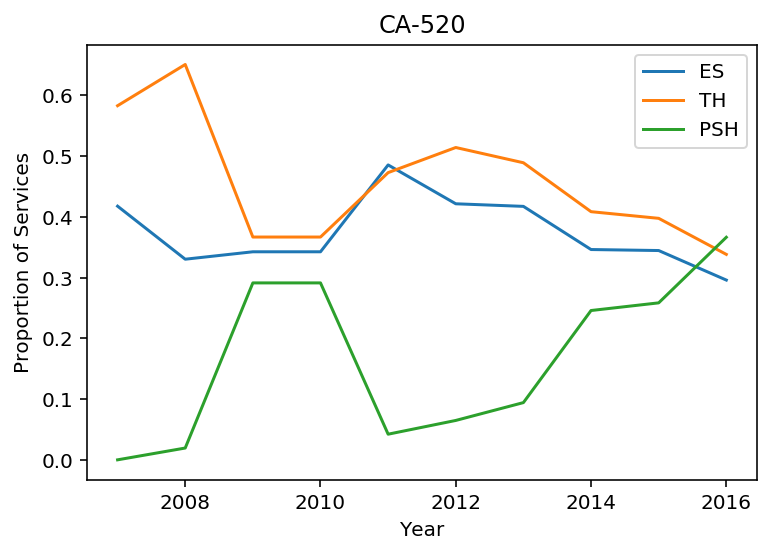

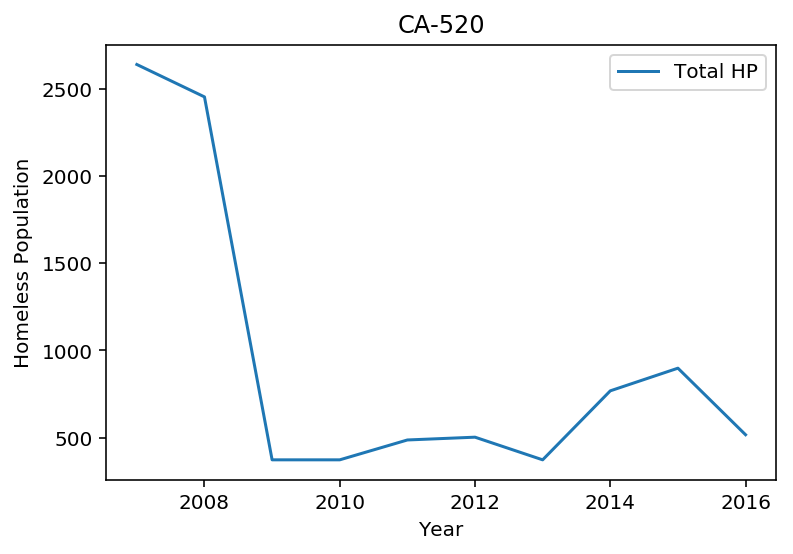

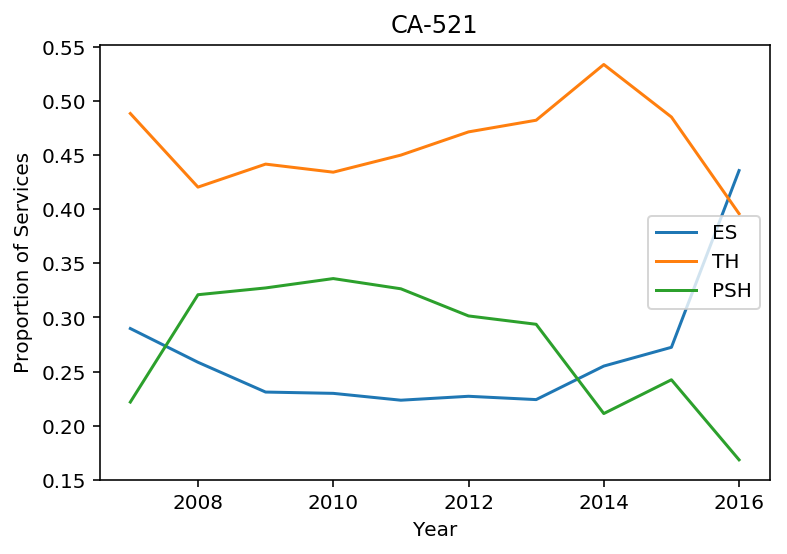

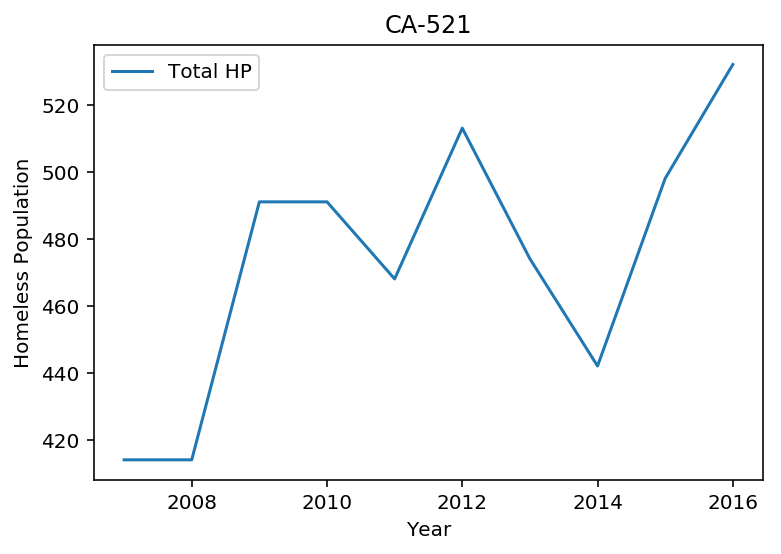

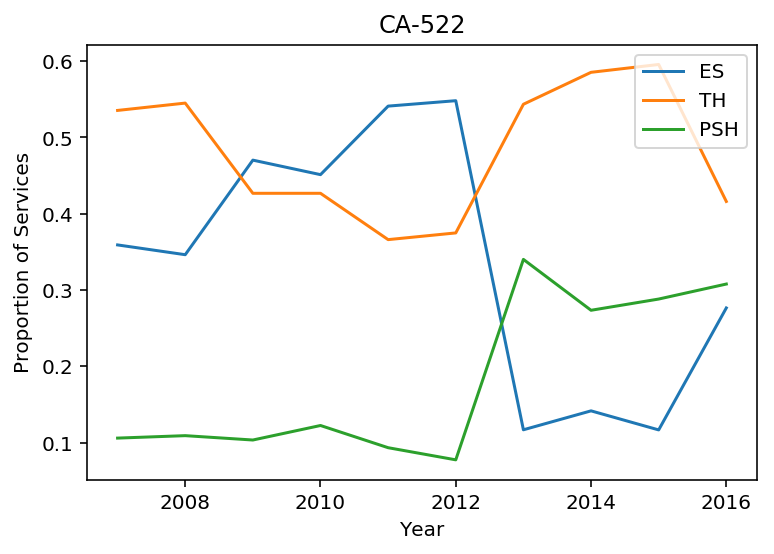

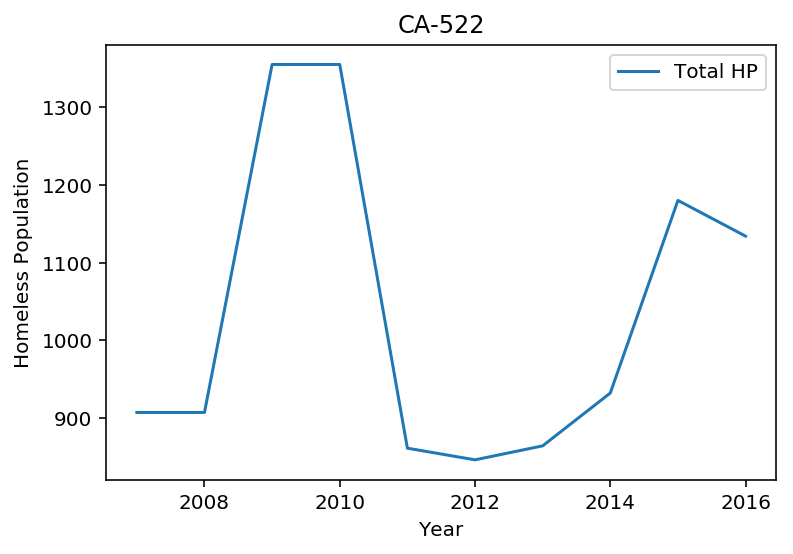

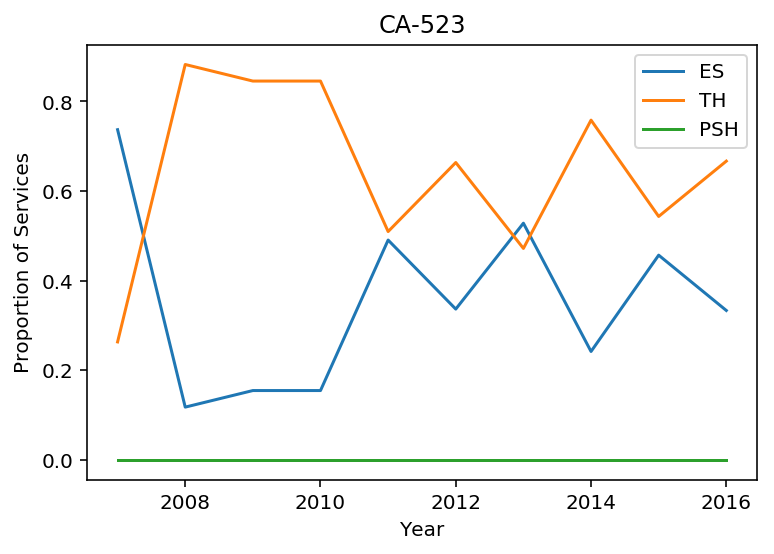

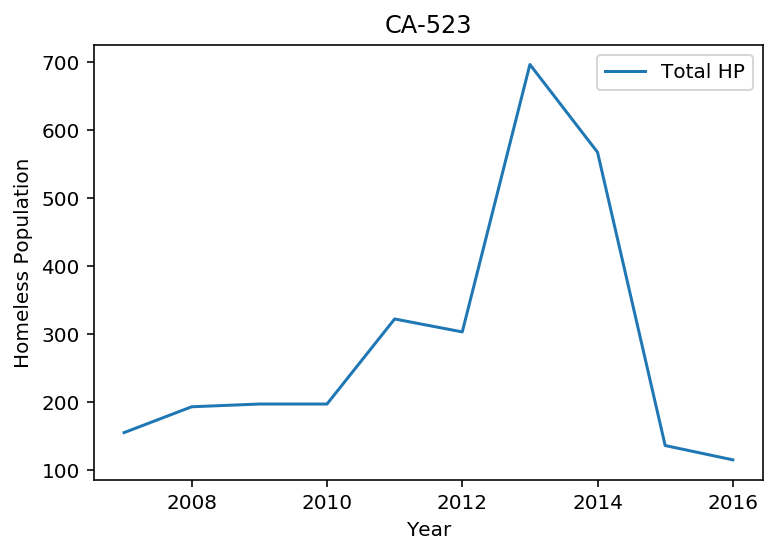

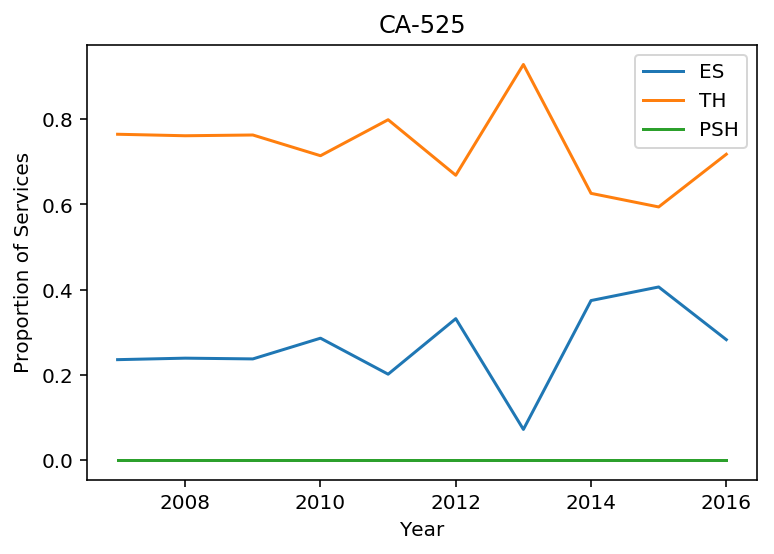

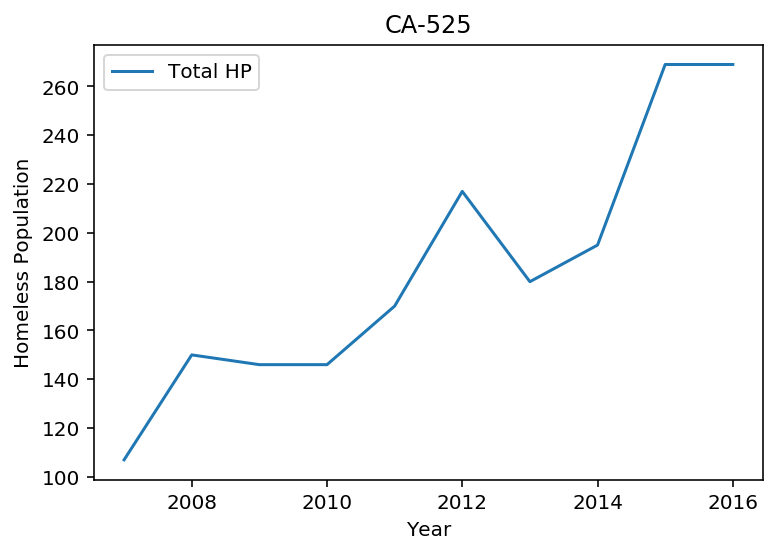

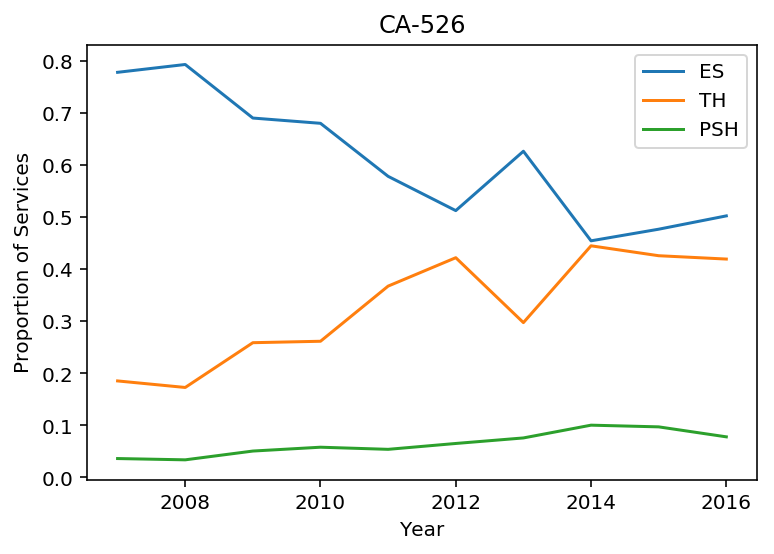

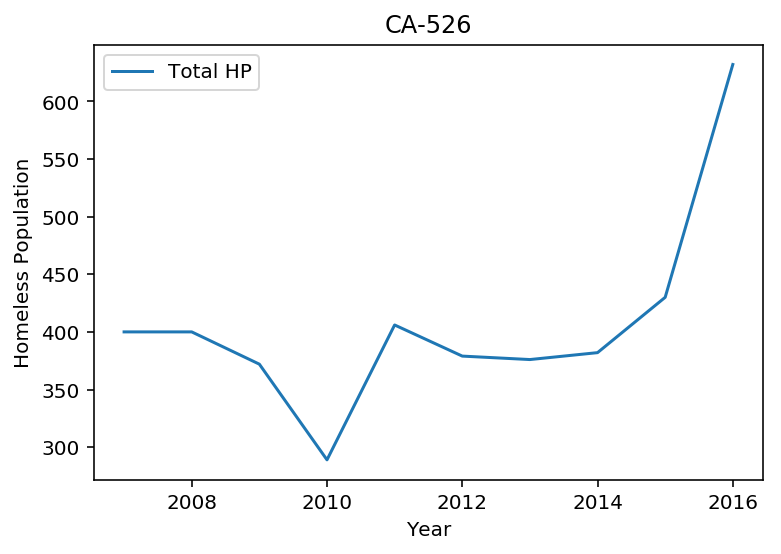

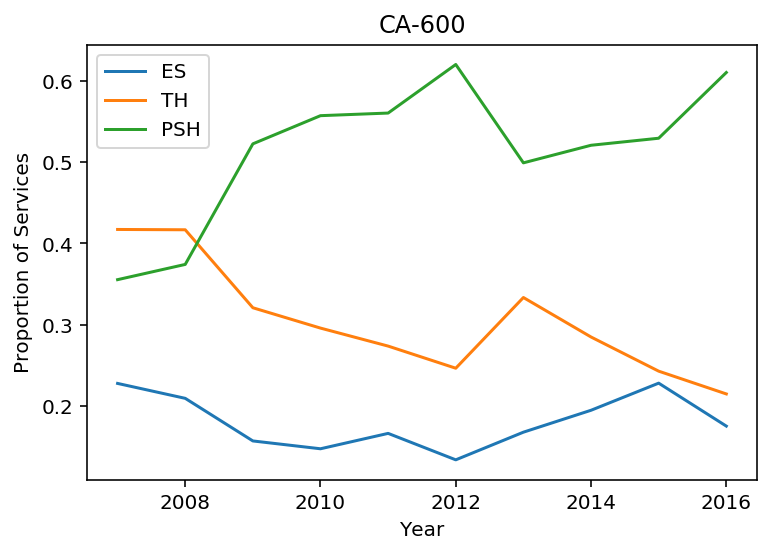

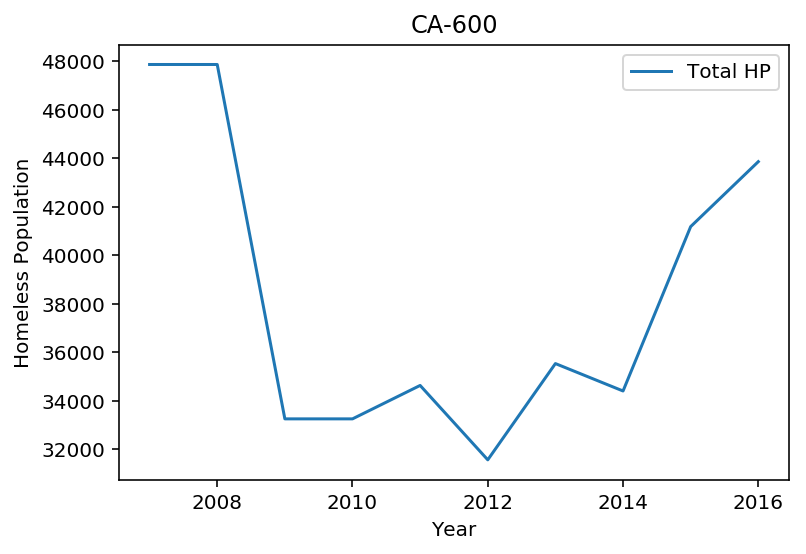

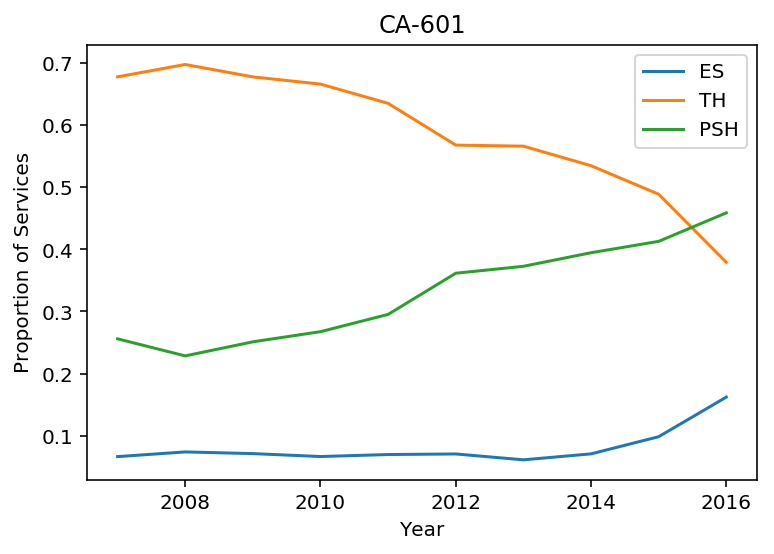

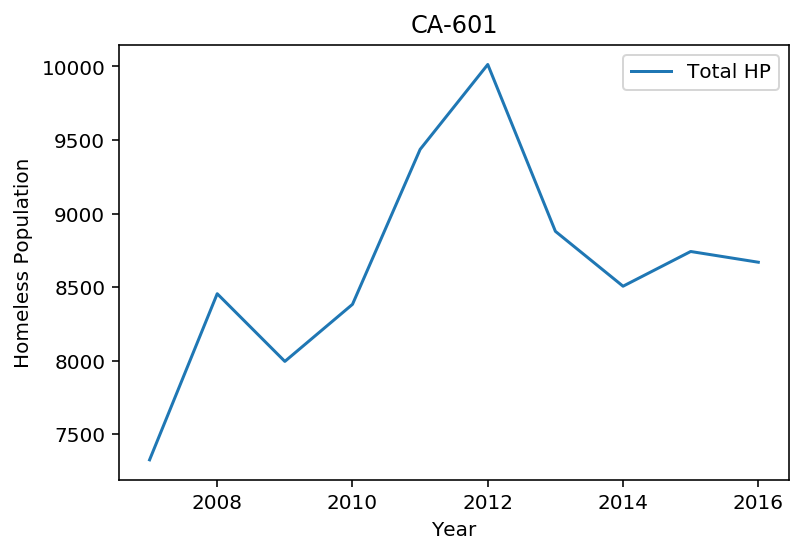

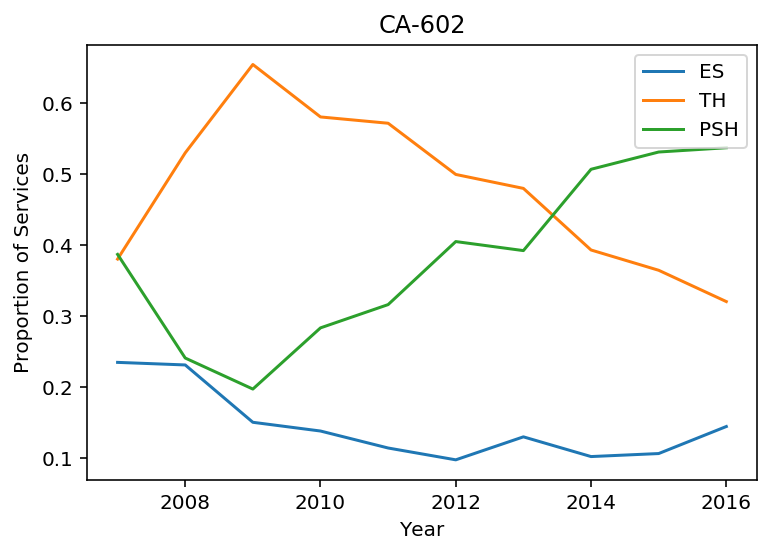

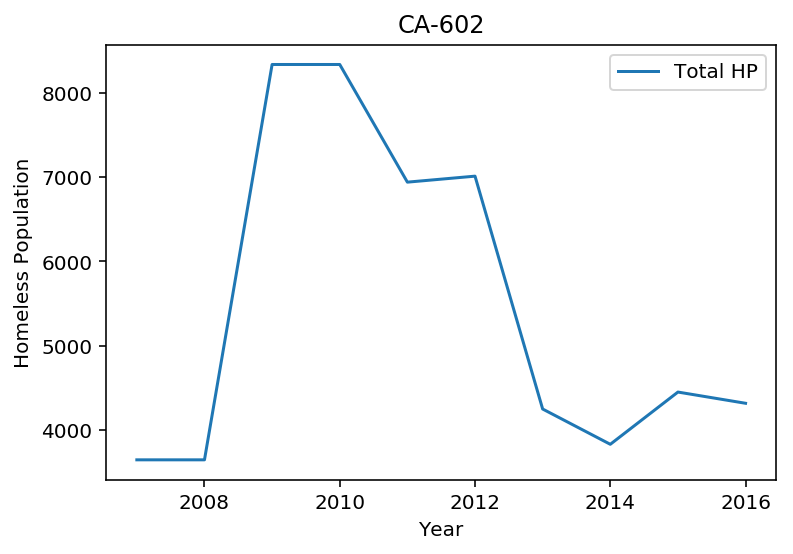

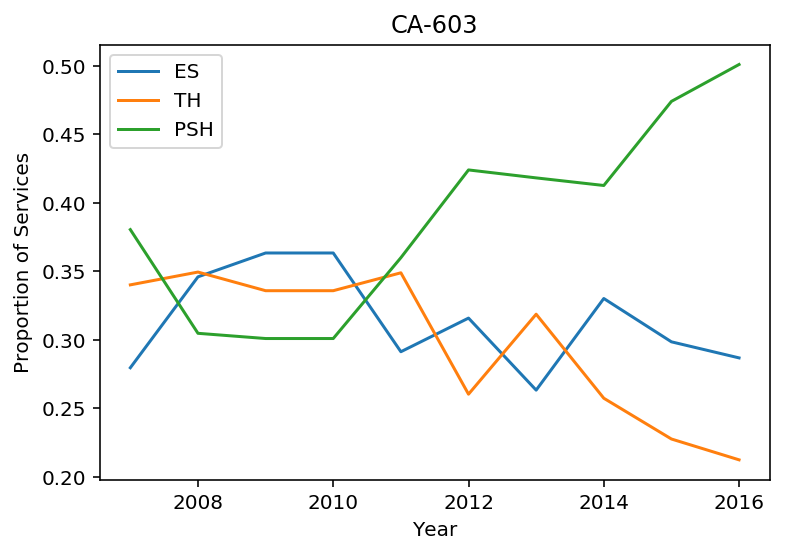

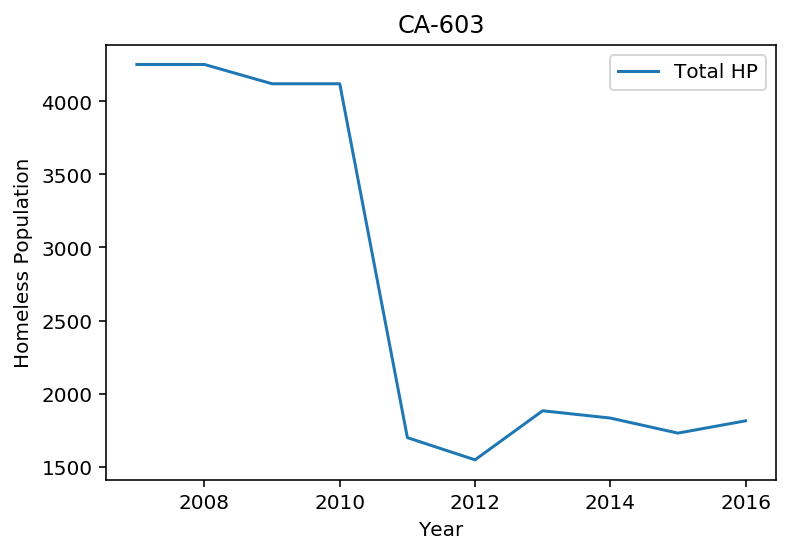

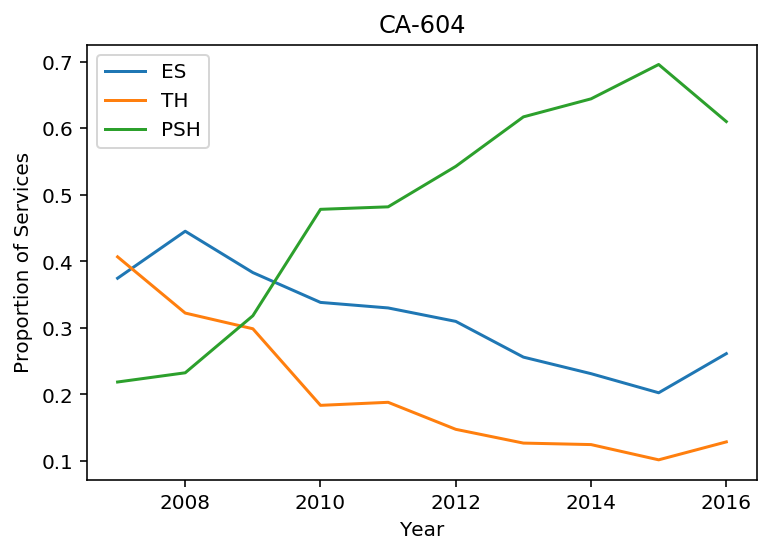

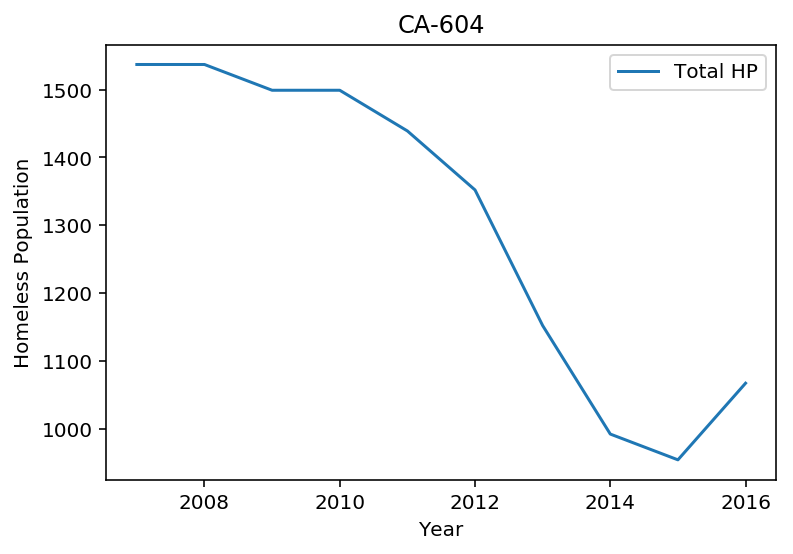

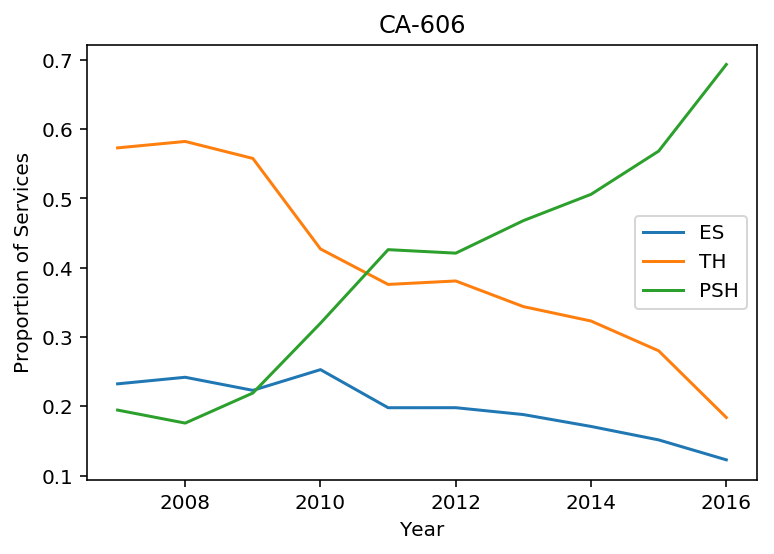

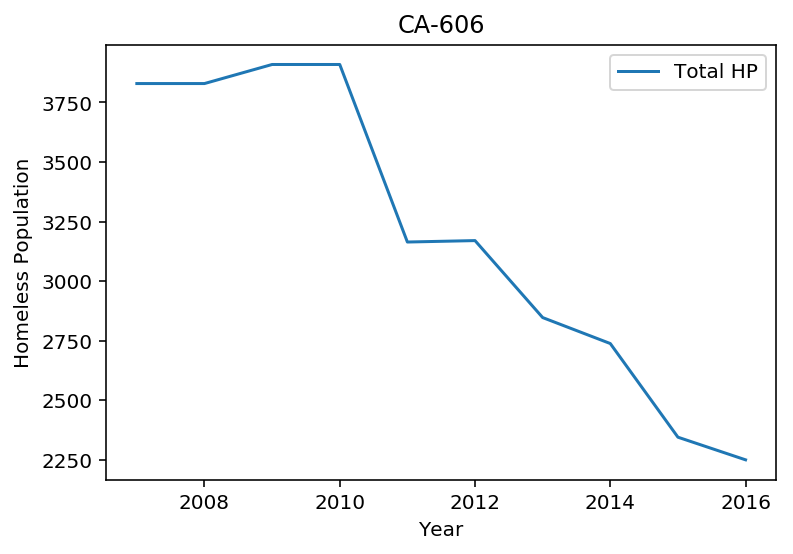

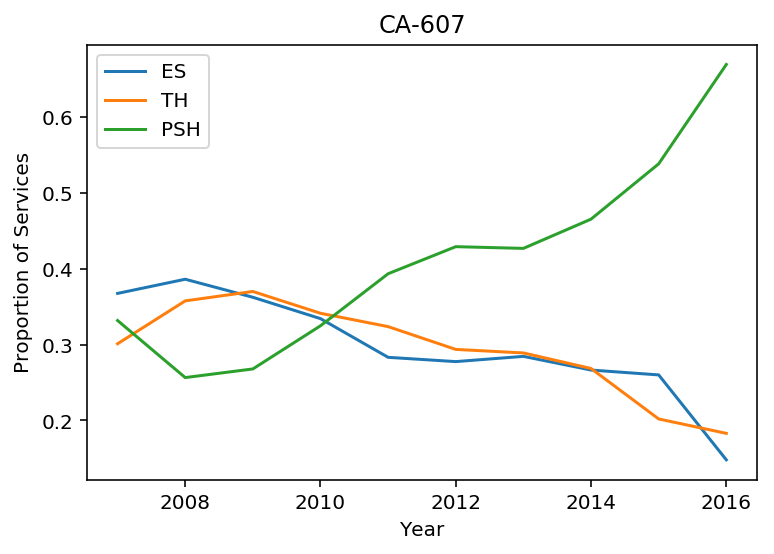

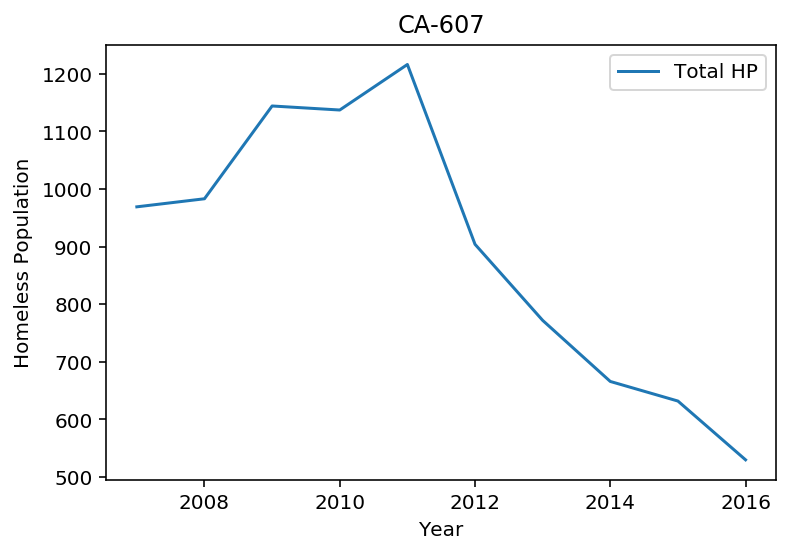

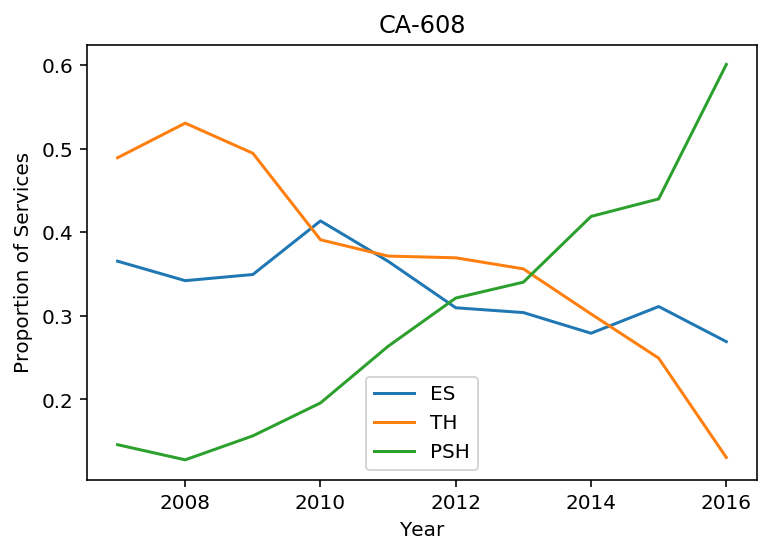

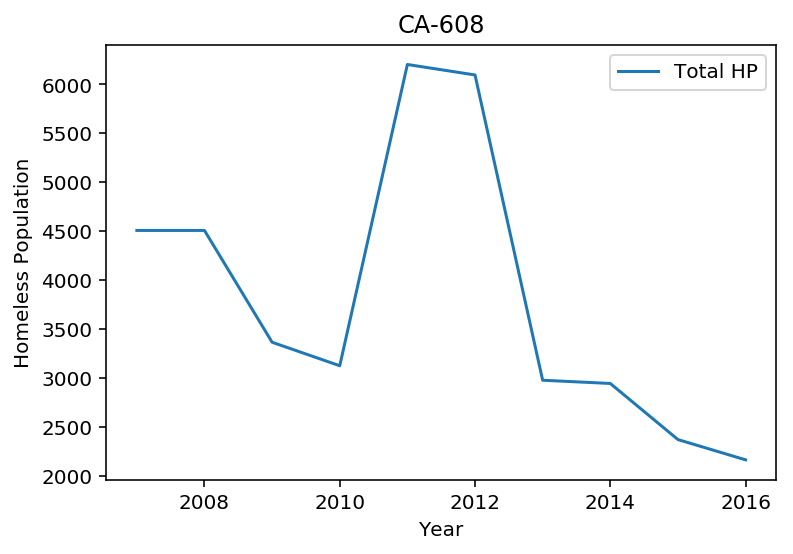

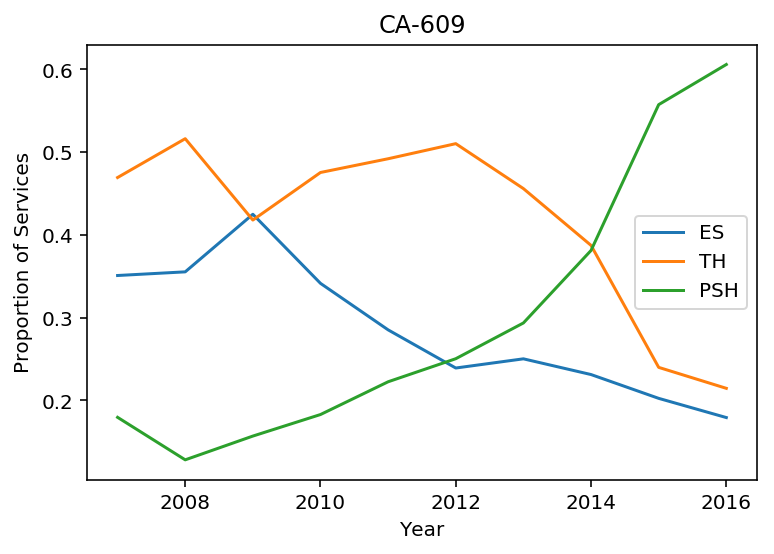

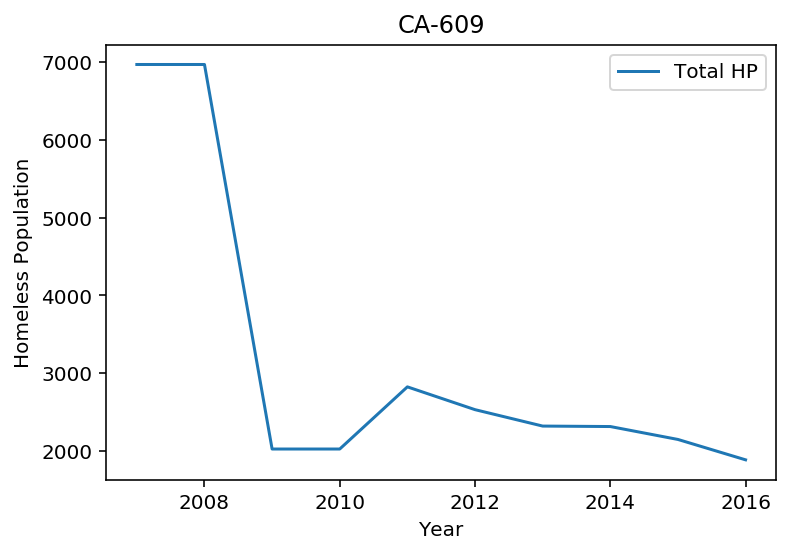

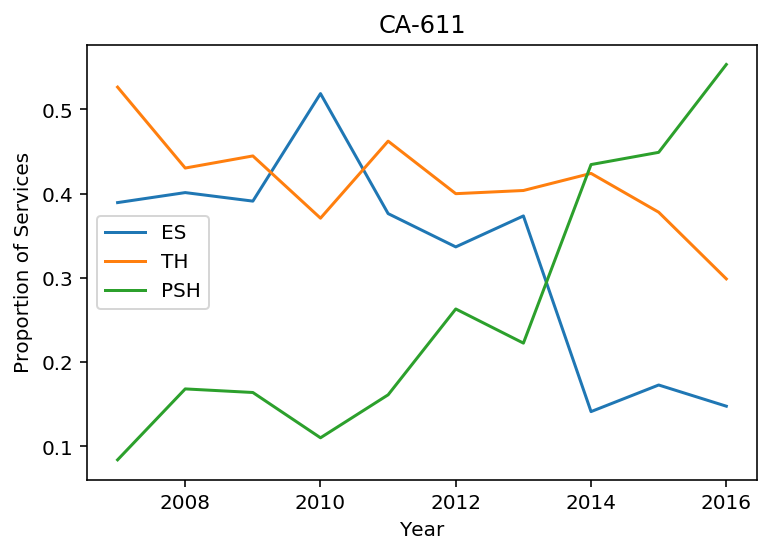

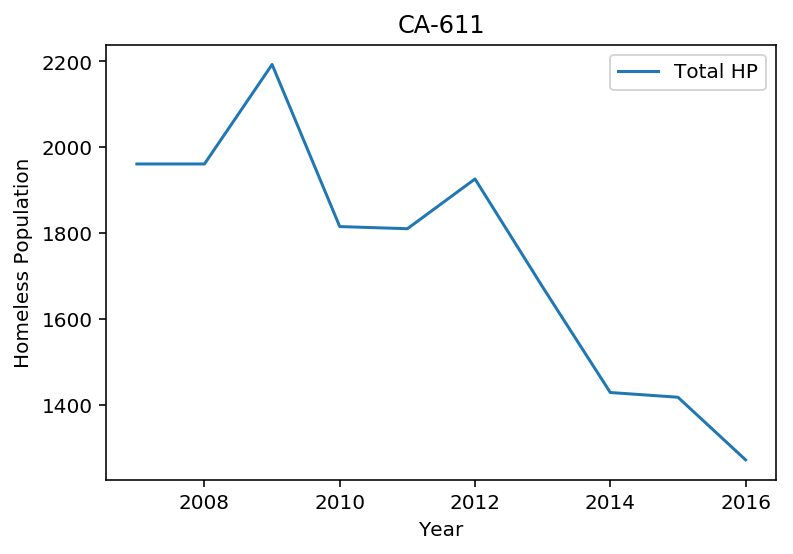

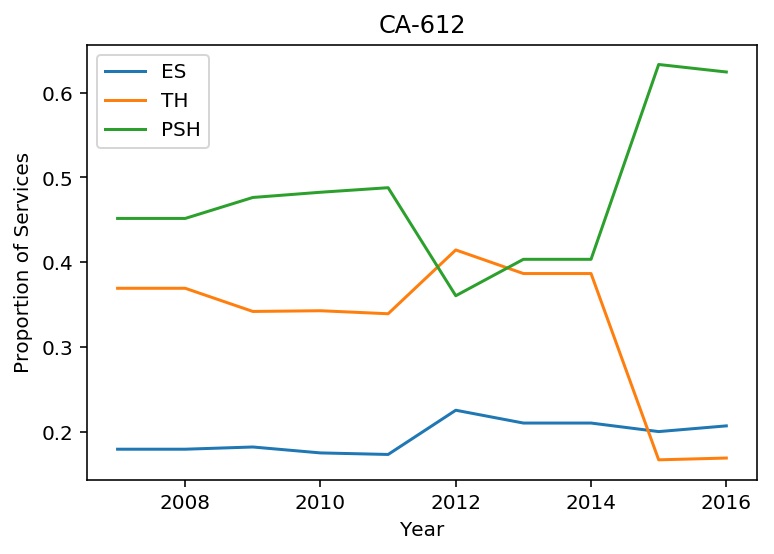

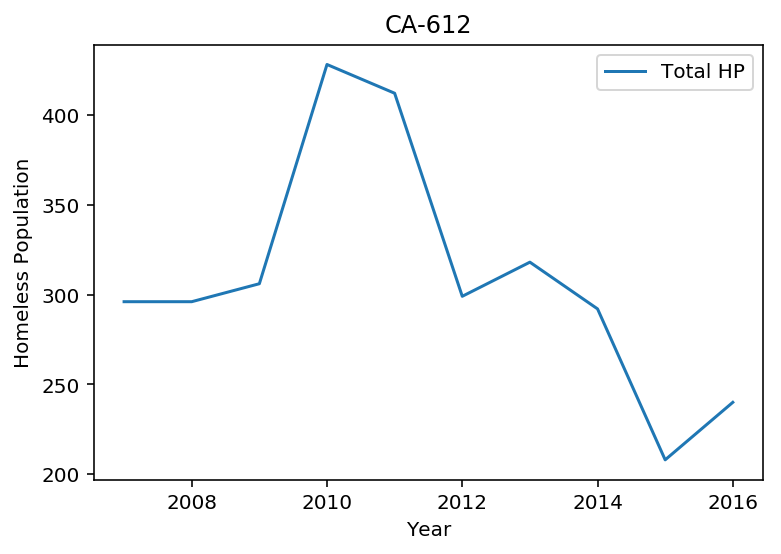

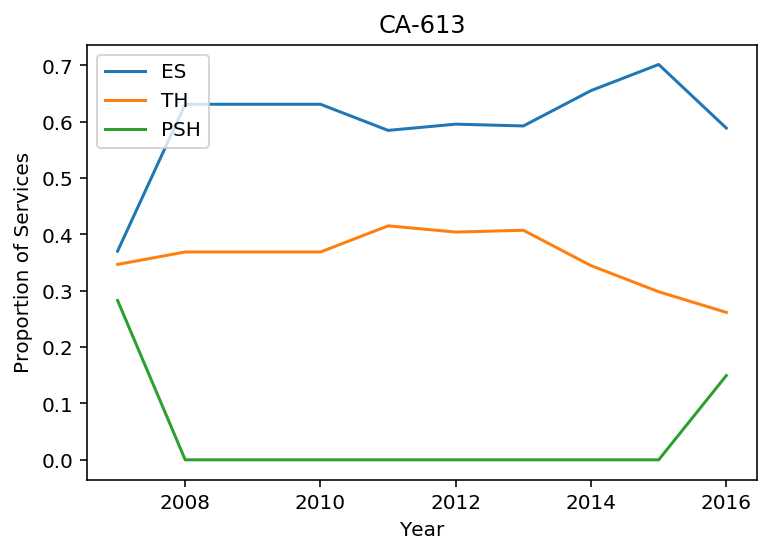

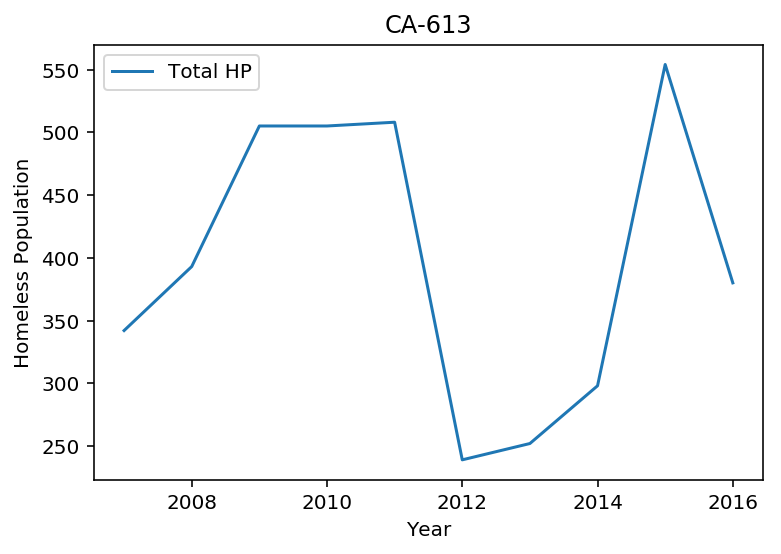

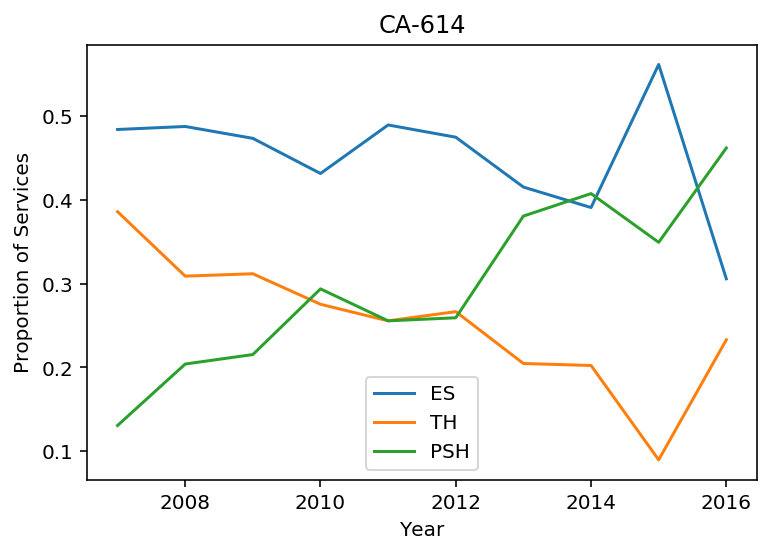

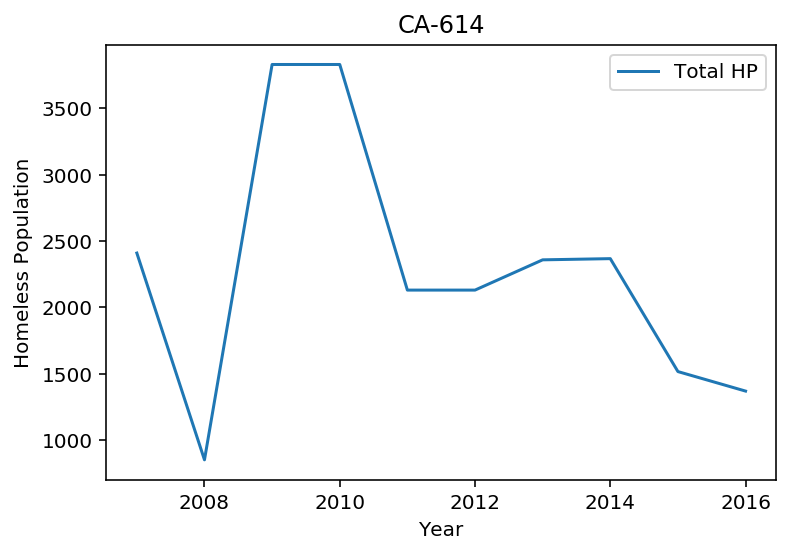

In [31]:
# Using Homeless Population and years 2007-2016 to find correlation of Homelessness through the years. 
for i in range(0, 39):
    CoC = ES.loc[i]
    CoC1 = TH.loc[i]
    CoC2 = PSH.loc[i]
    CoC3 = yPop.loc[i]
    plt.title(y2007['CoC Number'][i])
    plt.xlabel('Year')
    plt.ylabel('Proportion of Services')
    plt.plot([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016], CoC, label="ES")
    plt.plot([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016], CoC1, label="TH")
    plt.plot([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016], CoC2, label="PSH")
    plt.legend()
    plt.show()
    plt.xlabel('Year')
    plt.ylabel('Homeless Population')
    plt.title(y2007['CoC Number'][i])
    plt.plot([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016], CoC3, label='Total HP')
    plt.legend()
    plt.show()

In [32]:
in_value = inChange.index.values
de_value = deChange.index.values

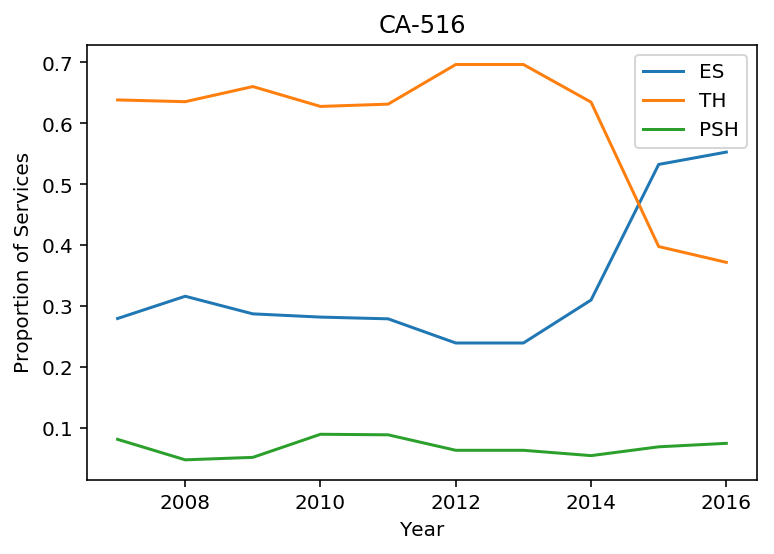

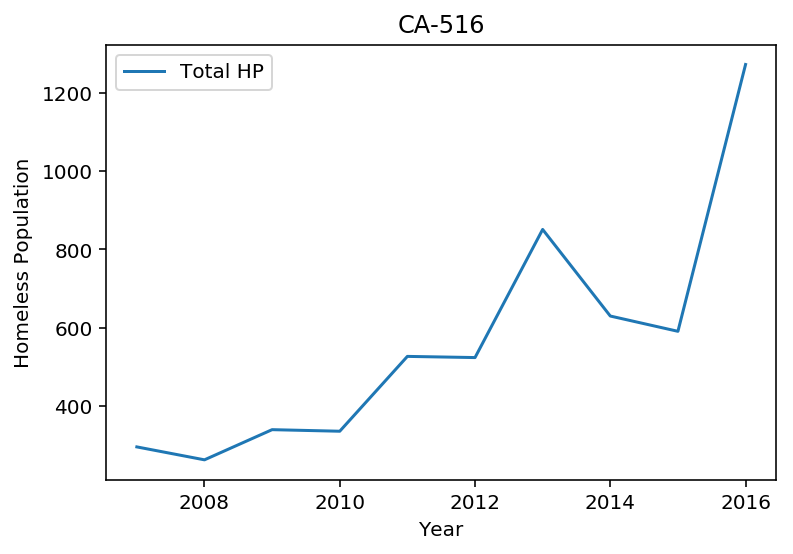

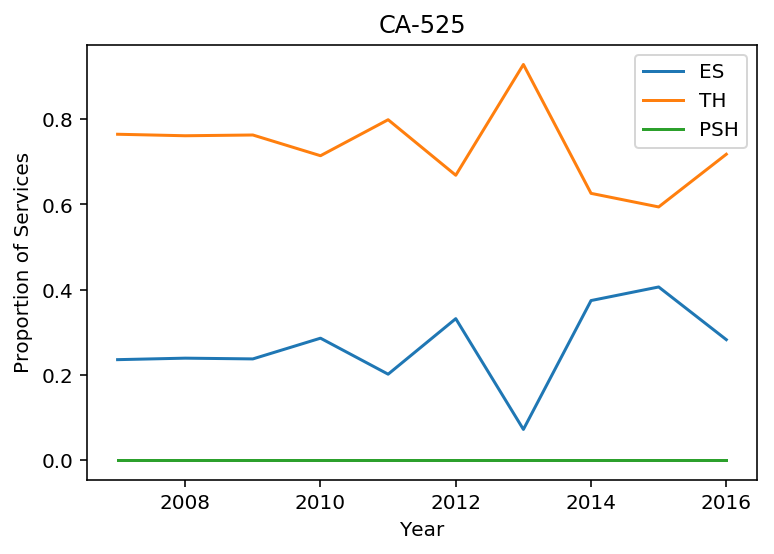

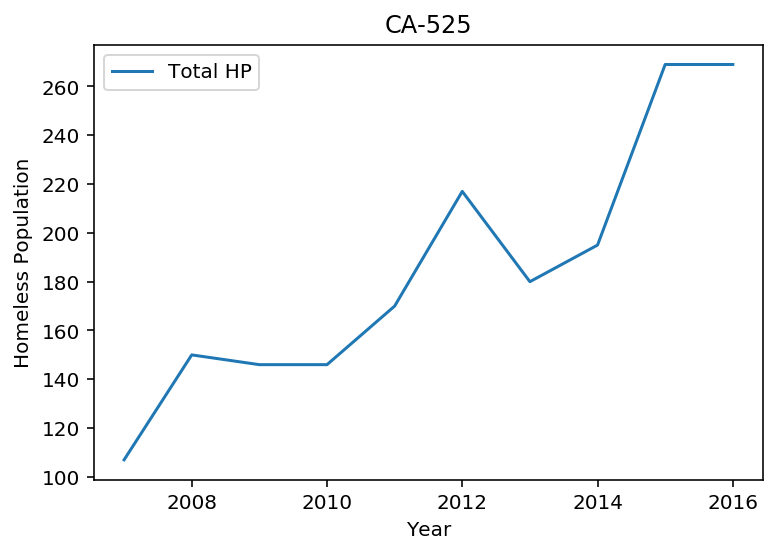

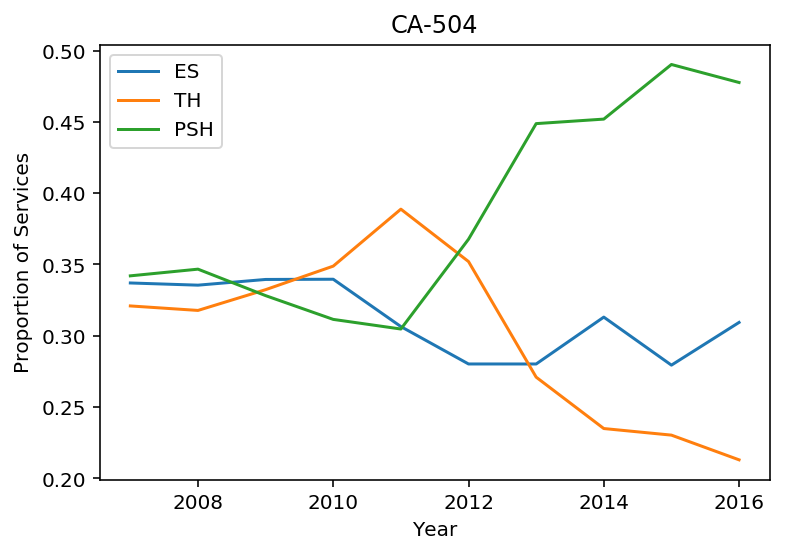

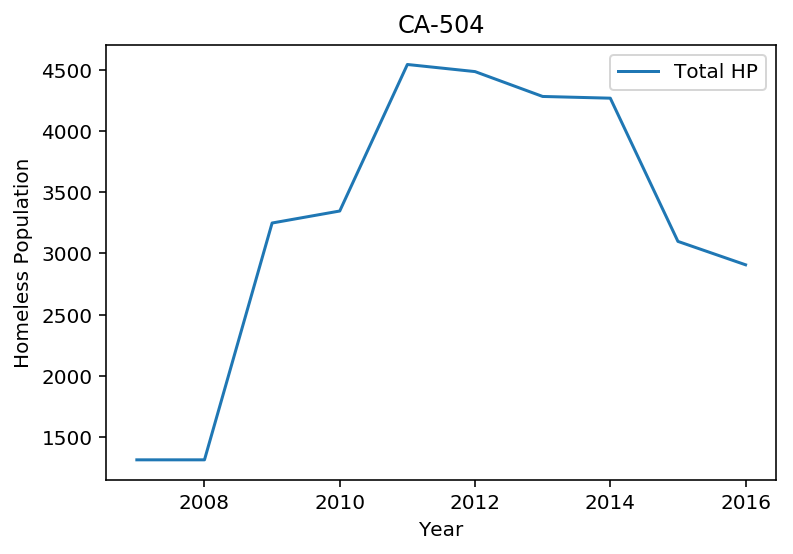

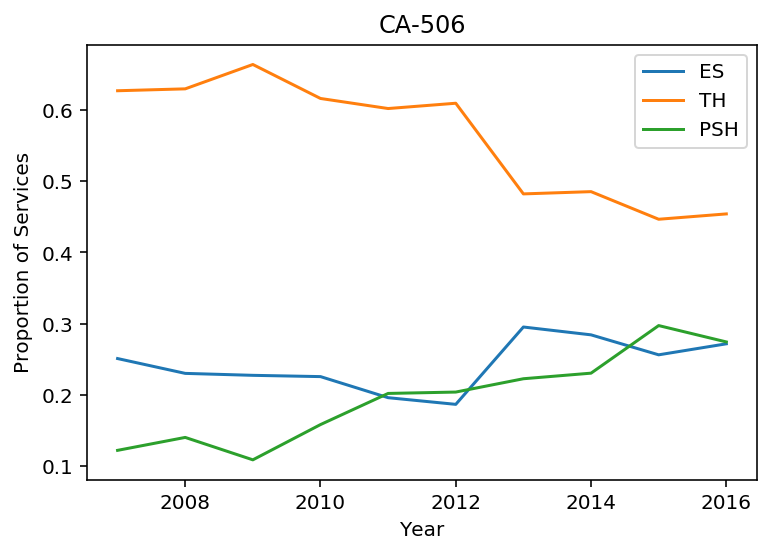

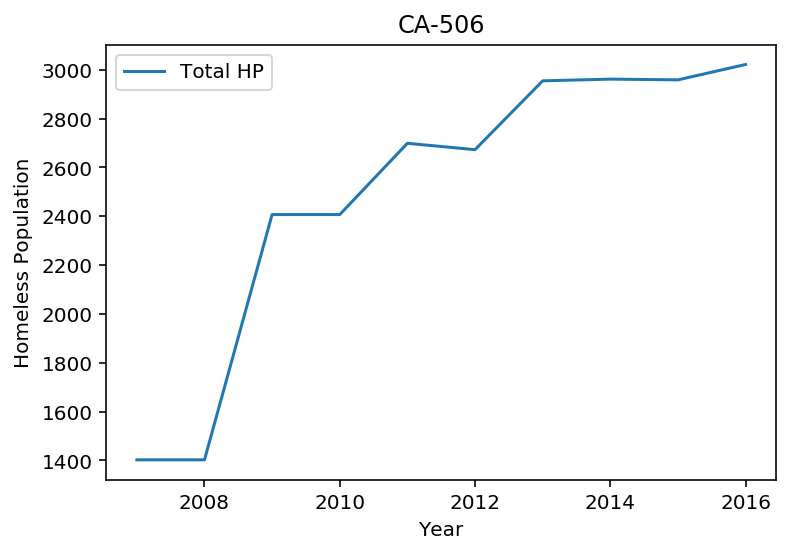

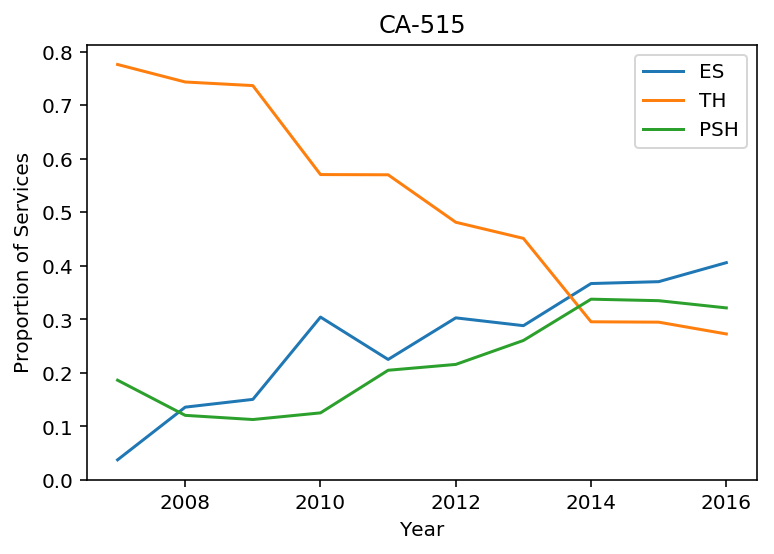

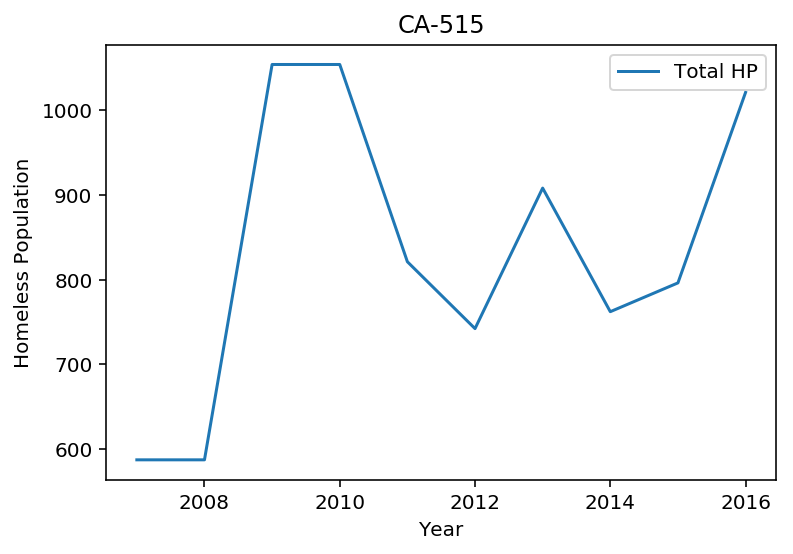

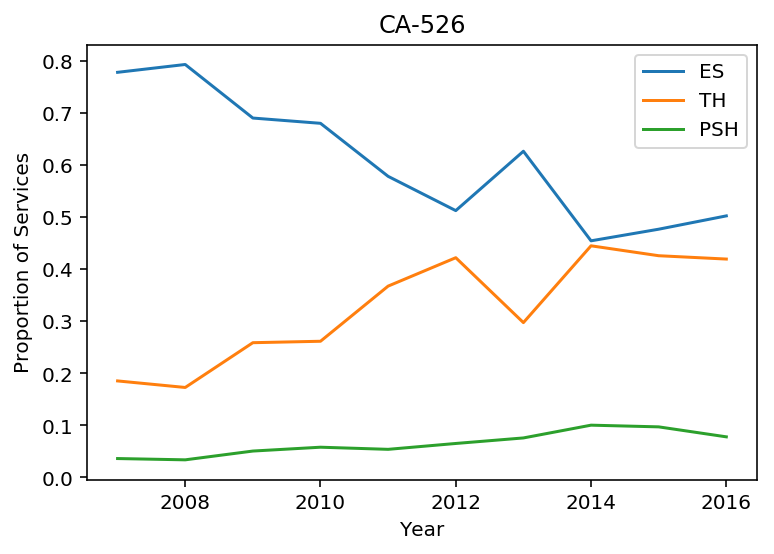

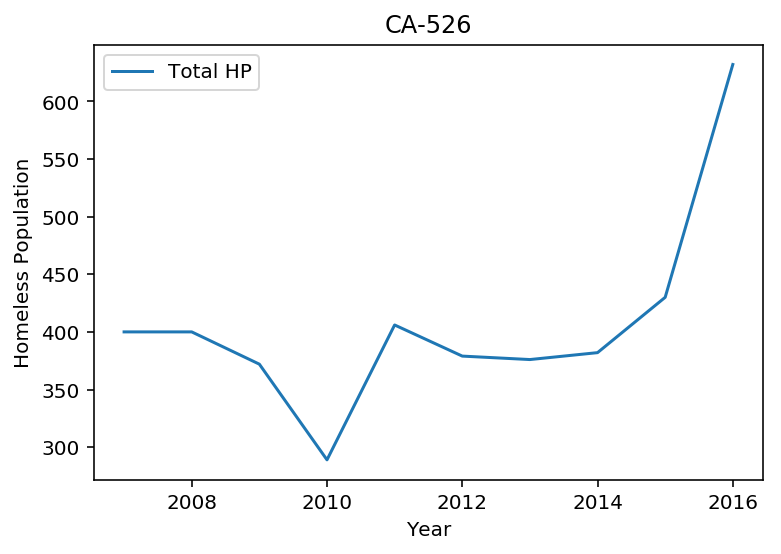

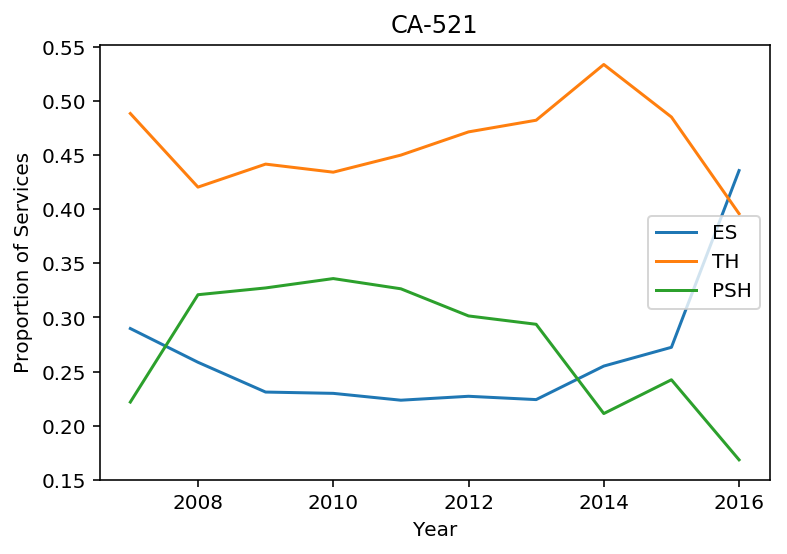

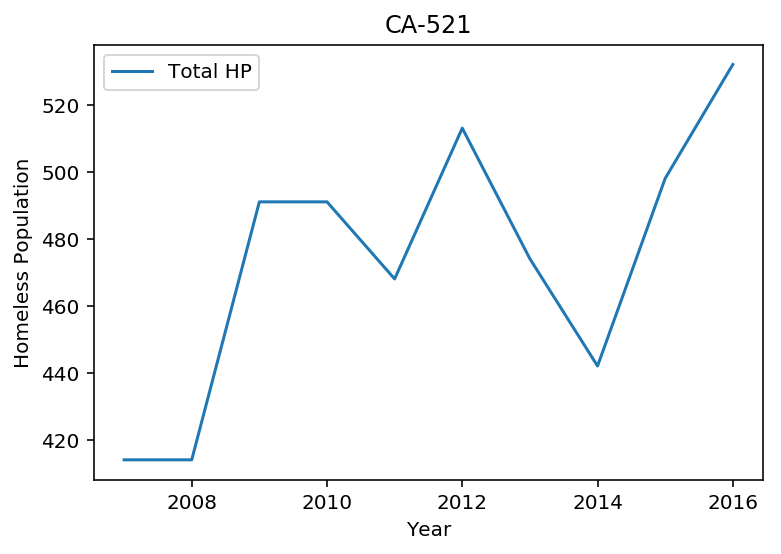

In [33]:
for i in in_value:
    CoC = ES.loc[i]
    CoC1 = TH.loc[i]
    CoC2 = PSH.loc[i]
    CoC3 = yPop.loc[i]
    plt.title(y2007['CoC Number'][i])
    plt.plot([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016], CoC, label="ES")
    plt.plot([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016], CoC1, label="TH")
    plt.plot([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016], CoC2, label="PSH")
    plt.xlabel('Year')
    plt.ylabel('Proportion of Services')
    plt.legend()
    plt.show()
    plt.xlabel('Year')
    plt.ylabel('Homeless Population')
    plt.title(y2007['CoC Number'][i])
    plt.plot([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016], CoC3, label='Total HP')
    plt.legend()
    plt.show()
    

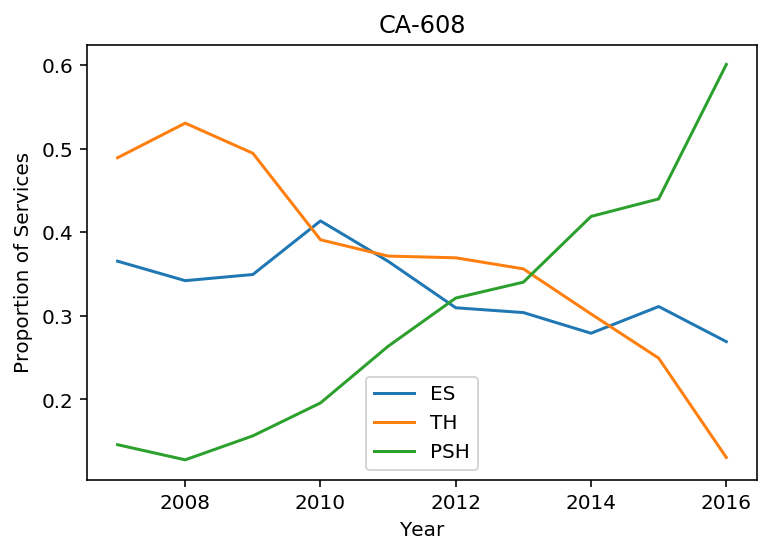

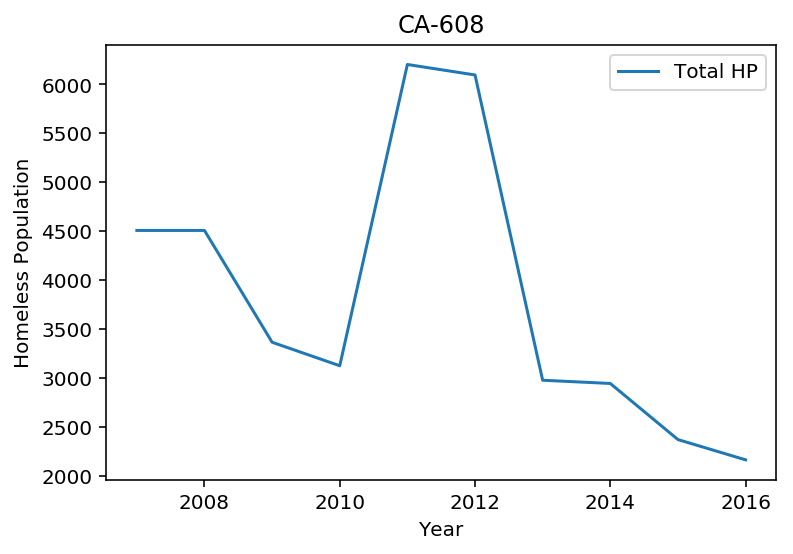

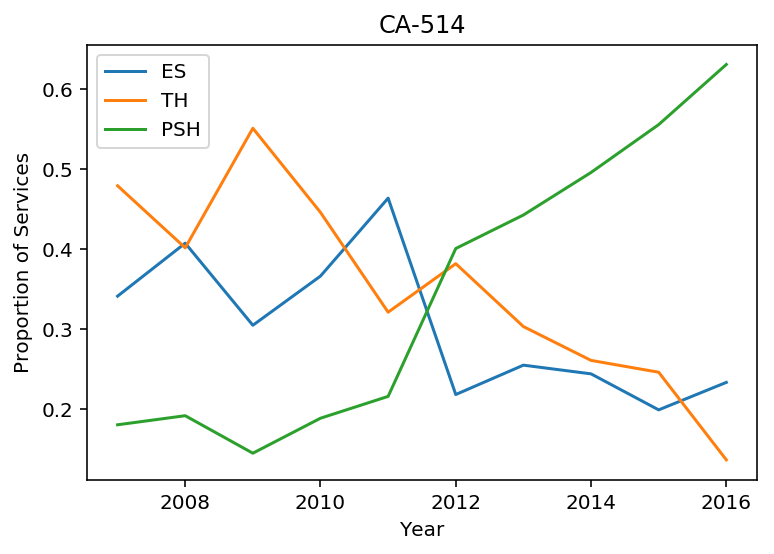

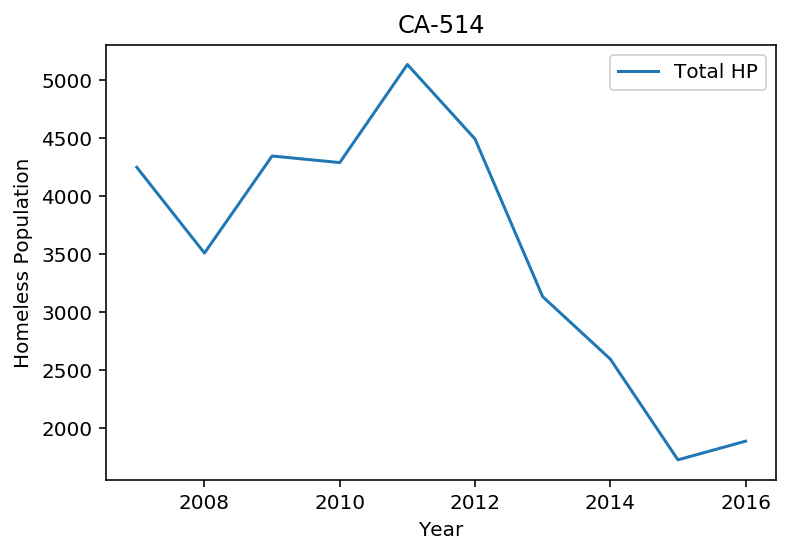

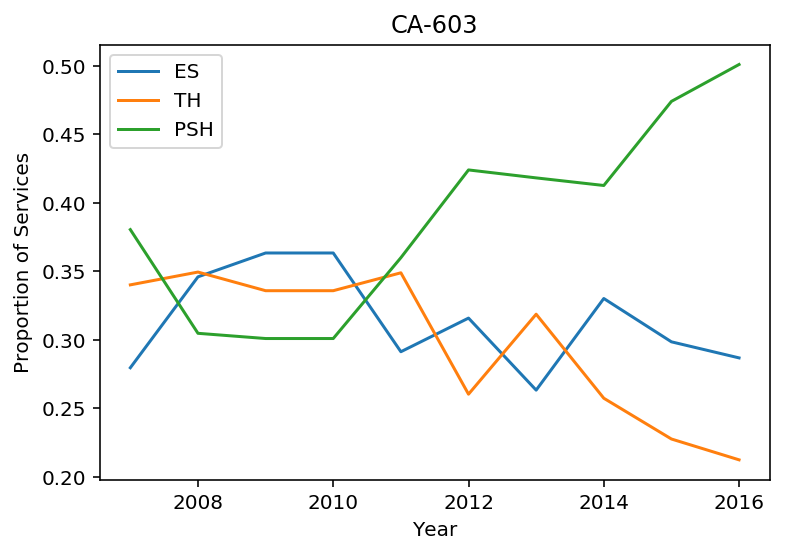

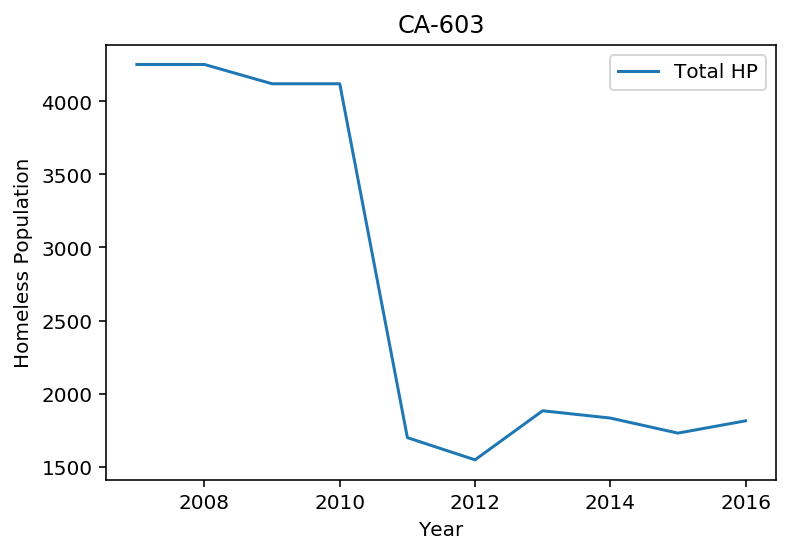

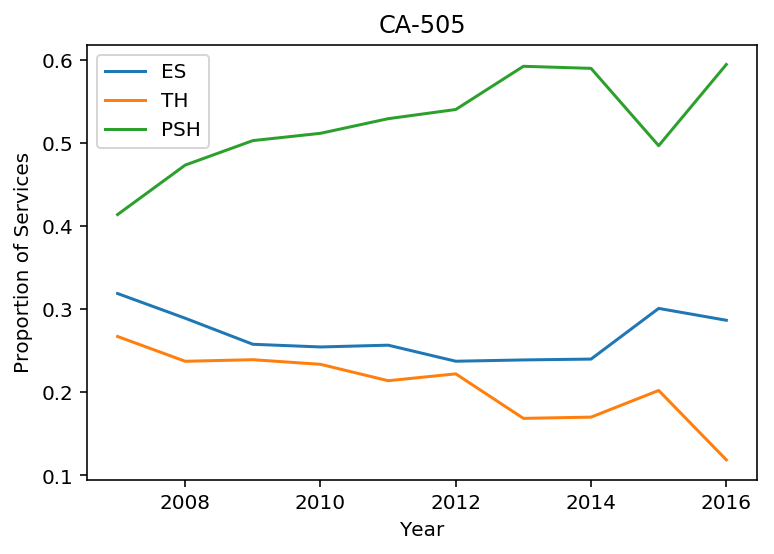

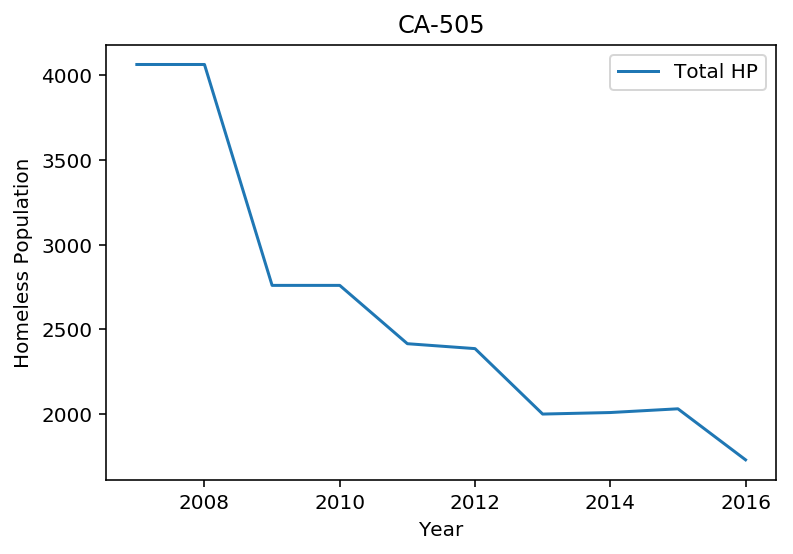

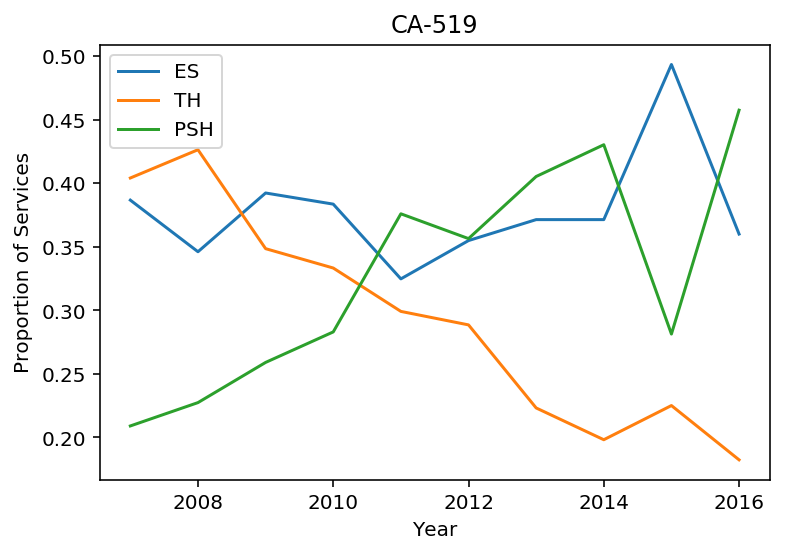

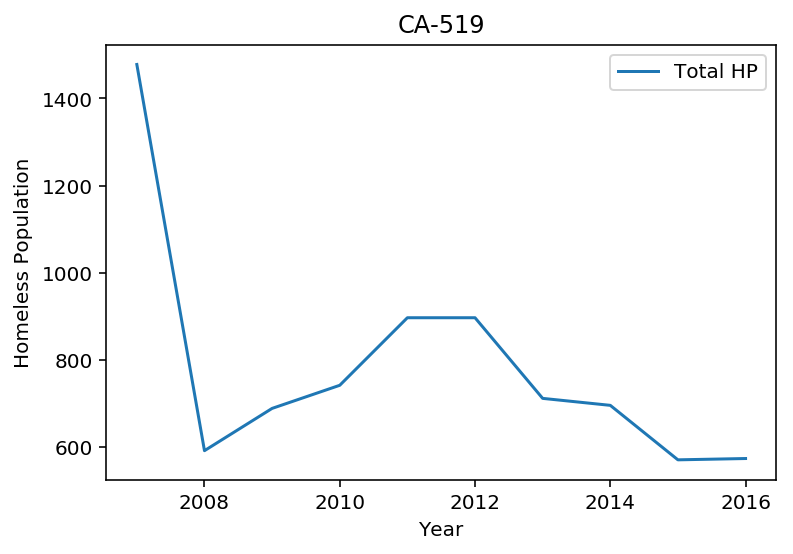

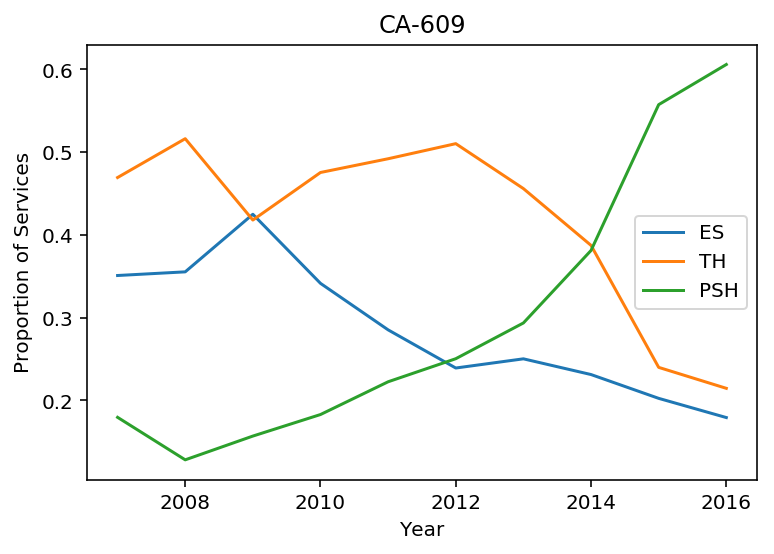

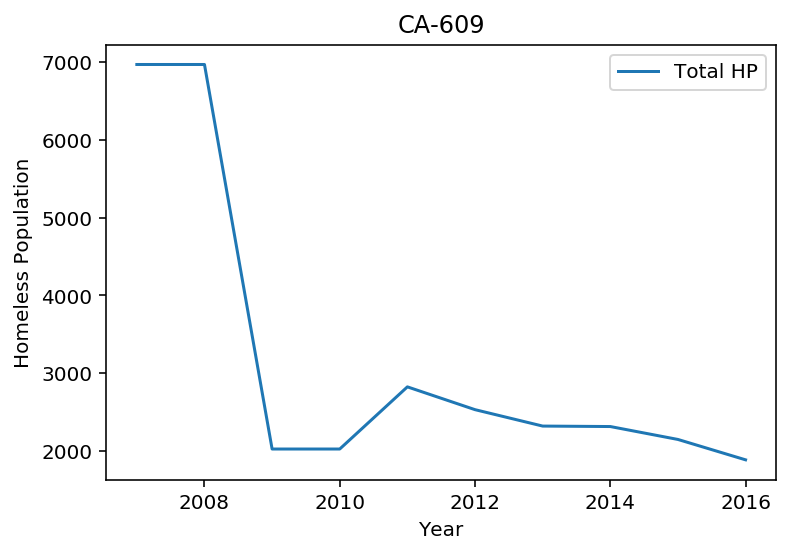

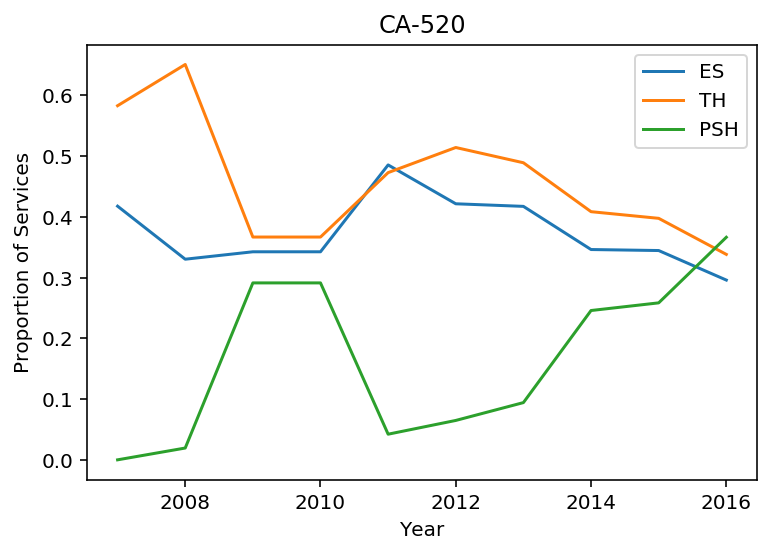

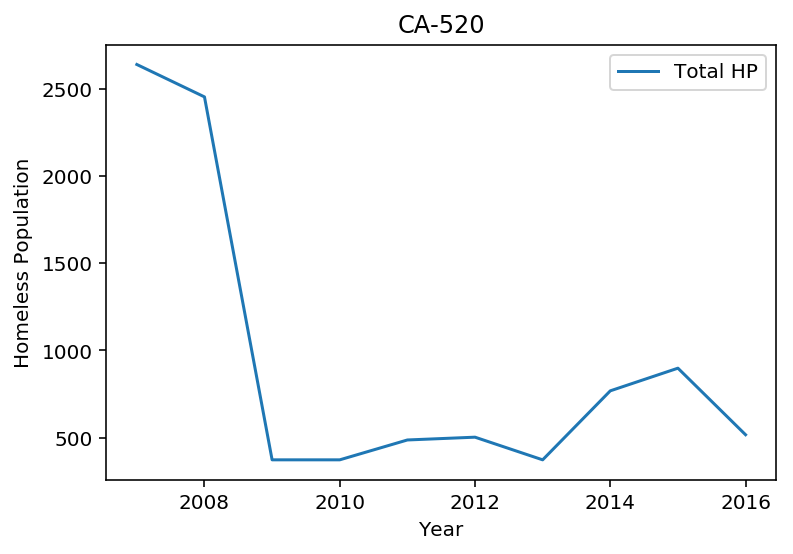

In [34]:
for i in de_value:
    CoC = ES.loc[i]
    CoC1 = TH.loc[i]
    CoC2 = PSH.loc[i]
    CoC3 = yPop.loc[i]
    plt.title(y2007['CoC Number'][i])
    plt.plot([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016], CoC, label="ES")
    plt.plot([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016], CoC1, label="TH")
    plt.plot([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016], CoC2, label="PSH")
    plt.xlabel('Year')
    plt.ylabel('Proportion of Services')
    plt.legend()
    plt.show()
    plt.xlabel('Year')
    plt.ylabel('Homeless Population')
    plt.title(y2007['CoC Number'][i])
    plt.plot([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016], CoC3, label='Total HP')
    plt.legend()
    plt.show()
    

## Data Analysis and Results

First we completed linear regressions on our three different types of services as independent variable to see if we could find statistical significant from the services. After running linear regression the p-value we calculated shows that there is no statistical significance; however, the linear regression showed that the three different types of services were highly correlated. Due to this discovery, we decided to run a pearson's correlational r test on the services which supported our previous finding. 


Since the data that we have has many variable we decided that we might need to try and use dimensionality reduction: that is to try and find a lower dimensional space that captures as much of the information as we can from the original, high-dimensional, dataset.

##### One Year Change

In [35]:
# We tested one year change to find the difference from year to year
model = years
model=model.rename (columns = {'Delta(1y)': 'OneYearChange'})
model=model.rename (columns = {'Delta(2y)': 'TwoYearChange'})
model=model.rename (columns = {'Total ES Beds': 'ES'})
model=model.rename (columns = {'Total PSH Beds': 'PSH'})
model=model.rename (columns = {'Total TH Beds': 'TH'})

# Define dimensions of interest
dims = ['ES','PSH','TH']

# Correlate each dimension to the overall satisfaction rating
model_str = 'OneYearChange ~ ' + ' + '.join(dims)
results_all = smf.ols(model_str, data=model, missing='drop').fit()
print(results_all.summary())

                            OLS Regression Results                            
Dep. Variable:          OneYearChange   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     9.855
Date:                Tue, 13 Jun 2017   Prob (F-statistic):           2.97e-06
Time:                        23:54:29   Log-Likelihood:                -2946.4
No. Observations:                 351   AIC:                             5901.
Df Residuals:                     347   BIC:                             5916.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     42.9281     69.781      0.615      0.5

##### Two Year Change

In [36]:
# We tested two year change to make sure that we account for some variability between the one year change i.e. to see if it's a better fit
# We stopped at two year there was nothing to note for one year and two change
# Define dimensions of interest
dims = ['ES','PSH','TH']

# Correlate each dimension to the overall satisfaction rating
model_str = 'TwoYearChange ~ ' + ' + '.join(dims)
results_all = smf.ols(model_str, data=model, missing='drop').fit()
print(results_all.summary())

                            OLS Regression Results                            
Dep. Variable:          TwoYearChange   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     18.07
Date:                Tue, 13 Jun 2017   Prob (F-statistic):           7.97e-11
Time:                        23:54:29   Log-Likelihood:                -2724.7
No. Observations:                 312   AIC:                             5457.
Df Residuals:                     308   BIC:                             5472.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    161.1894    105.731      1.525      0.1

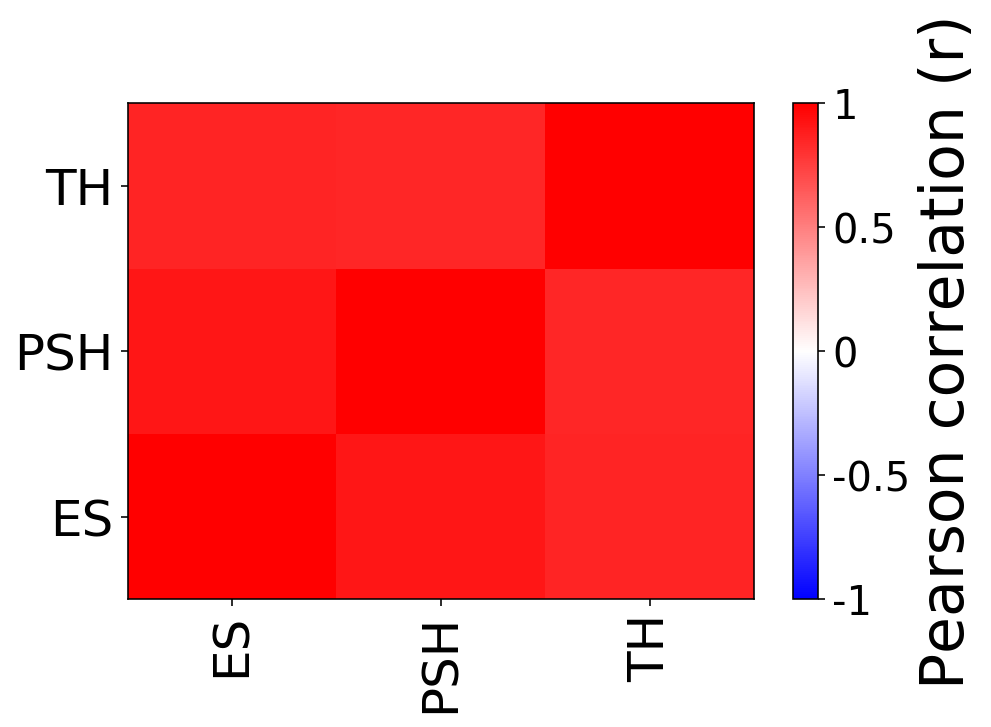

In [37]:
# Key Terms 
# Transitional Housing Programs (TH)
# Permanent Supportive Housing (PSH)
# Emergency Shelter (ES)
dfcorr = model[dims].corr()
M = len(dims)
from matplotlib import cm

clim1 = (-1,1)
plt.figure(figsize=(7,5))
cax = plt.pcolor(range(M+1), range(M+1), dfcorr, cmap=cm.bwr)
cbar = plt.colorbar(cax, ticks=(-1,-.5,0,.5,1))
cbar.ax.set_ylabel('Pearson correlation (r)', size=30)
plt.clim(clim1)
cbar.ax.set_yticklabels((-1,-.5,0,.5,1),size=20)
ax = plt.gca()
ax.set_yticks(np.arange(M)+.5)
ax.set_yticklabels(dims,size=25)
ax.set_xticks(np.arange(M)+.5)
ax.set_xticklabels(dims,size=25)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.xlim((0,M))
plt.ylim((0,M))
plt.show()


In [38]:
# Using pearson's correlation r to find correlational statistic

model[dims].corr()

ES       PSH        TH
ES   1.000000  0.910673  0.857213
PSH  0.910673  1.000000  0.845802
TH   0.857213  0.845802  1.000000

In [39]:
from sklearn.decomposition import PCA
from sklearn import decomposition
d1_es = model['ES'].values
d2_psh = model['PSH'].values
d3_th = model['TH'].values
d1_es = d1_es.T
d2_psh = d2_psh.T
d3_th = d3_th.T
delta = model['OneYearChange'].values

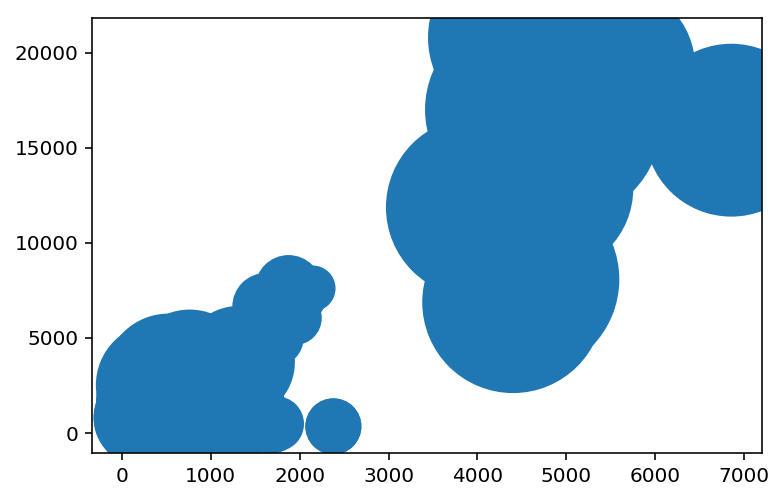

In [40]:
plt.scatter(d1_es, d2_psh, d3_th)
plt.show()

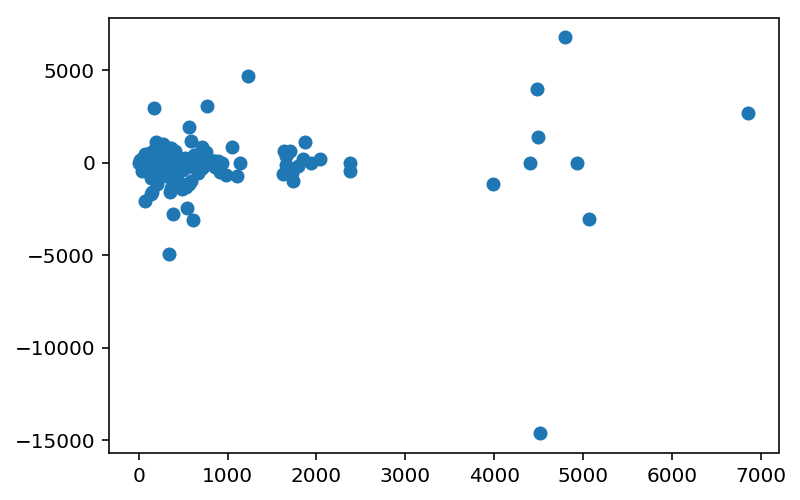

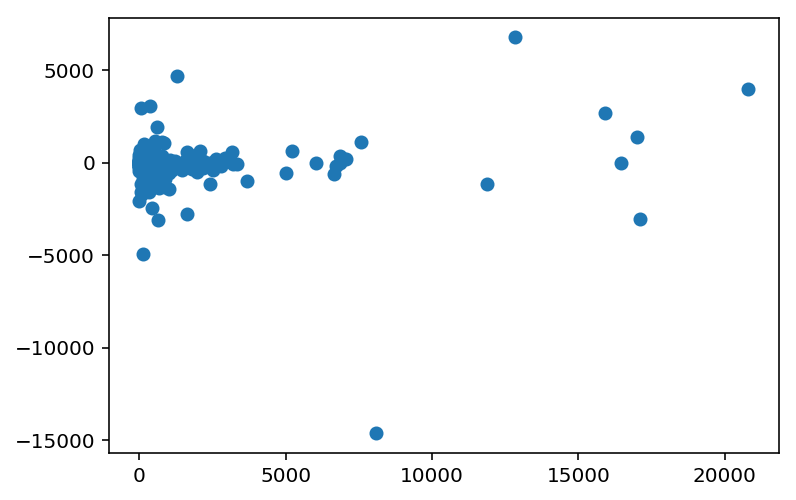

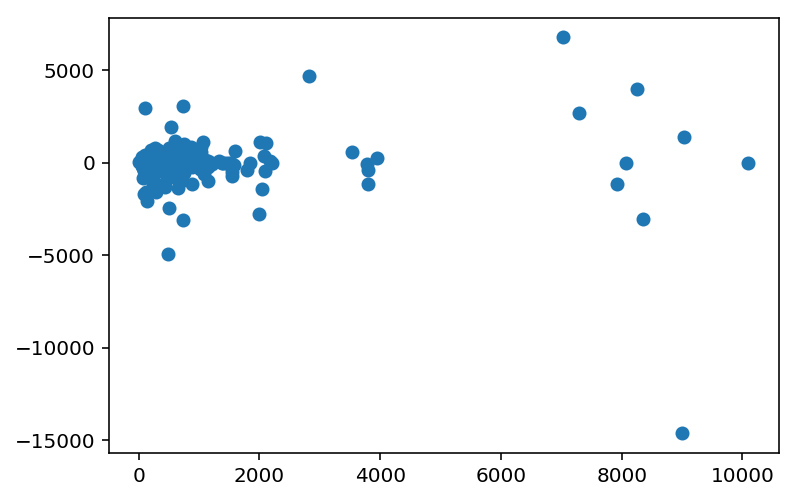

In [41]:
# Plot the change in housing service by homeless population change over the 9 year period
plt.scatter(d1_es, delta)
plt.show()
plt.scatter(d2_psh, delta)
plt.show()
plt.scatter(d3_th, delta)
plt.show()

In [42]:
PCAdata = pd.DataFrame([delta, d1_es, d2_psh, d3_th]).T
mod = smf.ols(formula='delta ~ d1_es + d2_psh + d3_th', data=PCAdata)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  delta   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     9.855
Date:                Tue, 13 Jun 2017   Prob (F-statistic):           2.97e-06
Time:                        23:54:31   Log-Likelihood:                -2946.4
No. Observations:                 351   AIC:                             5901.
Df Residuals:                     347   BIC:                             5916.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     42.9281     69.781      0.615      0.5

In [43]:
pca = decomposition.PCA(n_components=1)
services = pca.fit_transform(PCAdata[[1, 2, 3]])

# Sometimes the dimensionality reduction can change the sign of the relationship
if pca.score(PCAdata[[1, 2, 3]]) < 0:
    services = -services

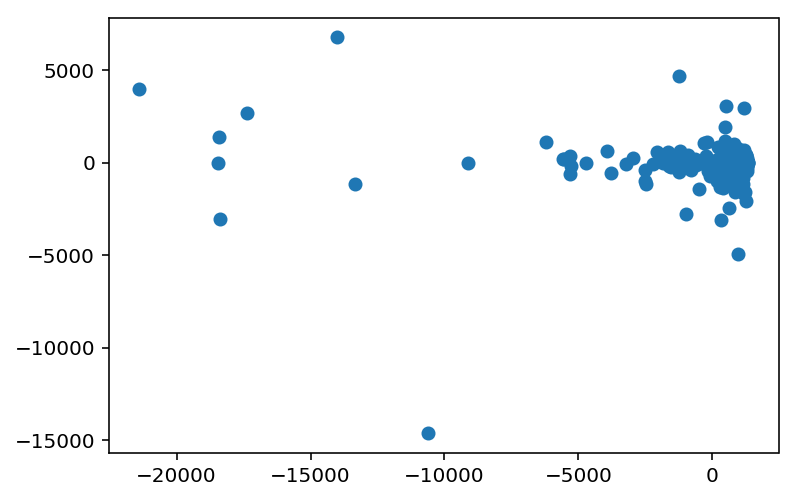

In [44]:
# Run PCA on our multi-component housing services to reduce them to one variable. 
# We then correlated the newly created variable to the change in homeless population for 1 year

plt.scatter(services, delta)
plt.show()

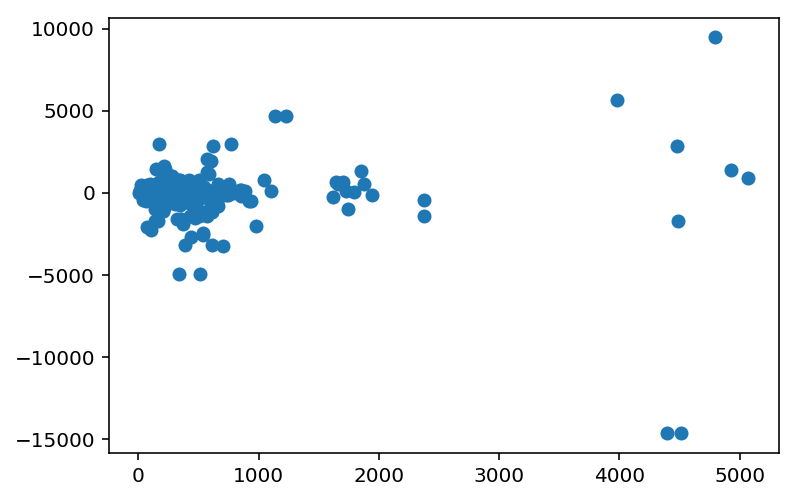

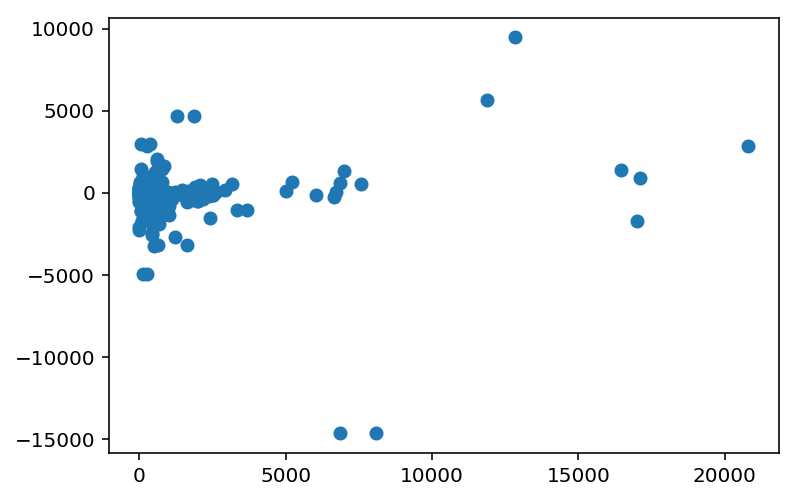

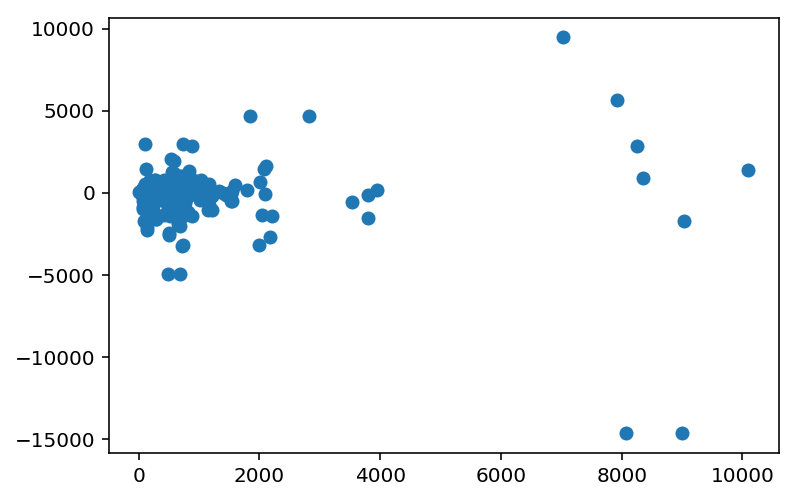

In [45]:
#Input change in homelessness for two years
delta2 = model['TwoYearChange'].values
plt.scatter(d1_es, delta2)
plt.show()

plt.scatter(d2_psh, delta2)
plt.show()
plt.scatter(d3_th, delta2)
plt.show()

In [46]:
#Two year change PCA
PCAdata2 = pd.DataFrame([delta2, d1_es, d2_psh, d3_th]).T
mod2 = smf.ols(formula='delta2 ~ d1_es + d2_psh + d3_th', data=PCAdata2)
res2 = mod2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                 delta2   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     18.07
Date:                Tue, 13 Jun 2017   Prob (F-statistic):           7.97e-11
Time:                        23:54:32   Log-Likelihood:                -2724.7
No. Observations:                 312   AIC:                             5457.
Df Residuals:                     308   BIC:                             5472.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    161.1894    105.731      1.525      0.1

In [47]:
pca = decomposition.PCA(n_components=1)
services2 = pca.fit_transform(PCAdata2[[1, 2, 3]])

# Sometimes the dimensionality reduction can change the sign of the relationship
if pca.score(PCAdata2[[1, 2, 3]]) < 0:
    services2 = -services2

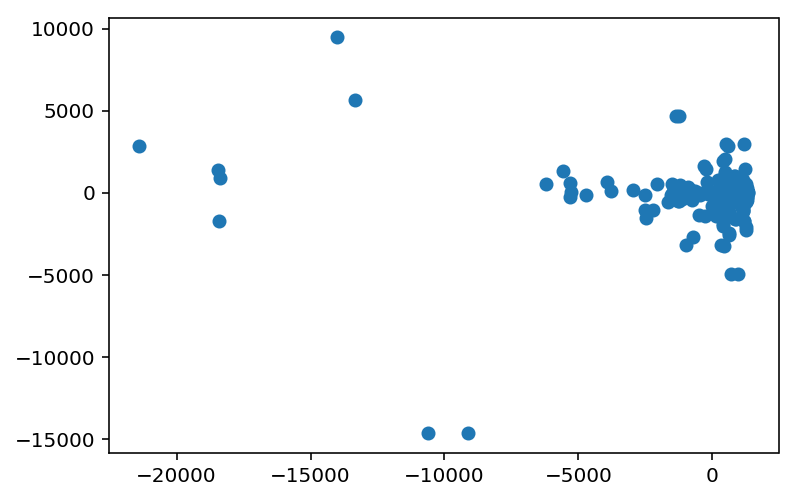

In [48]:
# Run PCA on our multi-component housing services to reduce them to one variable. 
# We then correlated the newly created variable to the change in homeless population for 1 year

plt.scatter(services2, delta2)
plt.show()

## Conclusions/Discussion


   After gathering, cleaning, and exploring our data, our data analysis did not lead us to any conclusive finding about whether different housing services provided have any significant effect on reducing the homeless population. Our attempt at running PCA on our data gave us results that were not easily interpretable, and thus require more extensive analysis to understand any possible present correlations.
   With analyzing data to a incredibly complex crisis such as homelessness it of course falls into potential confounds that can have an effect on our analysis. One issue with collecting data on homelessness in general is actually getting concrete data since those falling in and out of homelessness is so dynamic and changes constantly. We have to assume that the data we have received is an incomplete picture of the true population of homeless individuals in San Diego. Essentially what we have received is just a sample at a particular point of time and we are making observations based on that and assuming that the observations can be extended beyond those temporal and physical boundaries. 
	In addition, data collected from HUD through the HMIS is incomplete as most people utilize the system (required to input data into the system if receiving funding from HUD), yet not all organizations that are servicing the homeless are utilizing this system (receiving funds from somewhere other than HUD). So that is valuable data again that we are missing. 